# Comparison of PSD between TDMS and HDF5 data

In [31]:
import numpy as np
import dataloader_halogaland.dataloader as dl
import matplotlib.pyplot as plt
import os
from scipy import signal
from dataloader_halogaland.processer import welch_plot

In [32]:
loader_HDF= dl.HDF5_dataloader(os.getcwd()+'/../Data/Halogaland_second_try.hdf5')
loader_TDMS = dl.TDMS_dataloader(os.getcwd()+'/../Data/Halogaland_2022_04_22')

acc_all = loader_HDF.load_all_acceleration_data(loader_HDF.periods[2], preprosess=False)

dict_keys(['timestamp', '1x', '1y', '1z', '2x', '2y', '2z'])
Length of TDMS vector = 1843200
Length of HDF vector = 460800
36864.0
9216.0
dict_keys(['timestamp', '1x', '1y', '1z', '2x', '2y', '2z'])
Length of TDMS vector = 1843200
Length of HDF vector = 460800
36864.0
9216.0
dict_keys(['timestamp', '1x', '1y', '1z', '2x', '2y', '2z'])
Length of TDMS vector = 1843200
Length of HDF vector = 460800
36864.0
9216.0
dict_keys(['timestamp', '1x', '1y', '1z', '2x', '2y', '2z'])
Length of TDMS vector = 1843200
Length of HDF vector = 460800
36864.0
9216.0
dict_keys(['timestamp', '1x', '1y', '1z', '2x', '2y', '2z'])
Length of TDMS vector = 1843200
Length of HDF vector = 460800
36864.0
9216.0
dict_keys(['timestamp', '1x', '1y', '1z', '2x', '2y', '2z'])
Length of TDMS vector = 1843200
Length of HDF vector = 460800
36864.0
9216.0
dict_keys(['timestamp', '1x', '1y', '1z', '2x', '2y', '2z'])
Length of TDMS vector = 1843200
Length of HDF vector = 460800
36864.0
9216.0
dict_keys(['timestamp', '1x', '1y'

/var/folders/xg/ddkjb2x96w167hqnv_gjv_v40000gn/T/ipykernel_18758/1235555460.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(2,1, figsize=(20,10))


dict_keys(['timestamp', '1x', '1y', '1z', '2x', '2y', '2z'])
Length of TDMS vector = 1843200
Length of HDF vector = 460800
36864.0
9216.0
dict_keys(['timestamp', '1x', '1y', '1z', '2x', '2y', '2z'])
Length of TDMS vector = 1843200
Length of HDF vector = 460800
36864.0
9216.0
dict_keys(['timestamp', '1x', '1y', '1z', '2x', '2y', '2z'])
Length of TDMS vector = 1843200
Length of HDF vector = 460800
36864.0
9216.0
dict_keys(['timestamp', '1x', '1y', '1z', '2x', '2y', '2z'])
Length of TDMS vector = 1843200
Length of HDF vector = 460800
36864.0
9216.0
dict_keys(['timestamp', '1x', '1y', '1z', '2x', '2y', '2z'])
Length of TDMS vector = 1843200
Length of HDF vector = 460800
36864.0
9216.0
dict_keys(['timestamp', '1x', '1y', '1z', '2x', '2y', '2z'])
Length of TDMS vector = 1843200
Length of HDF vector = 460800
36864.0
9216.0
dict_keys(['timestamp', '1x', '1y', '1z', '2x', '2y', '2z'])
Length of TDMS vector = 1843200
Length of HDF vector = 460800
36864.0
9216.0
dict_keys(['timestamp', '1x', '1y'

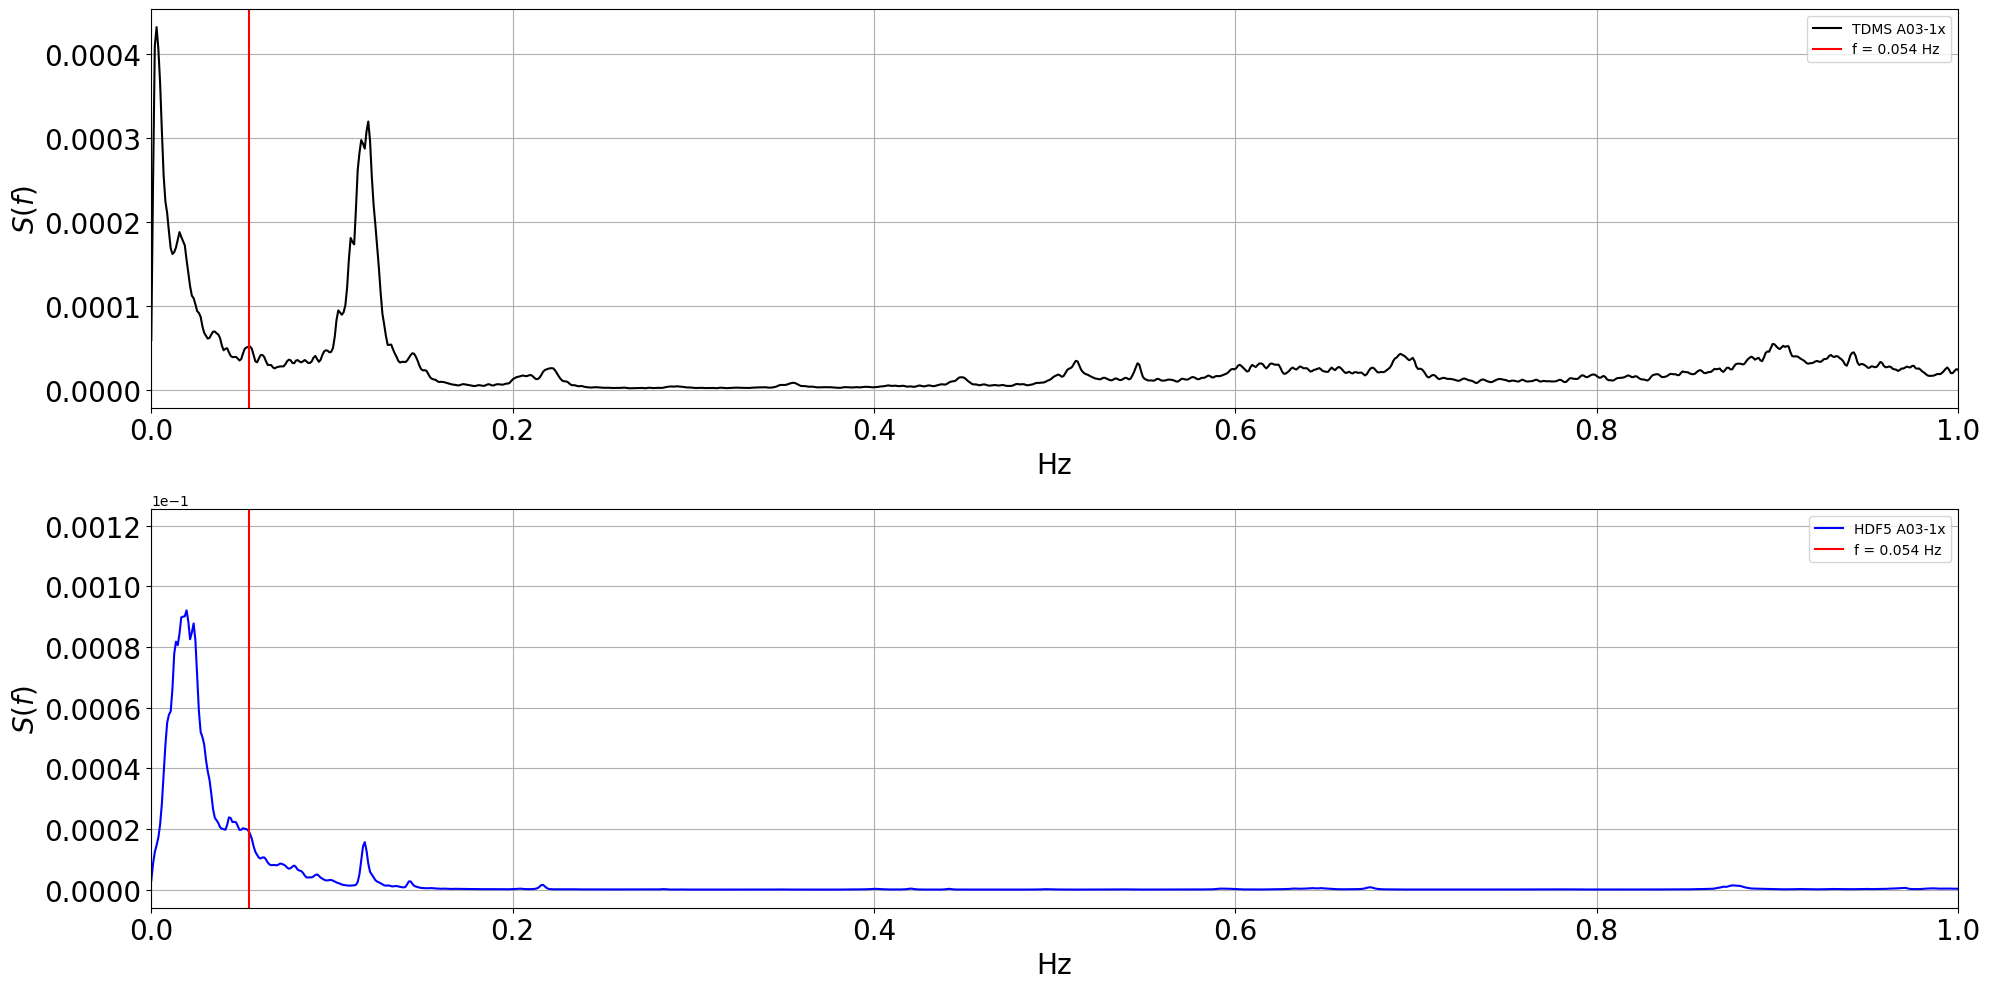

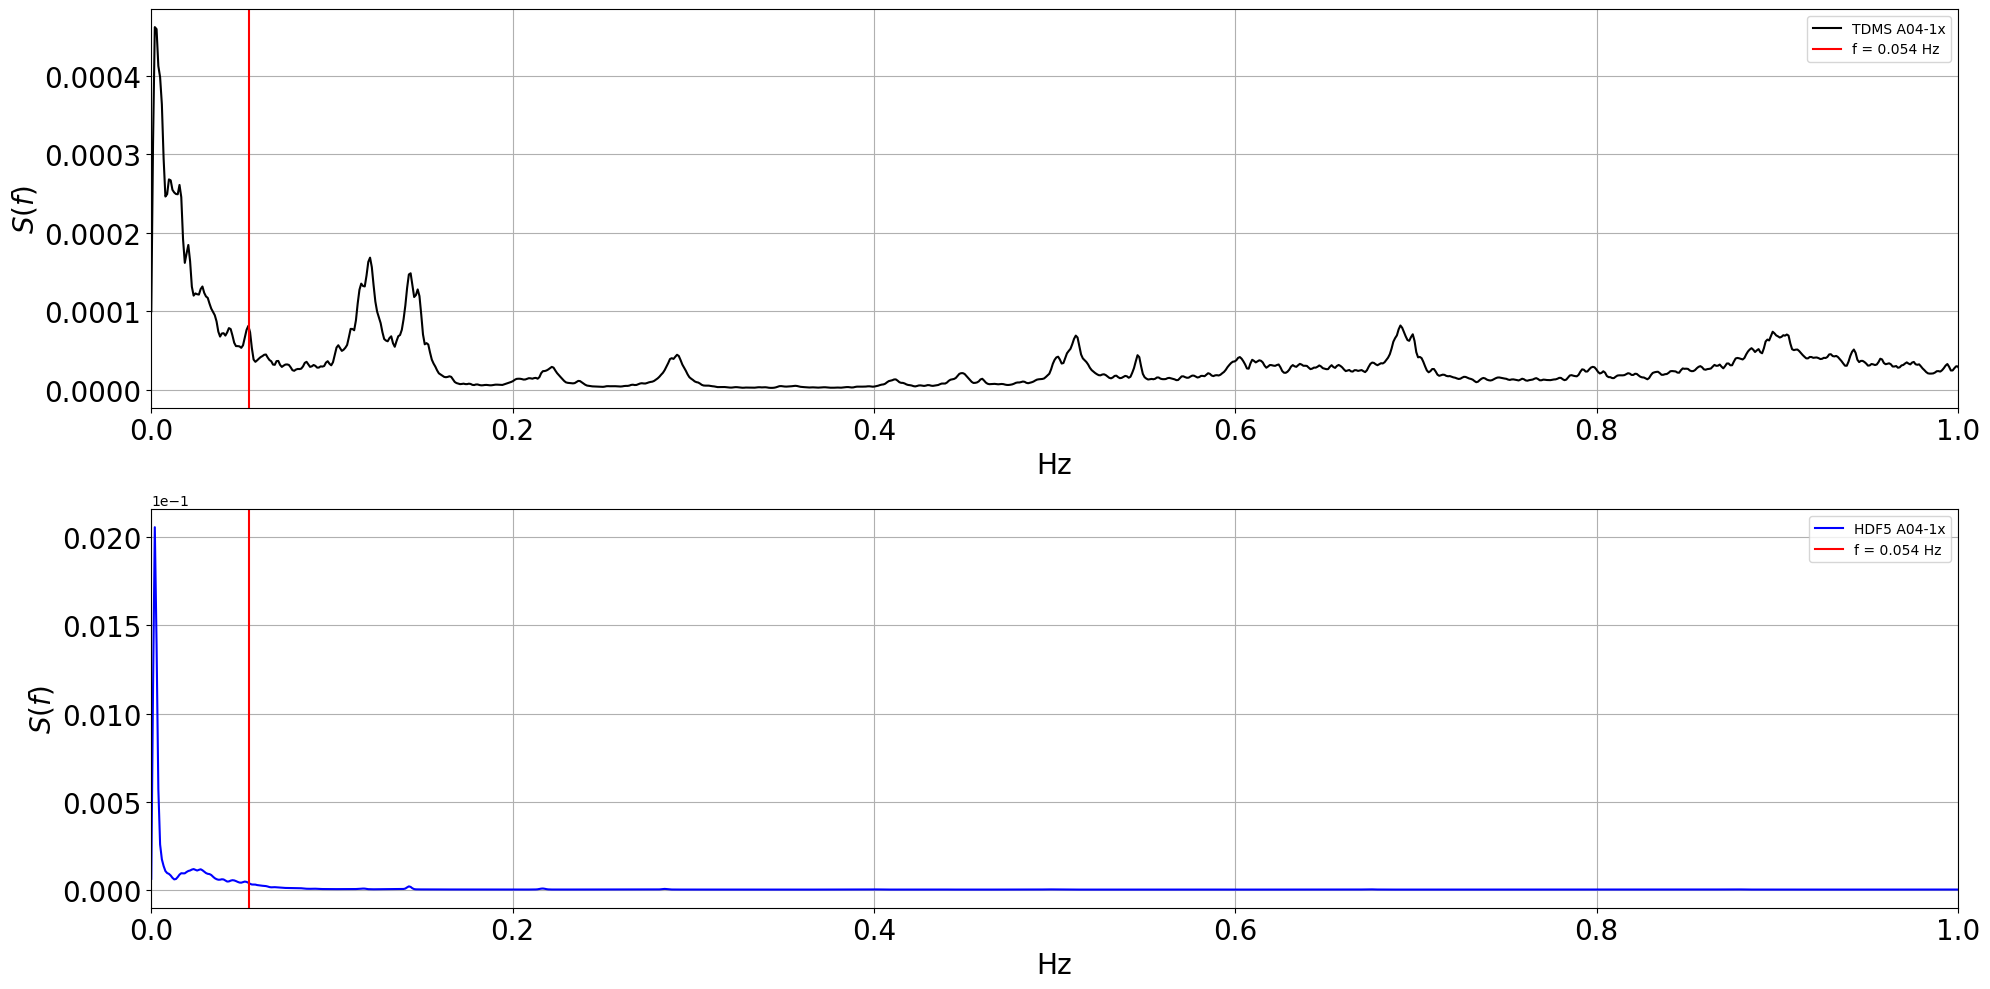

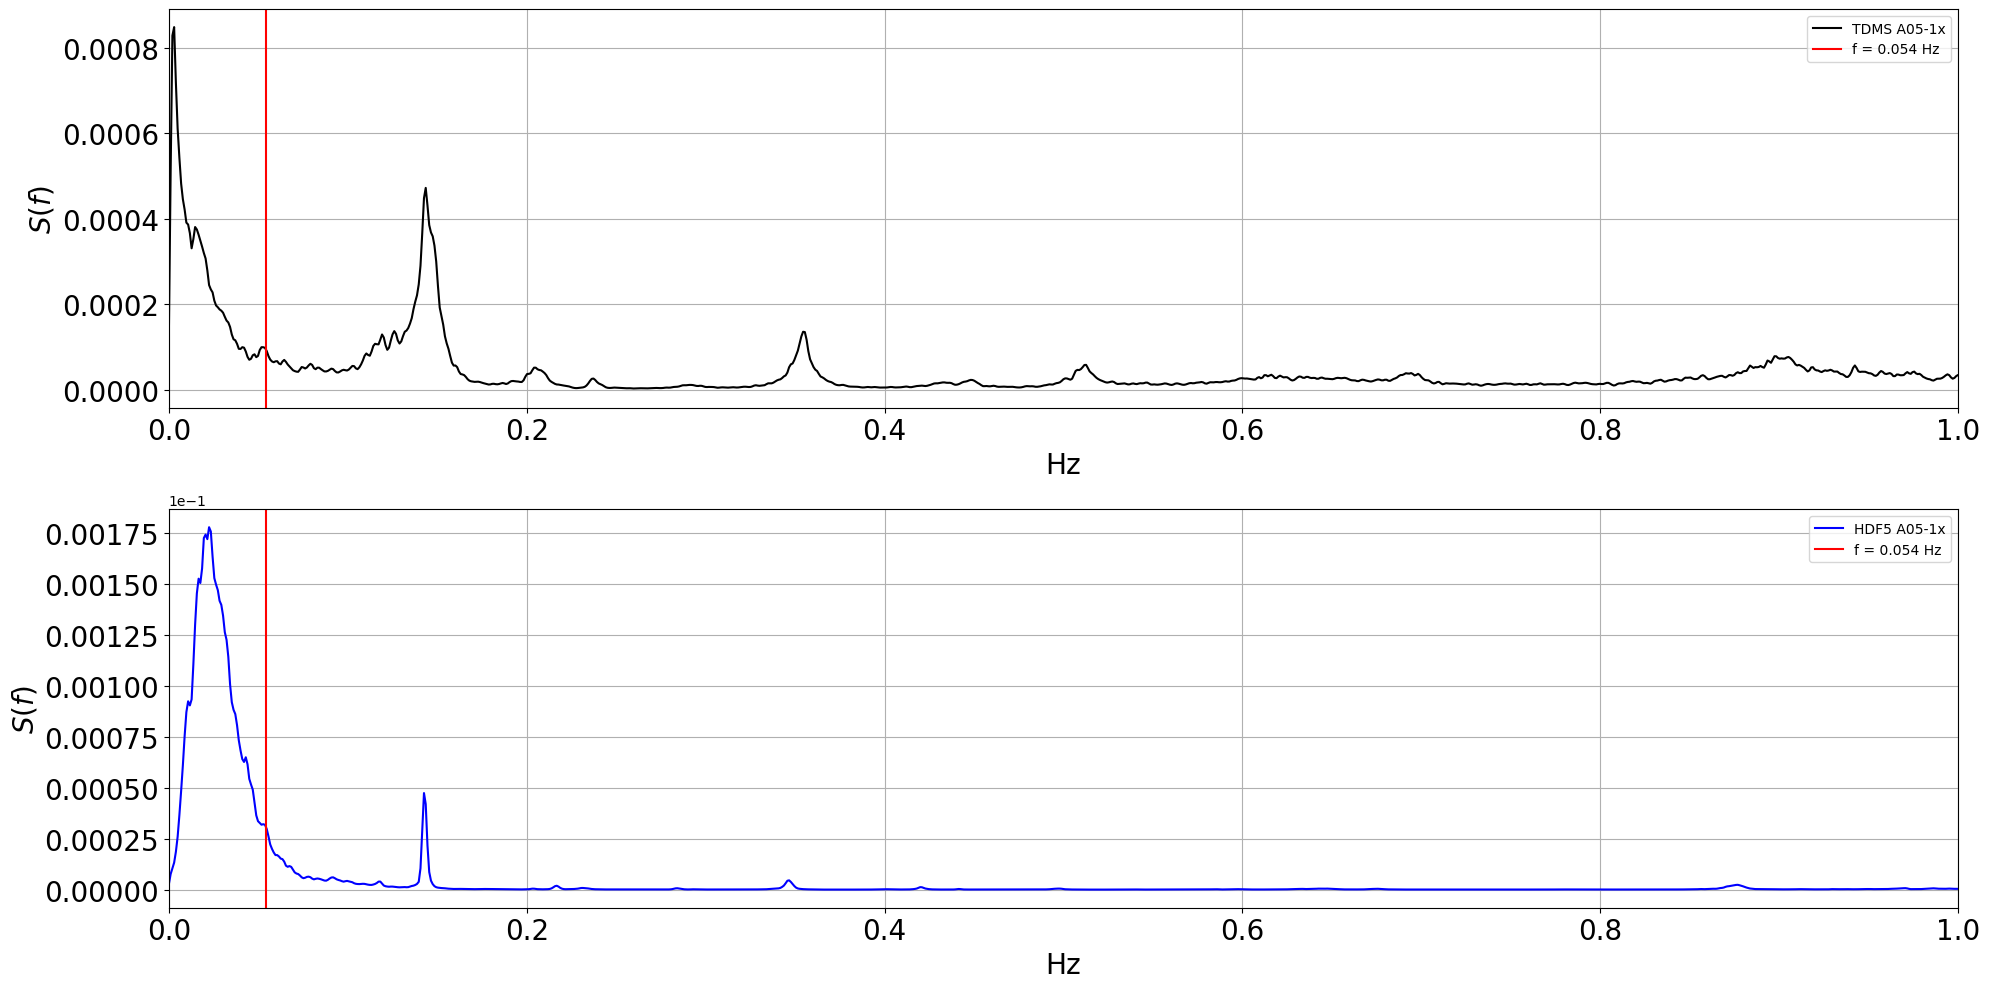

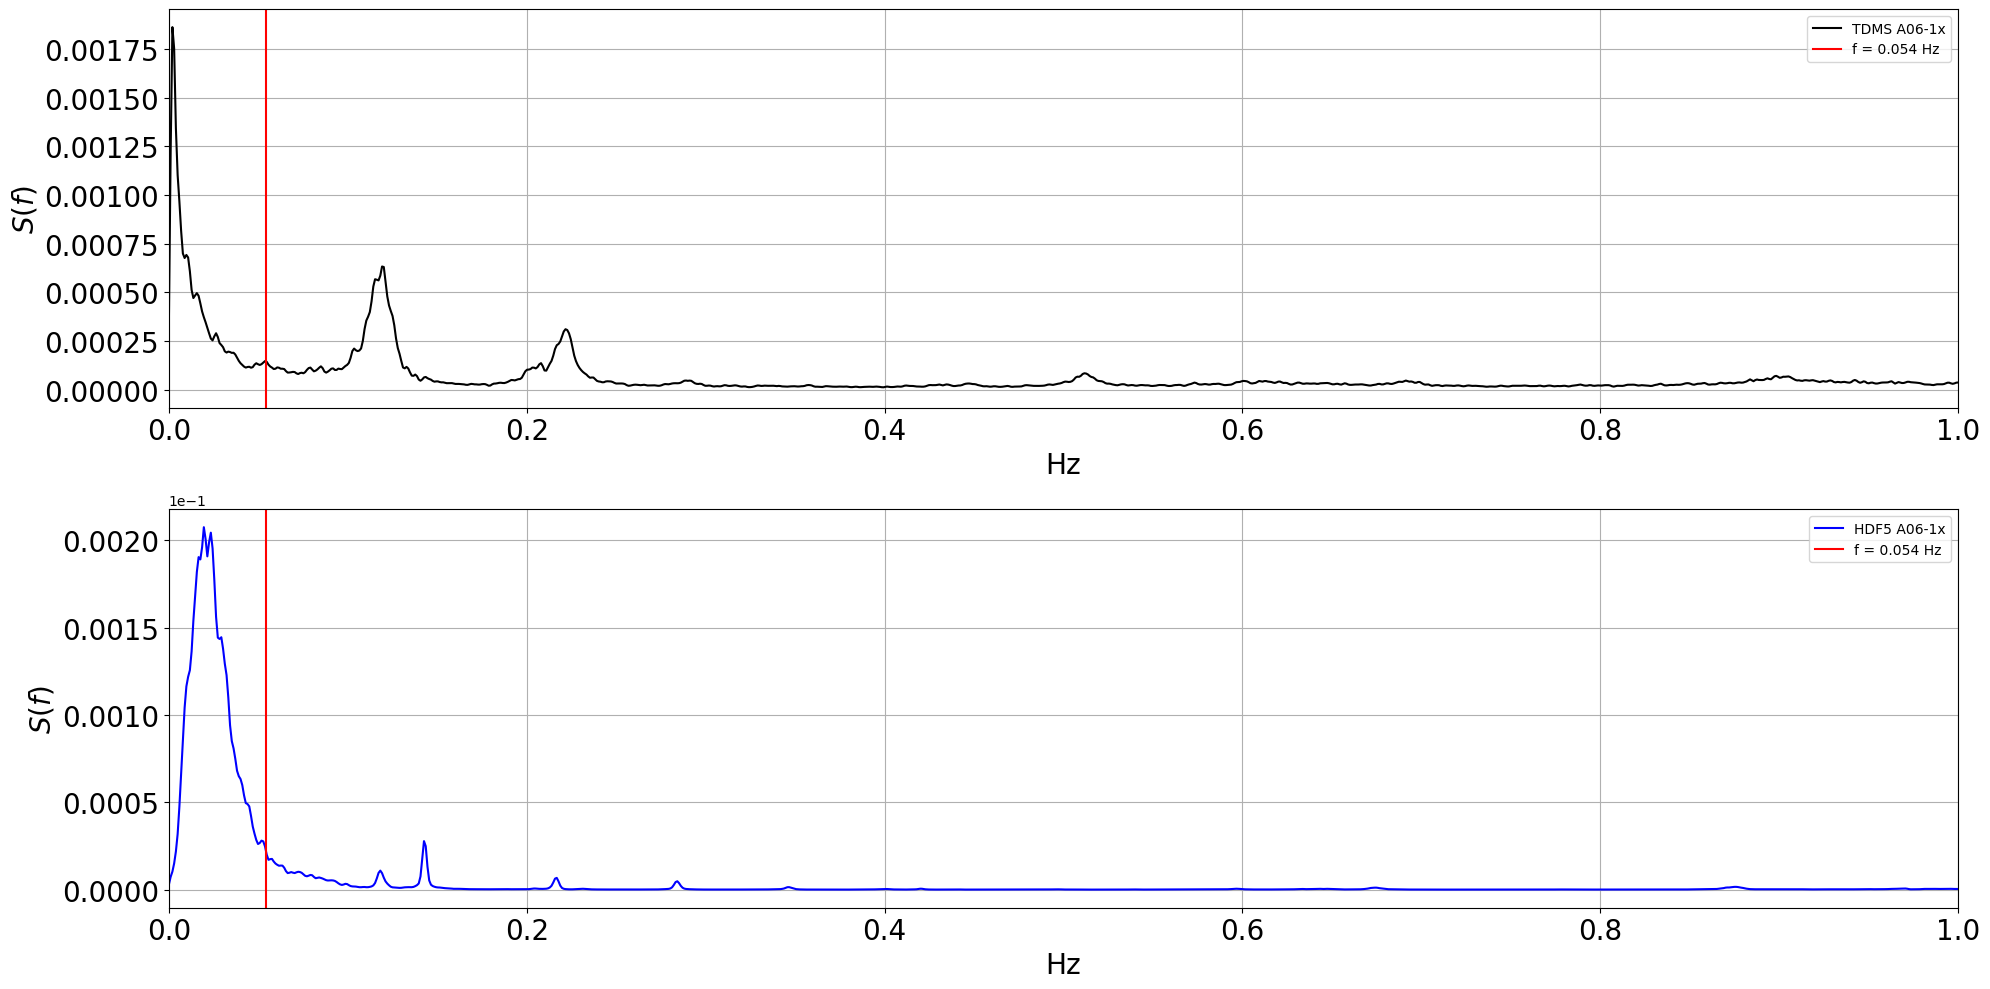

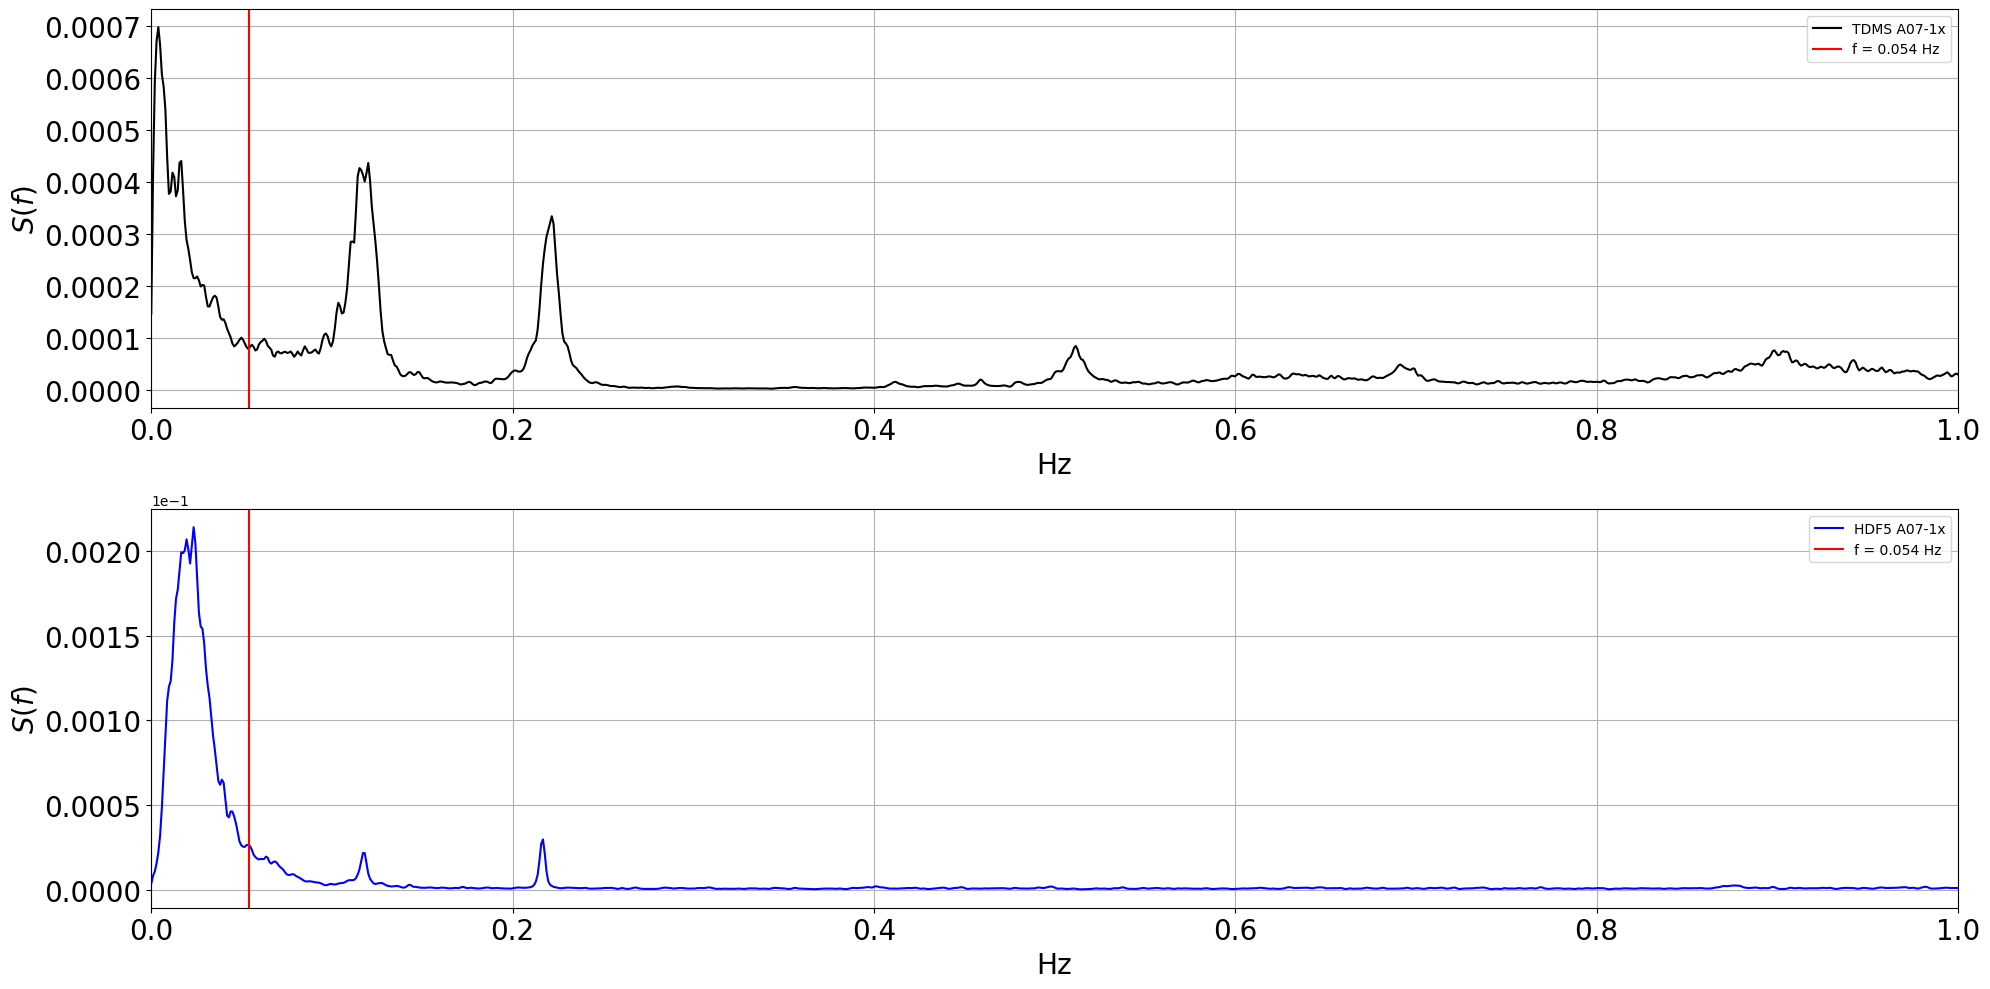

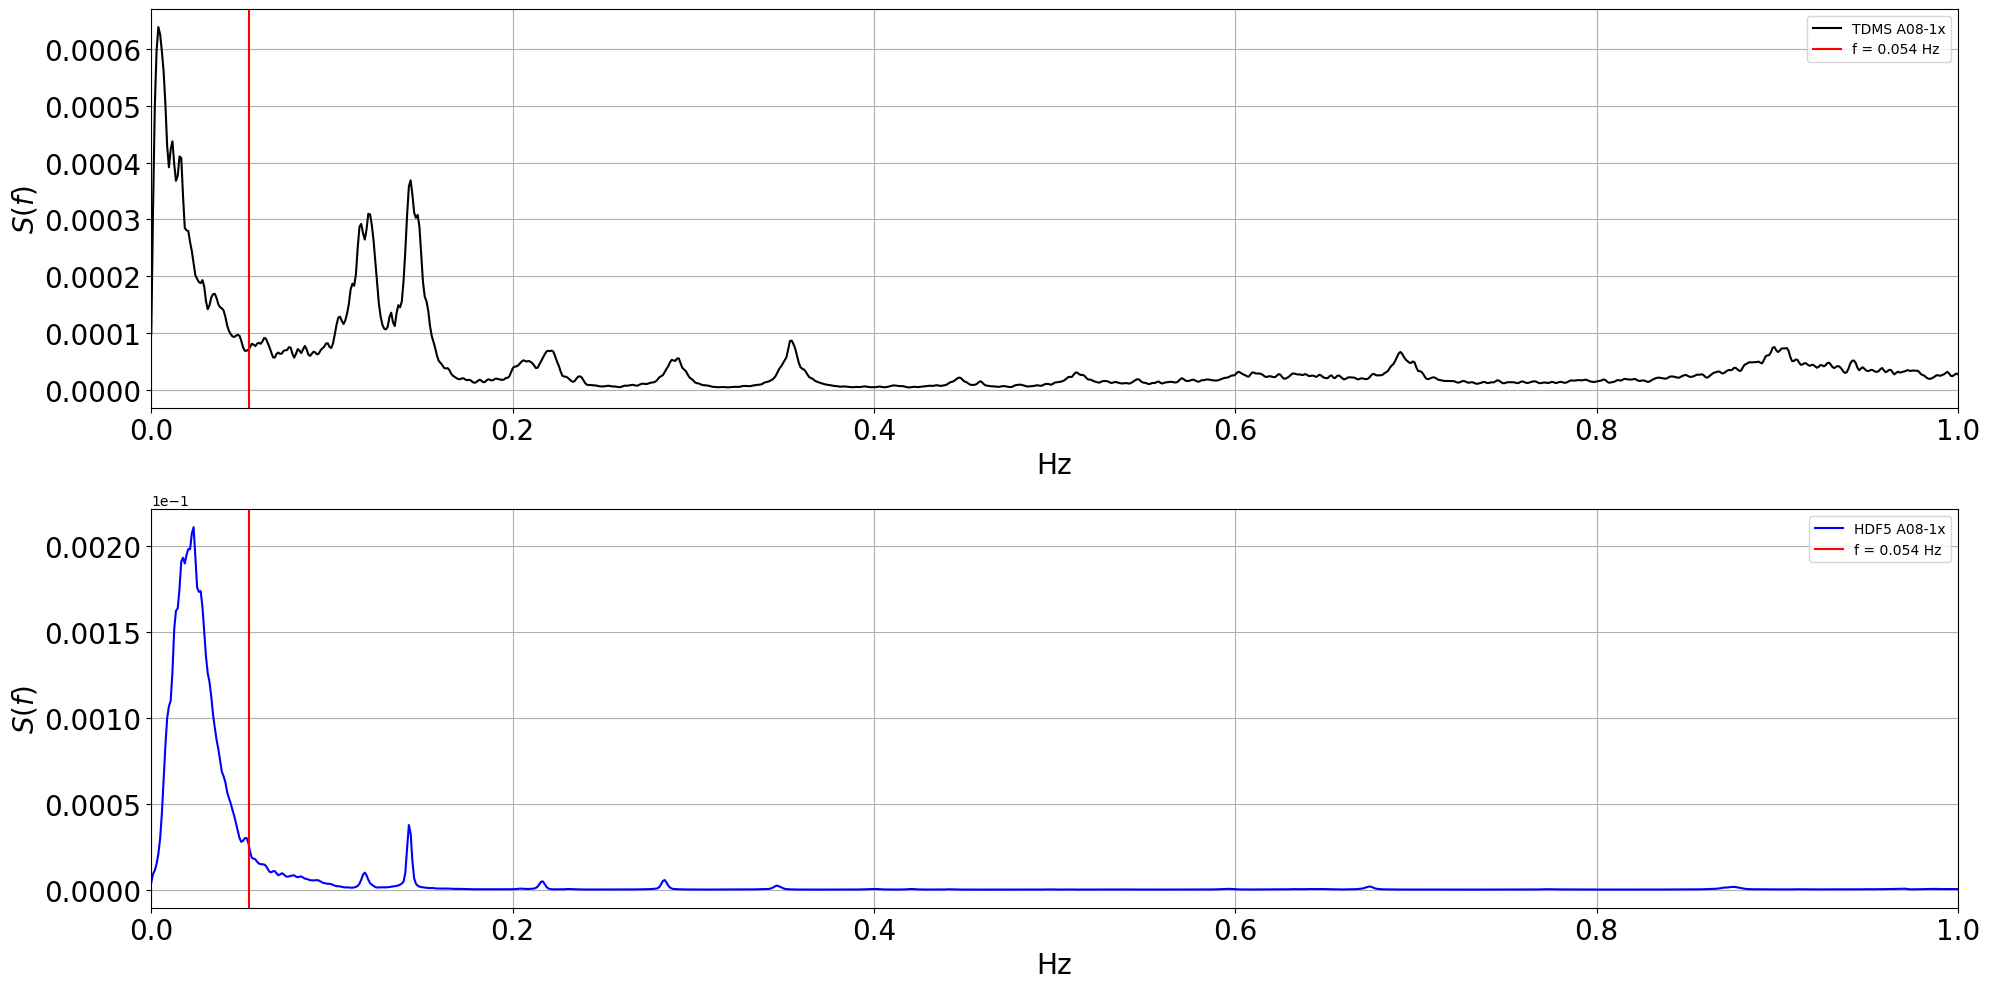

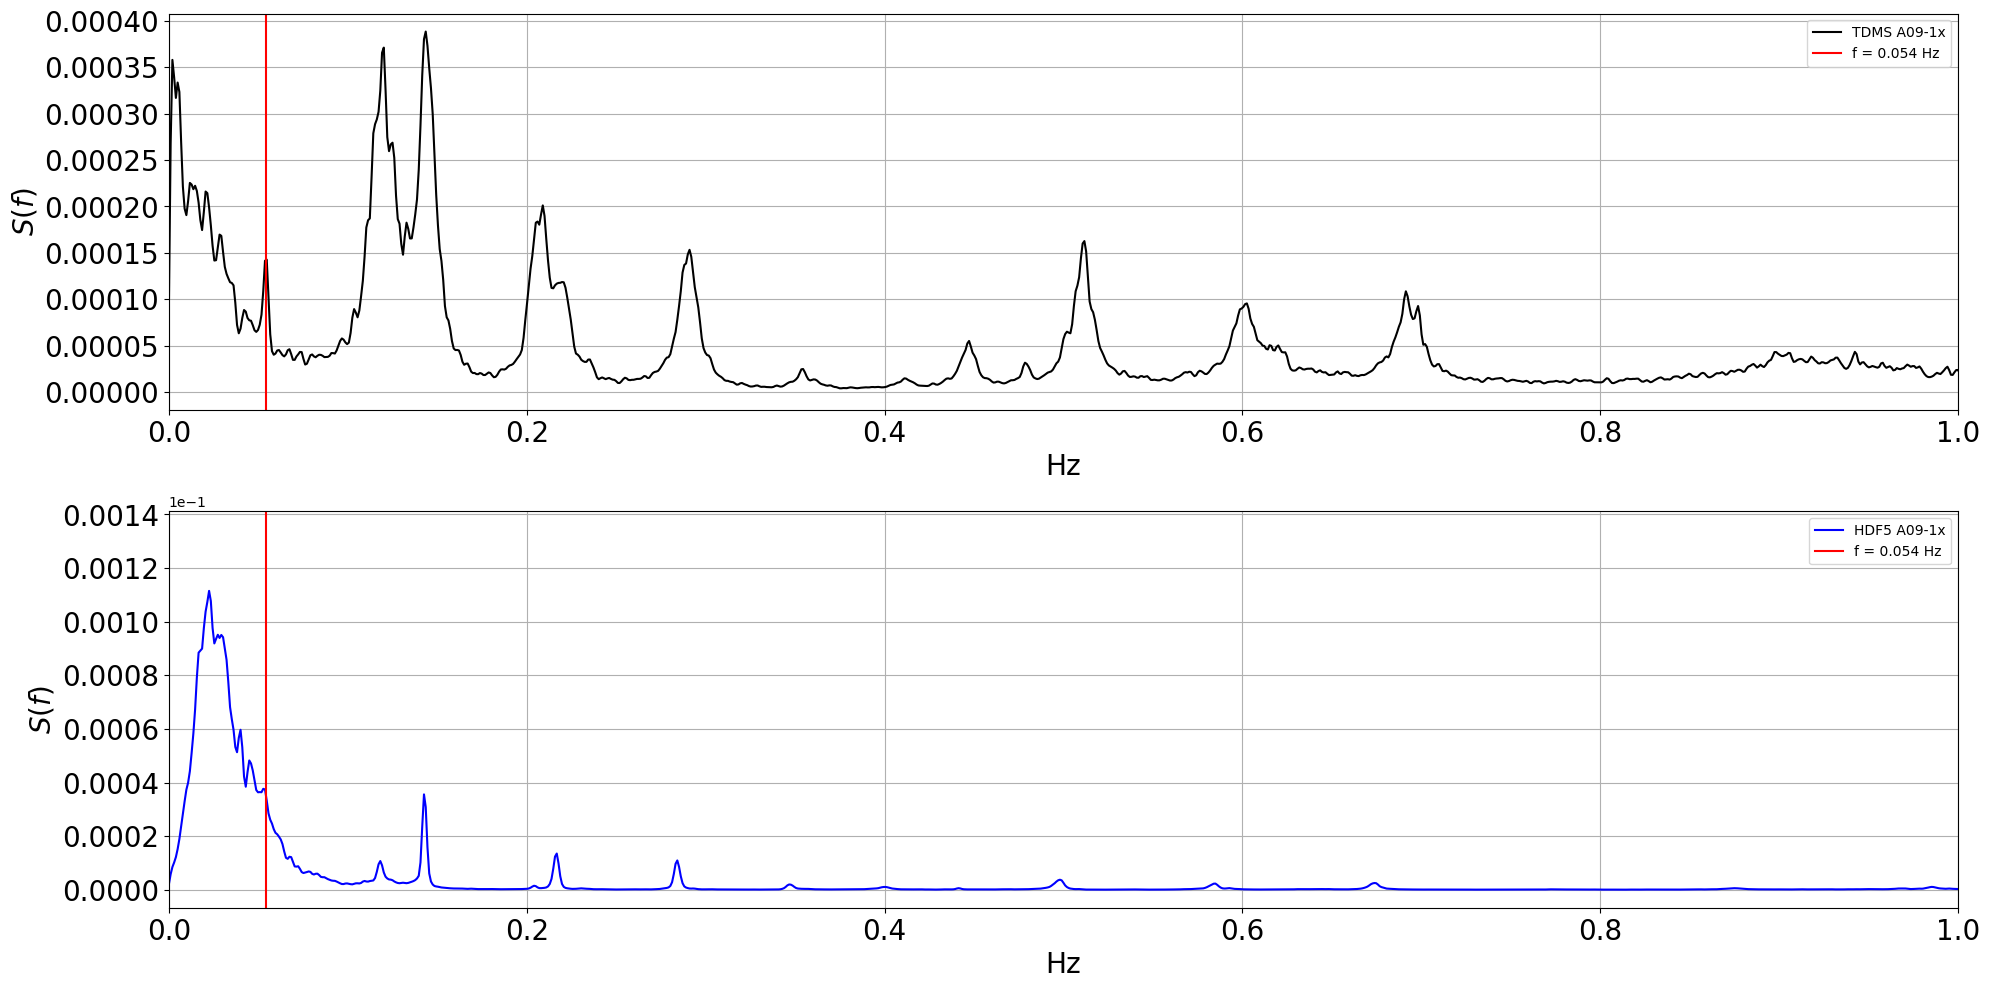

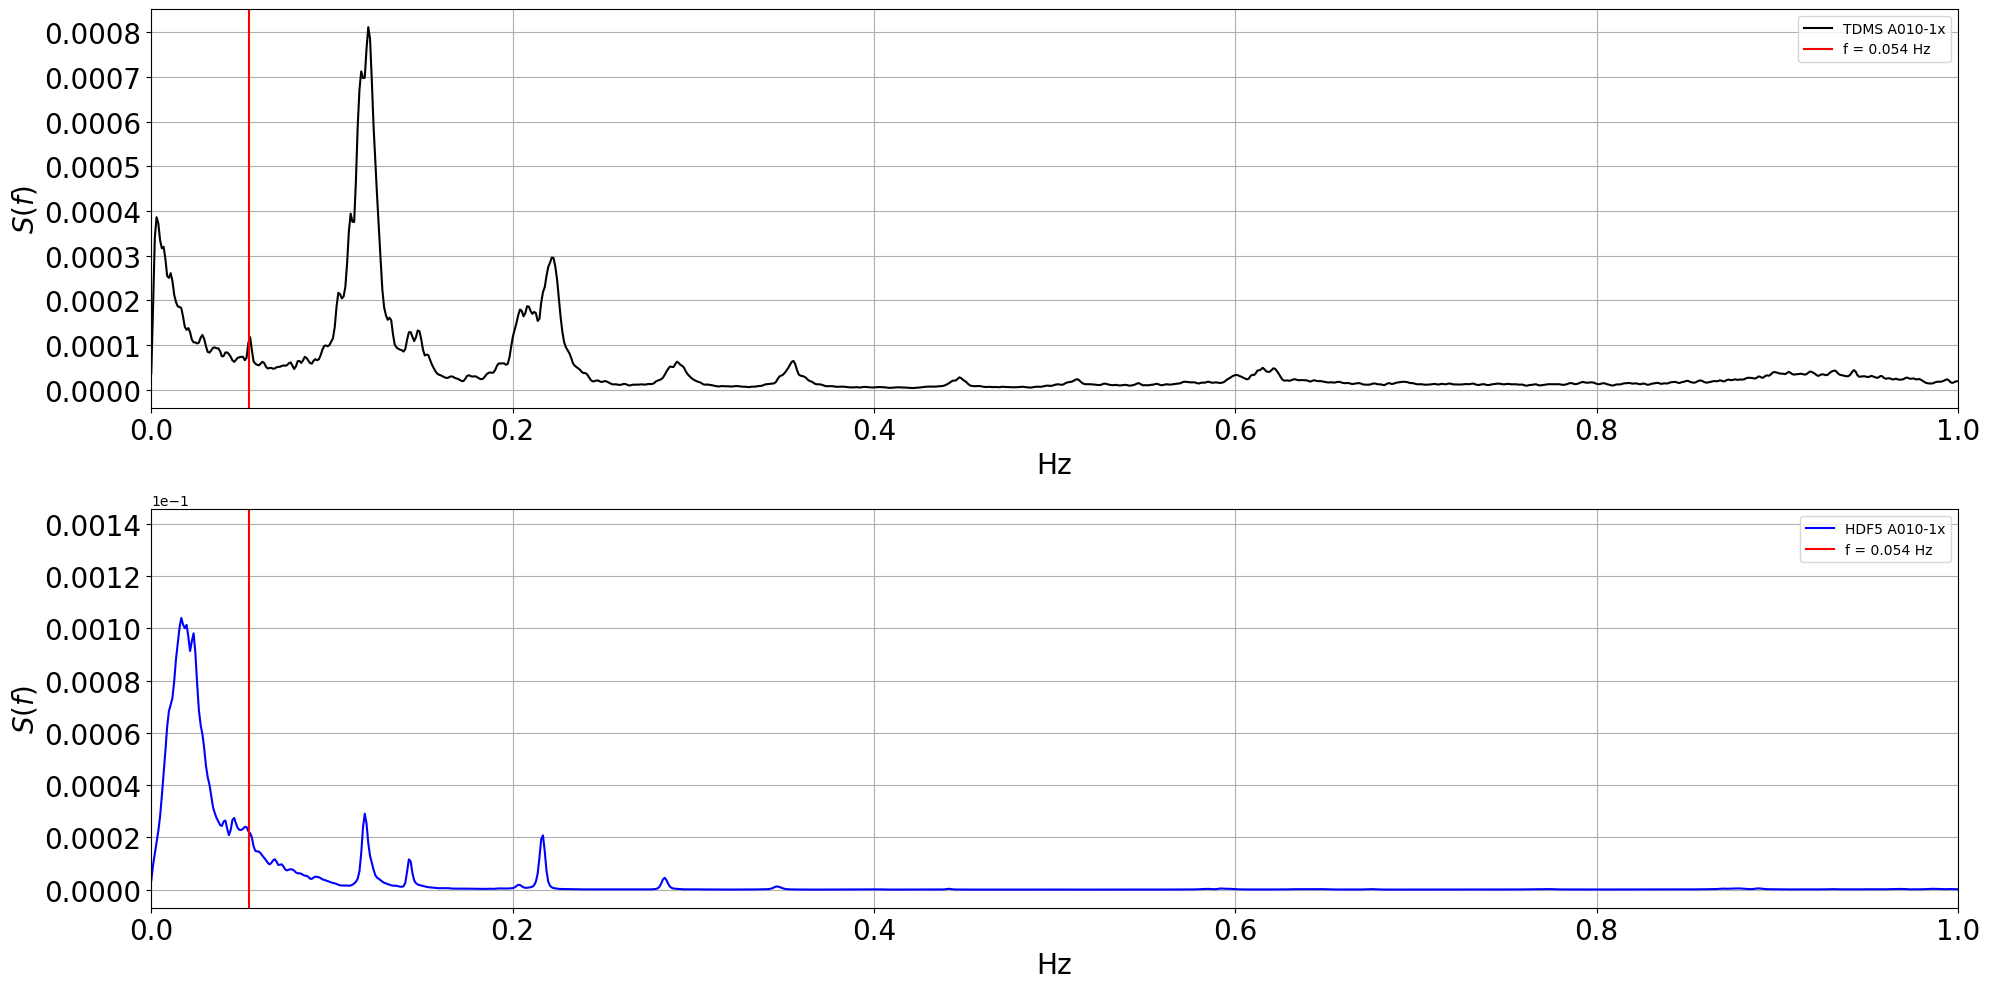

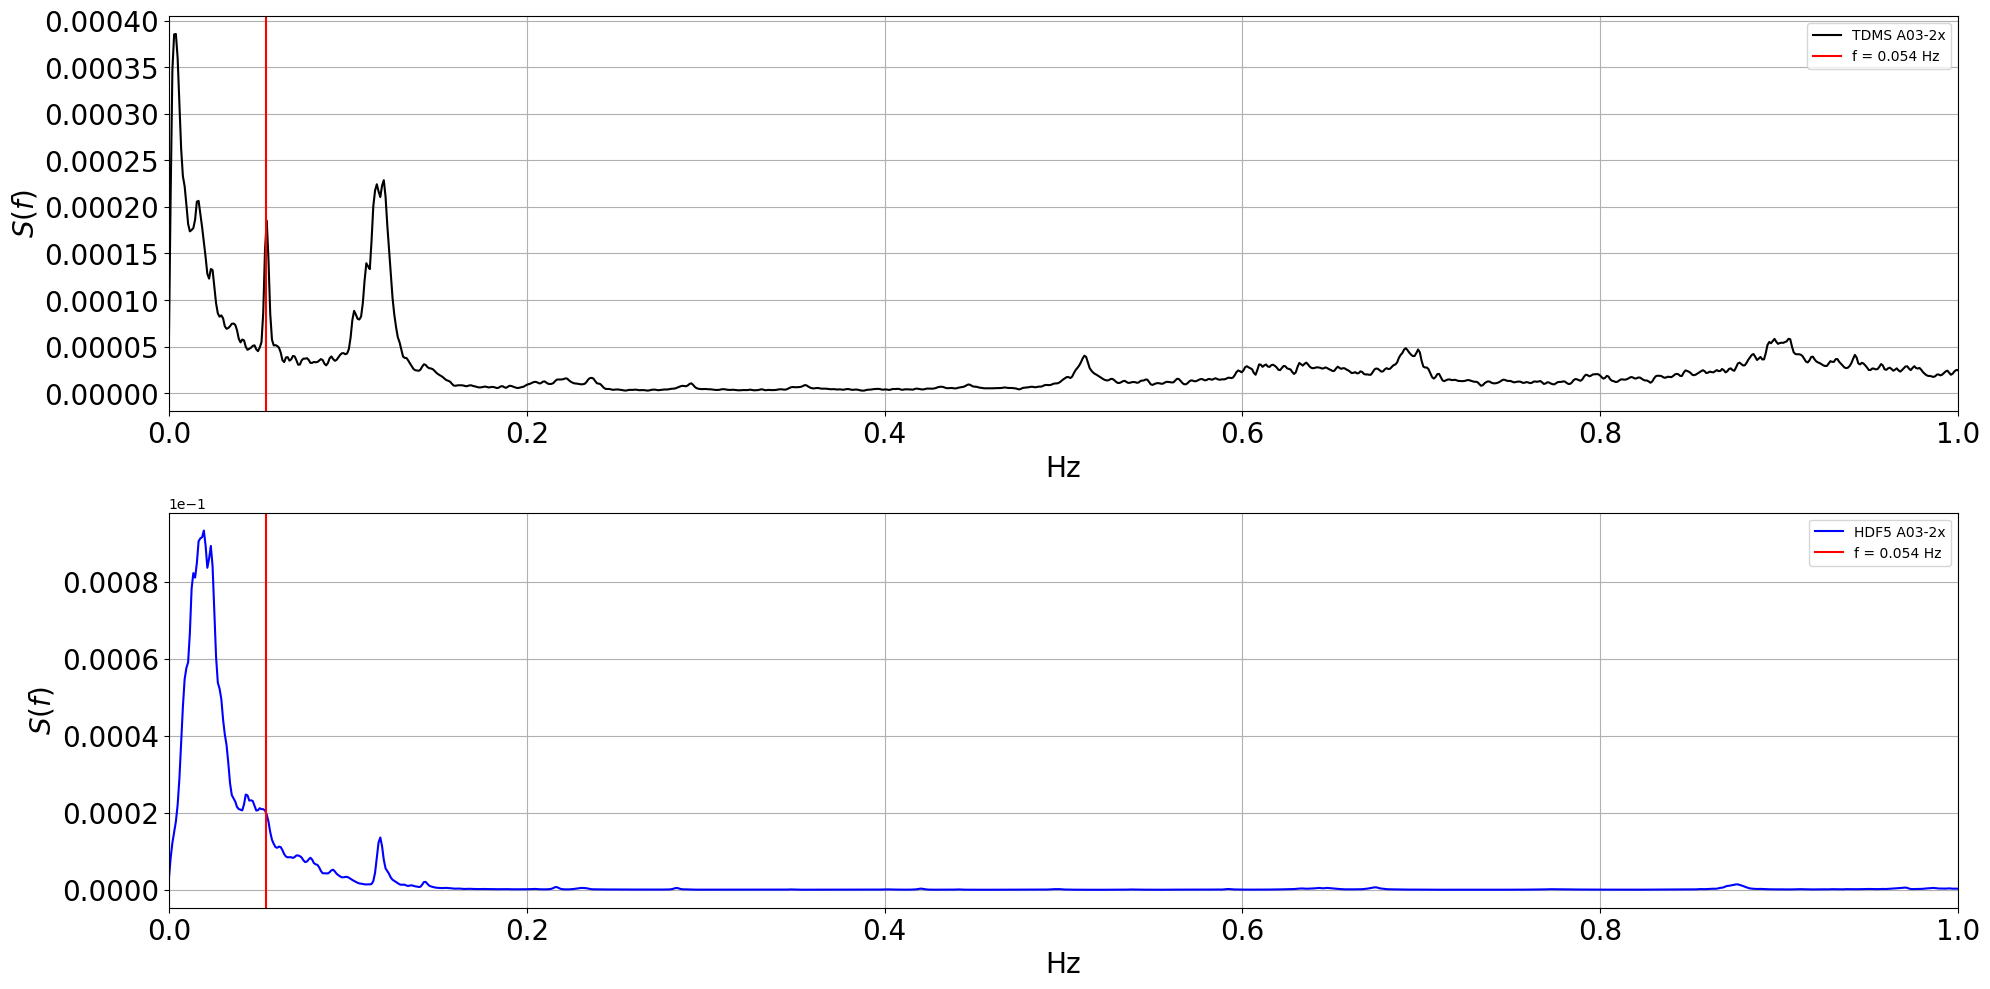

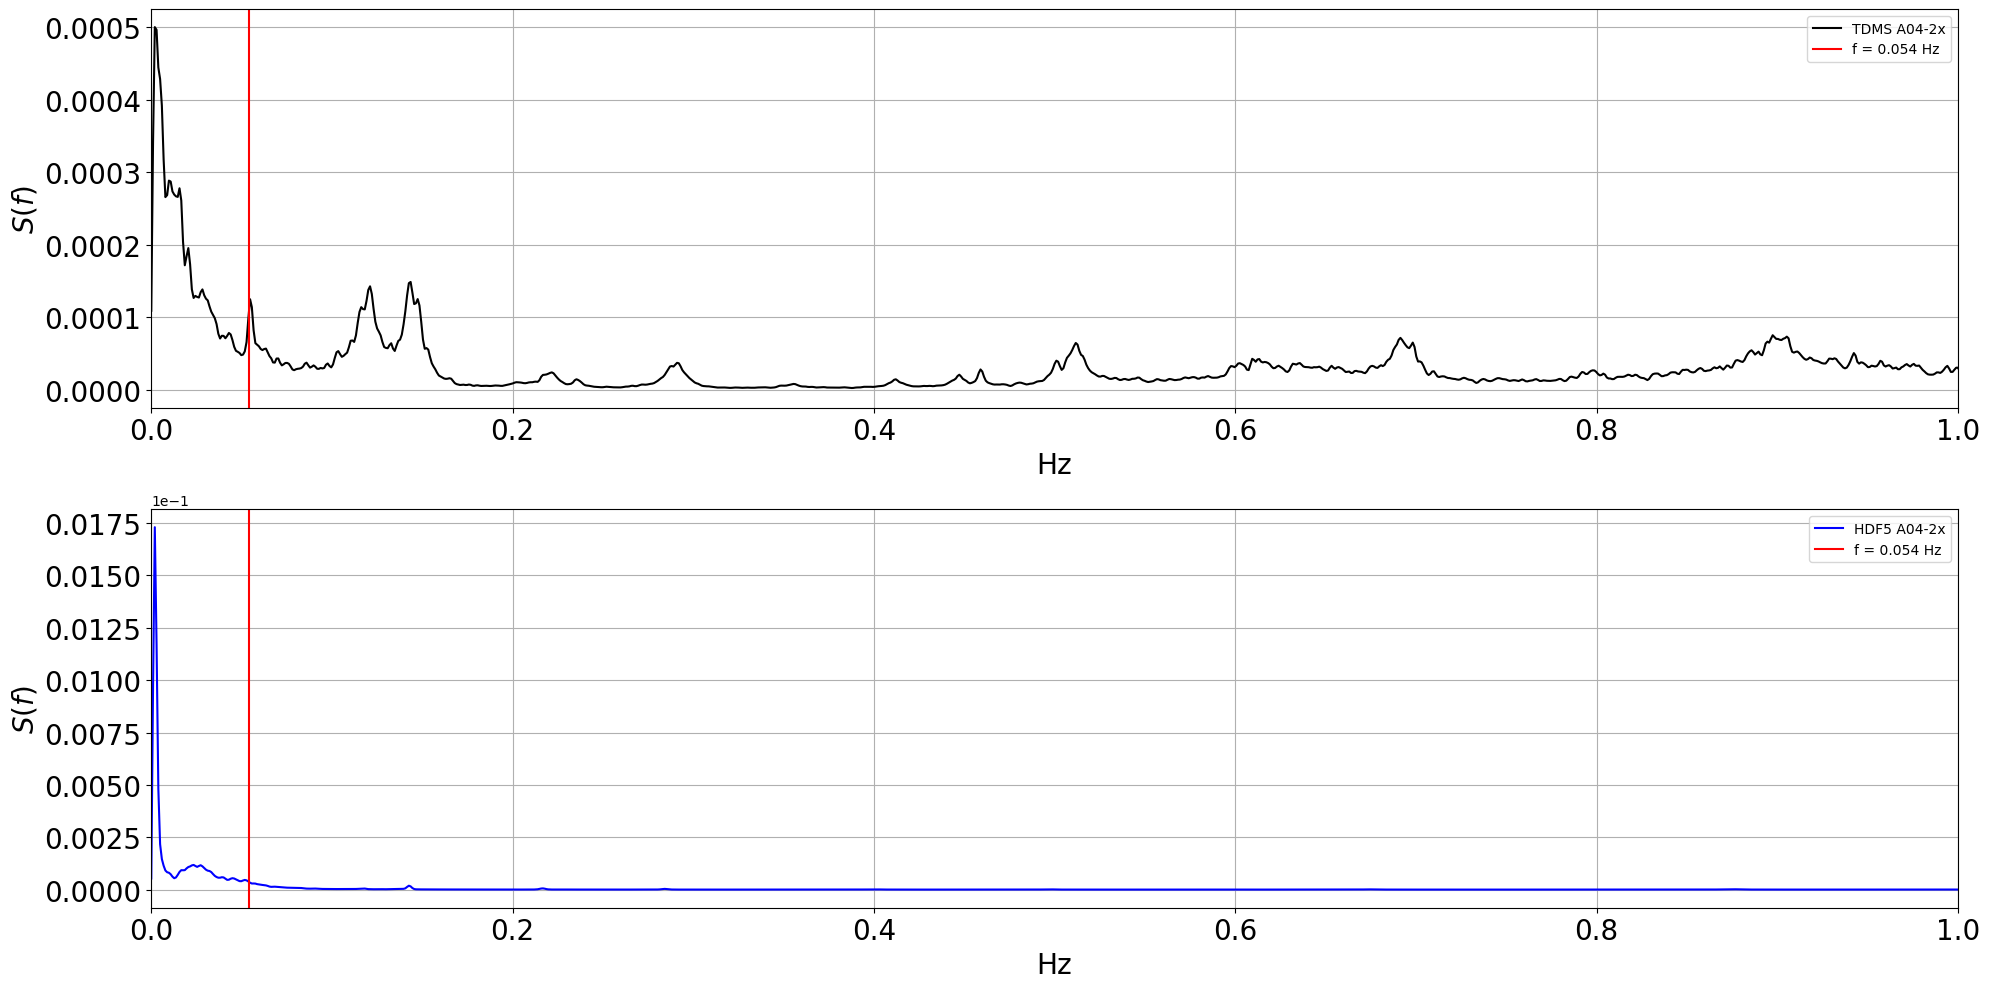

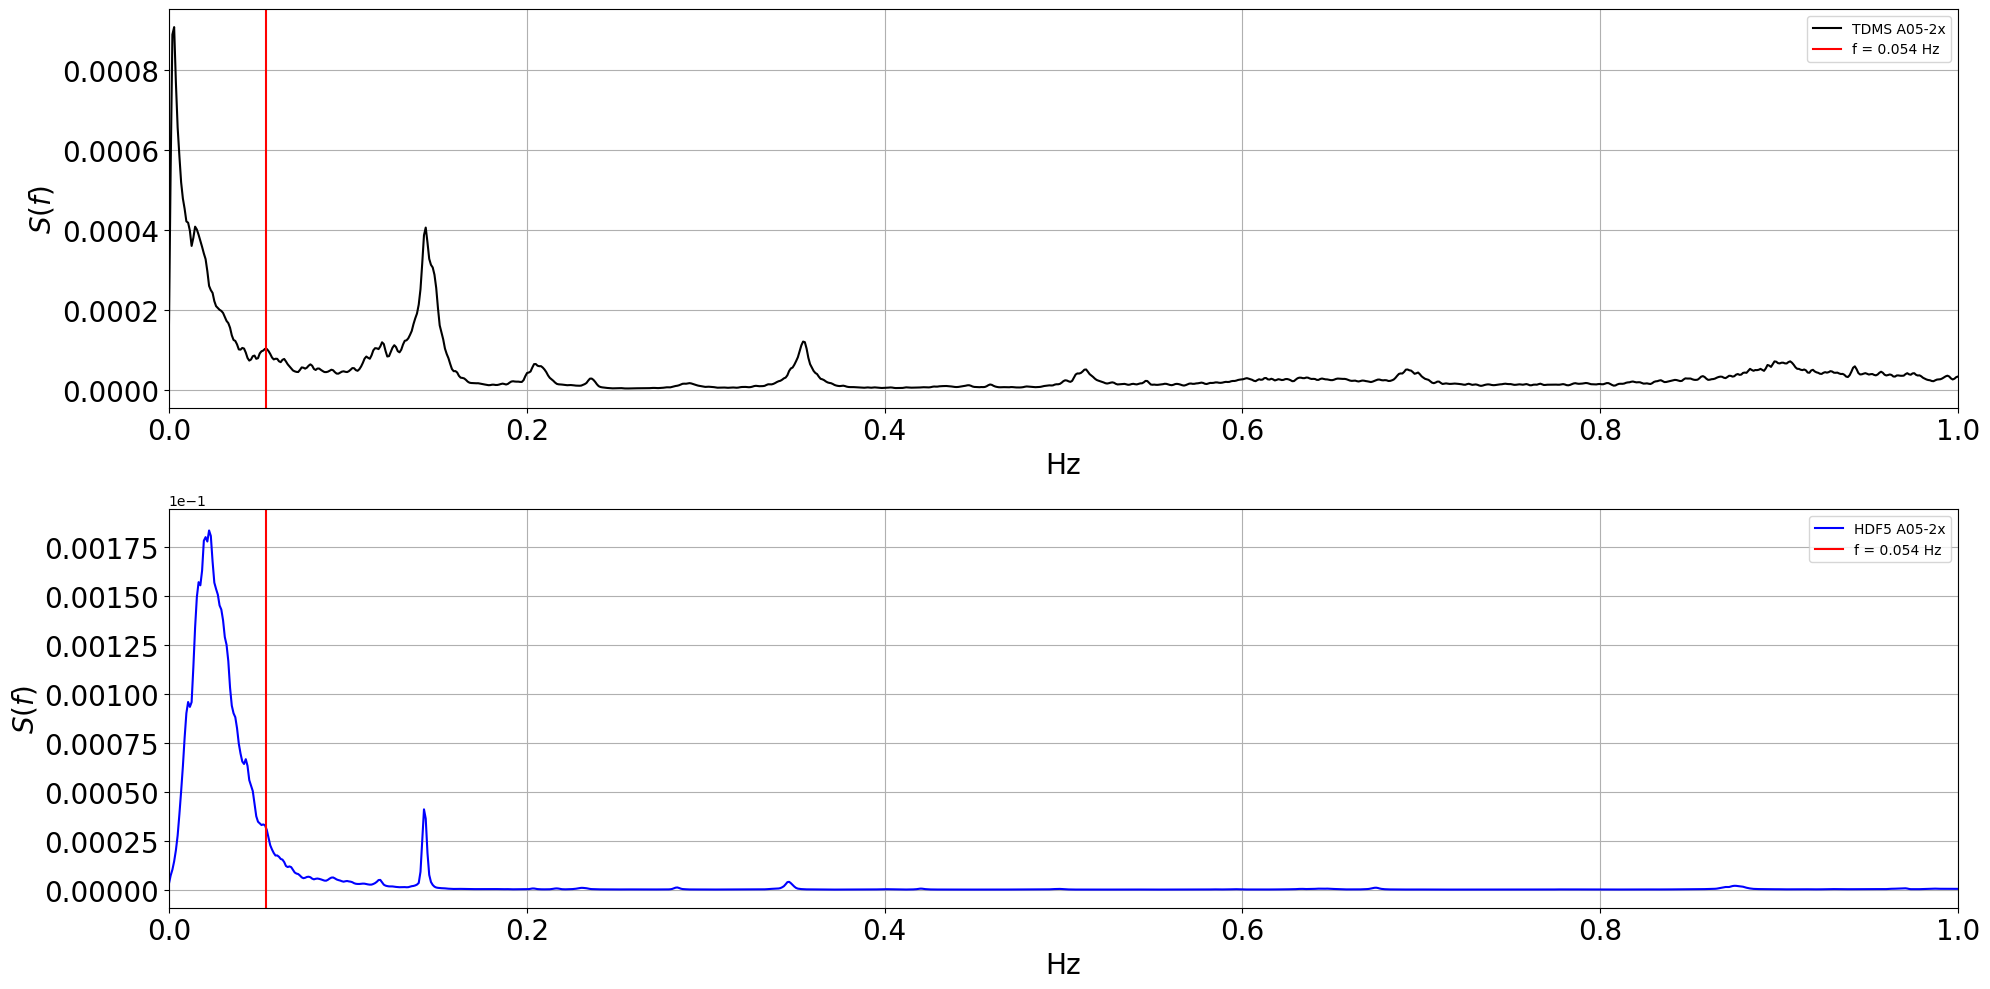

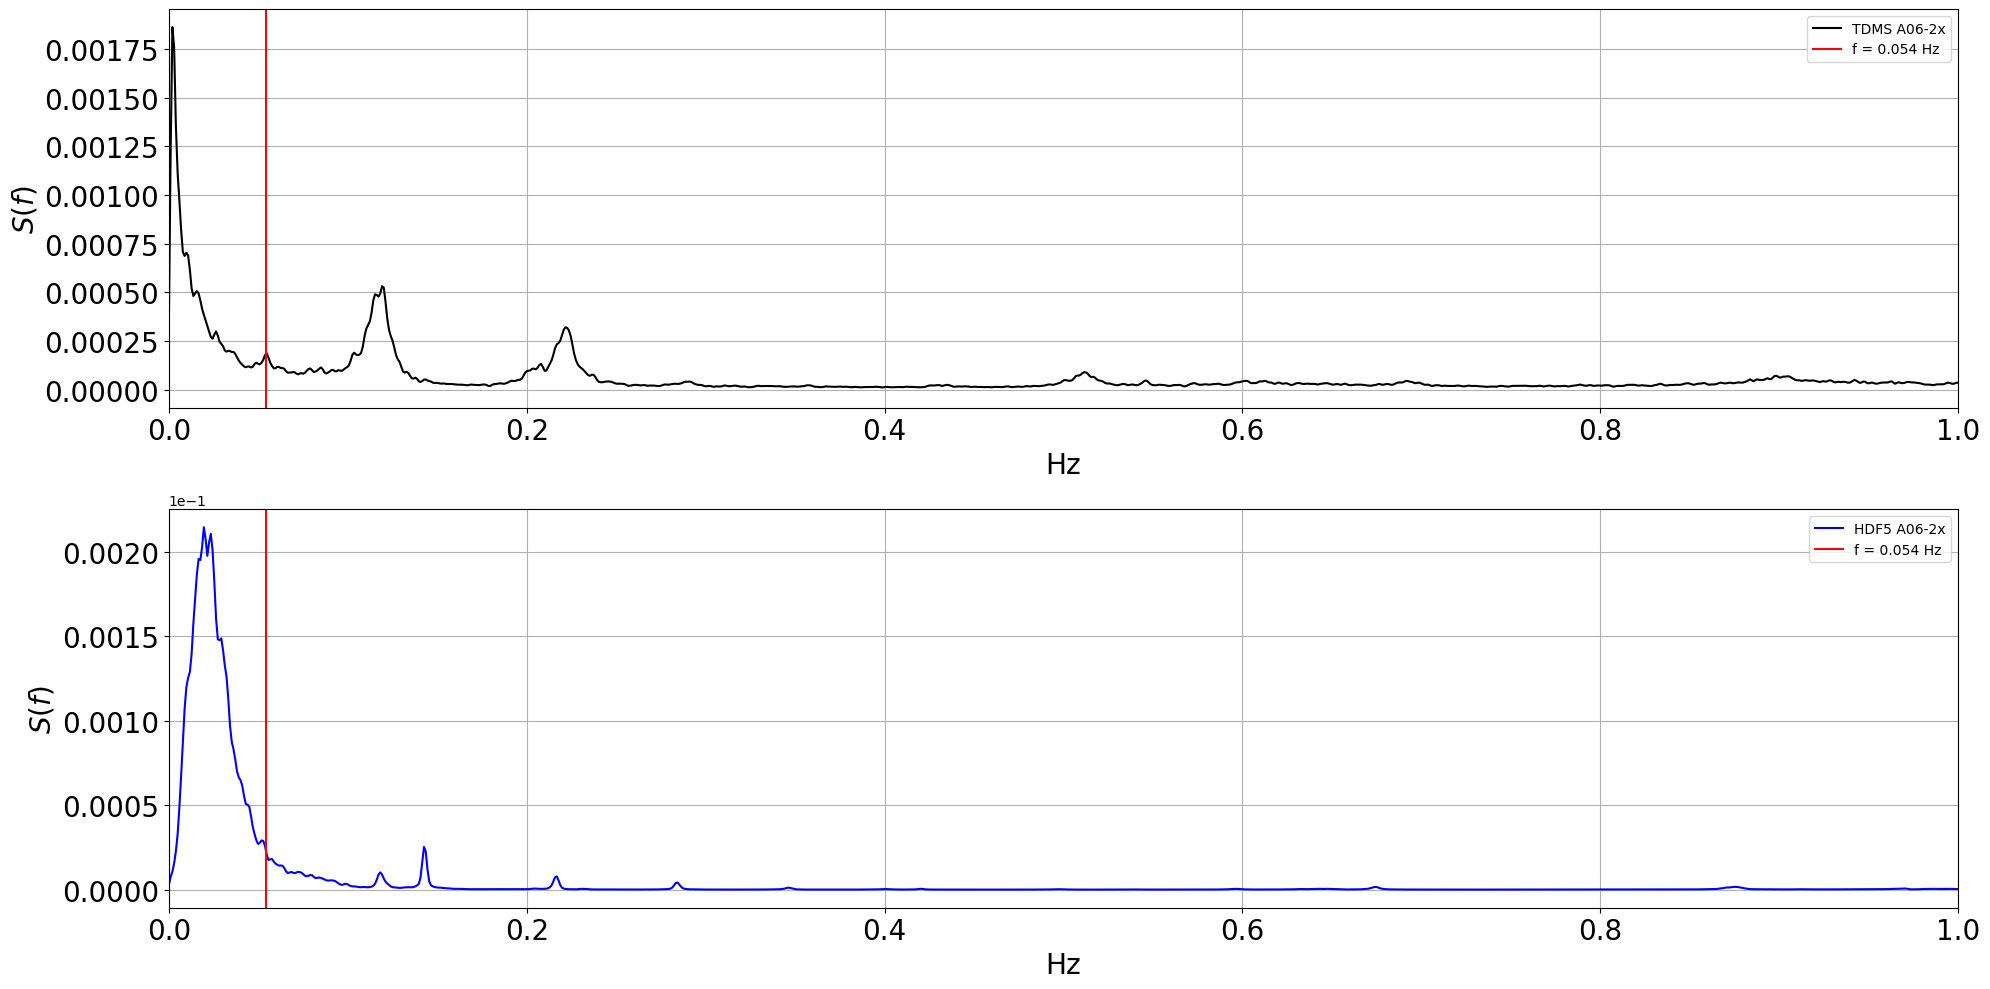

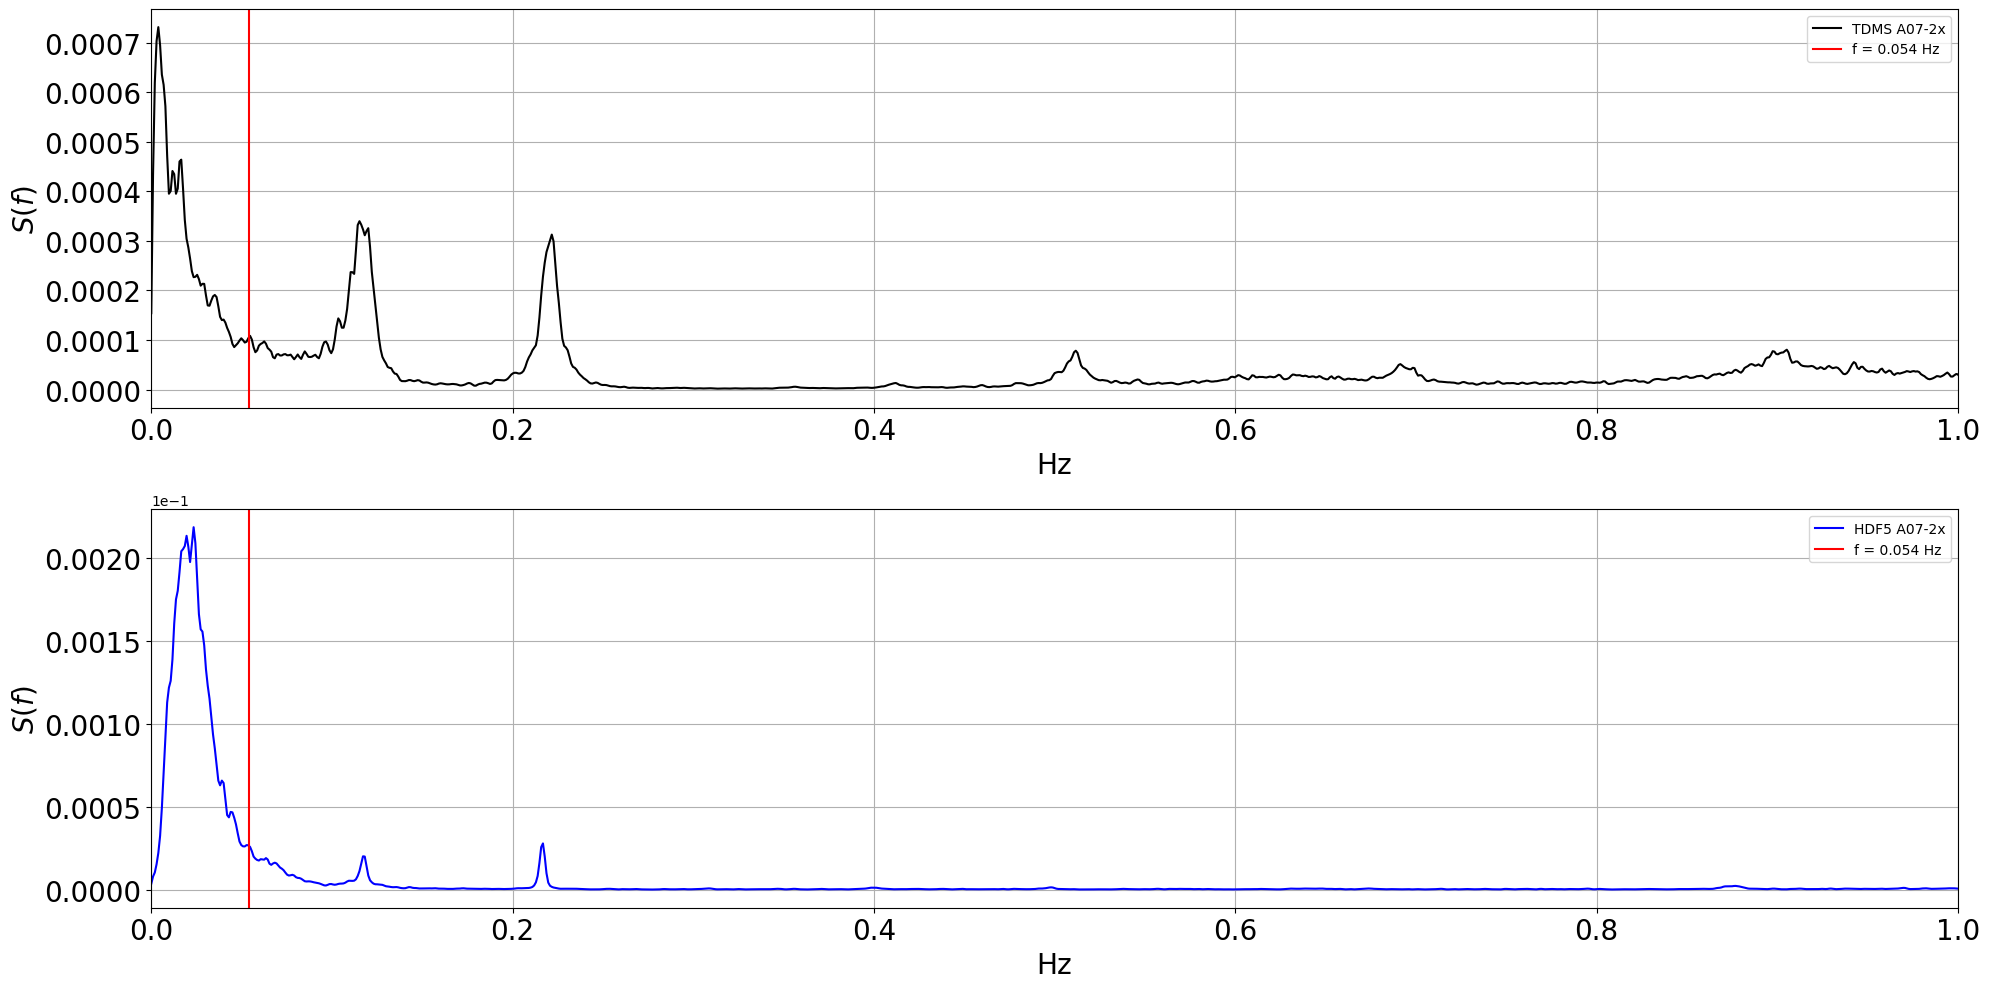

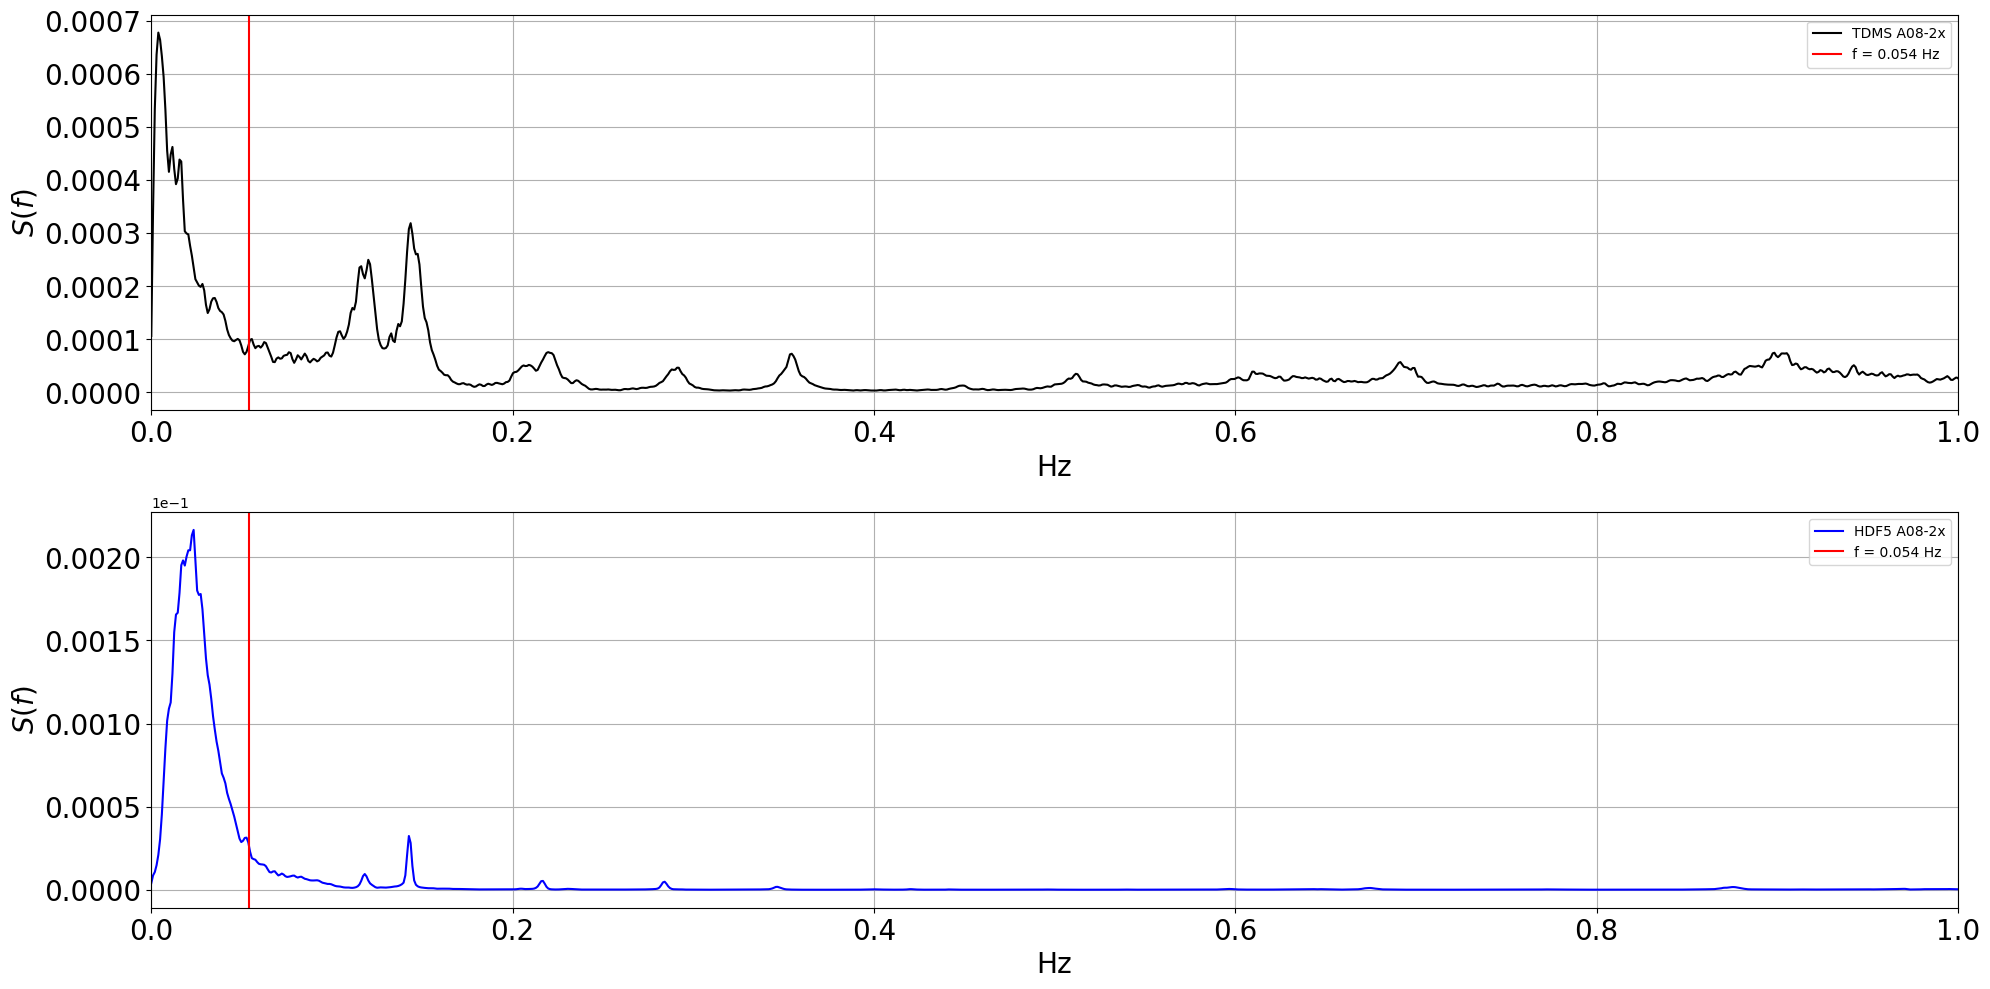

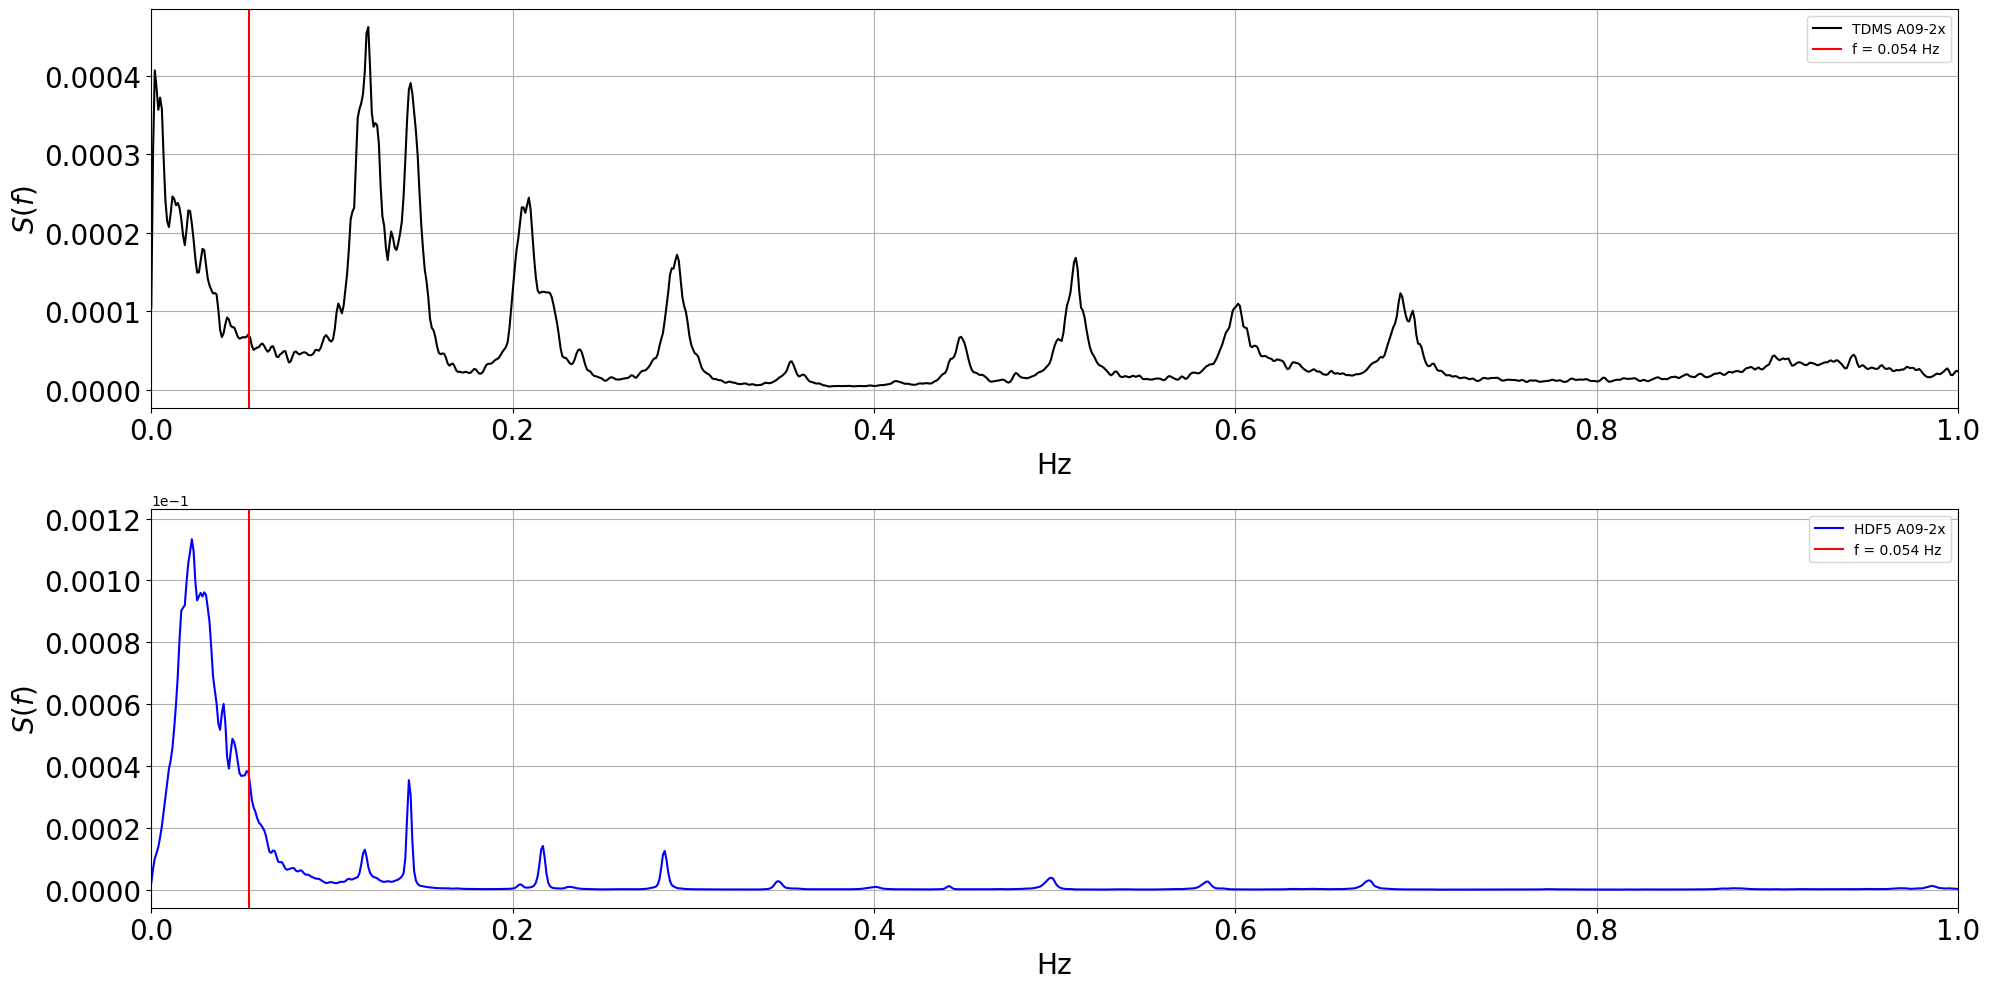

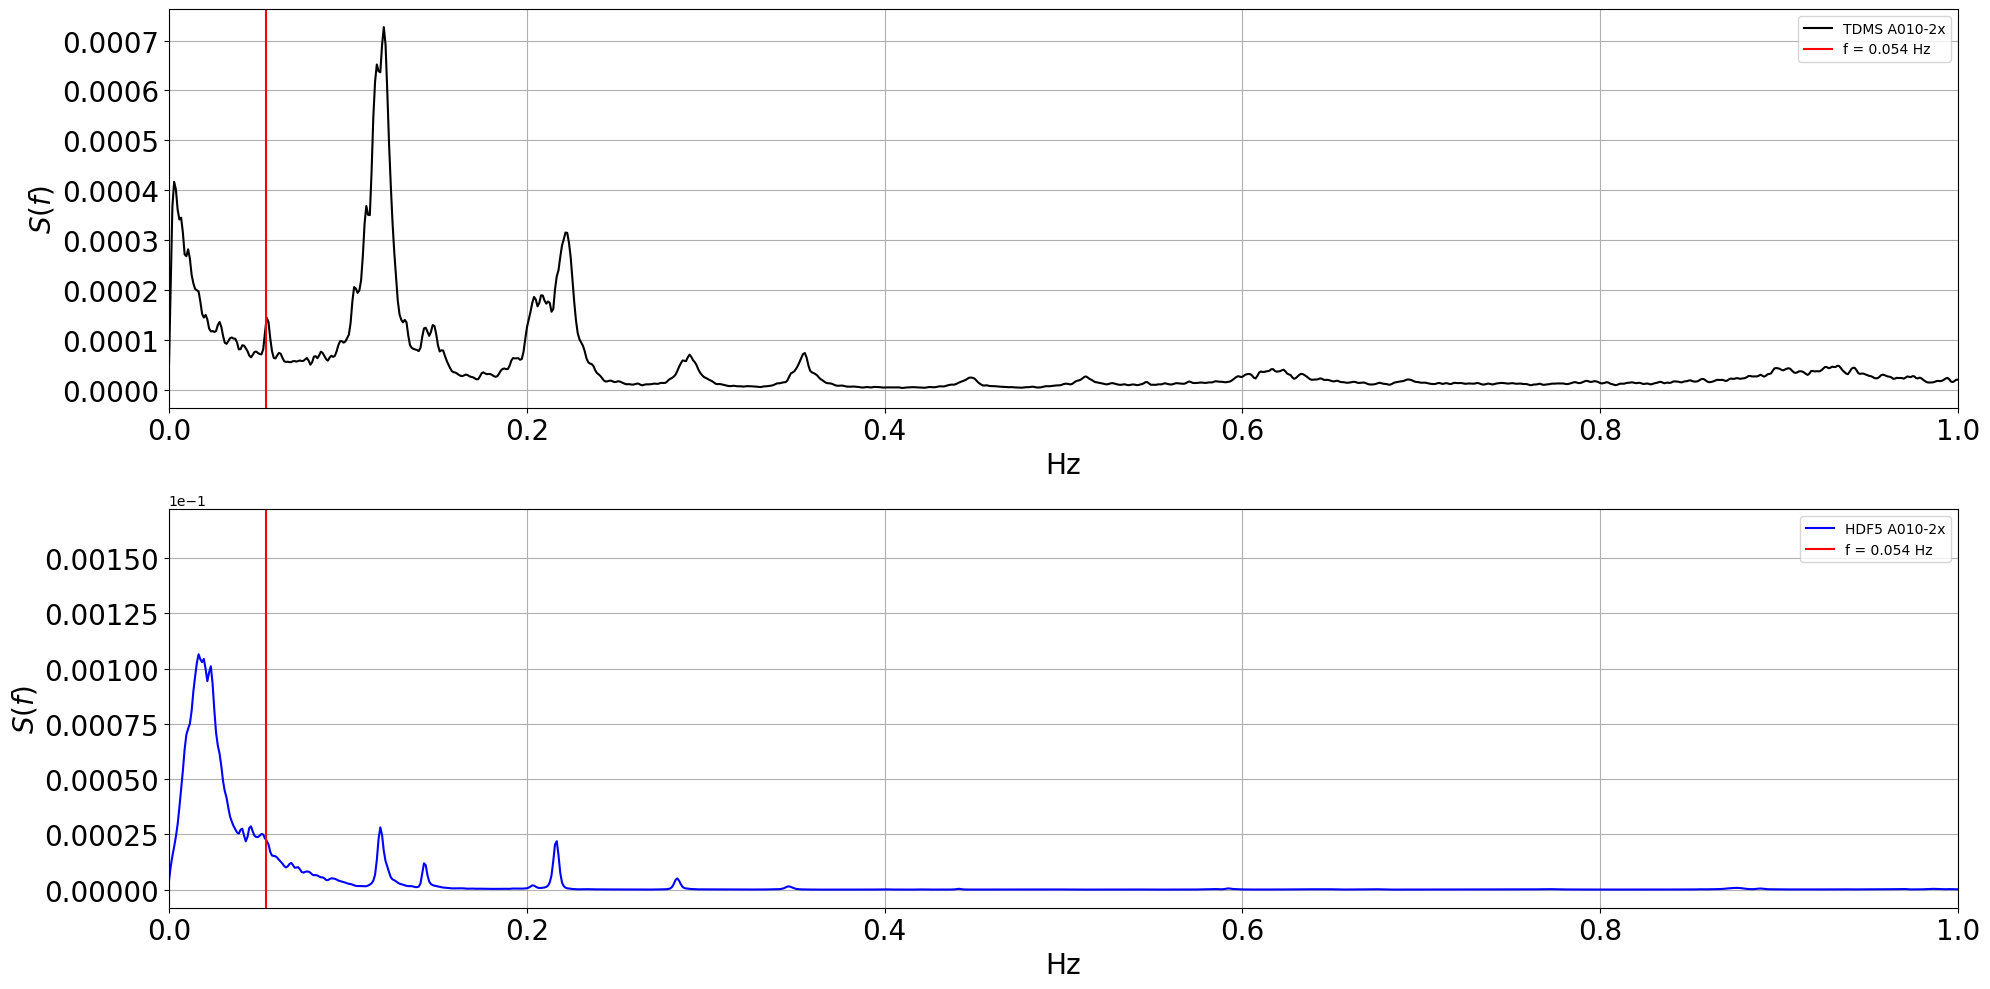

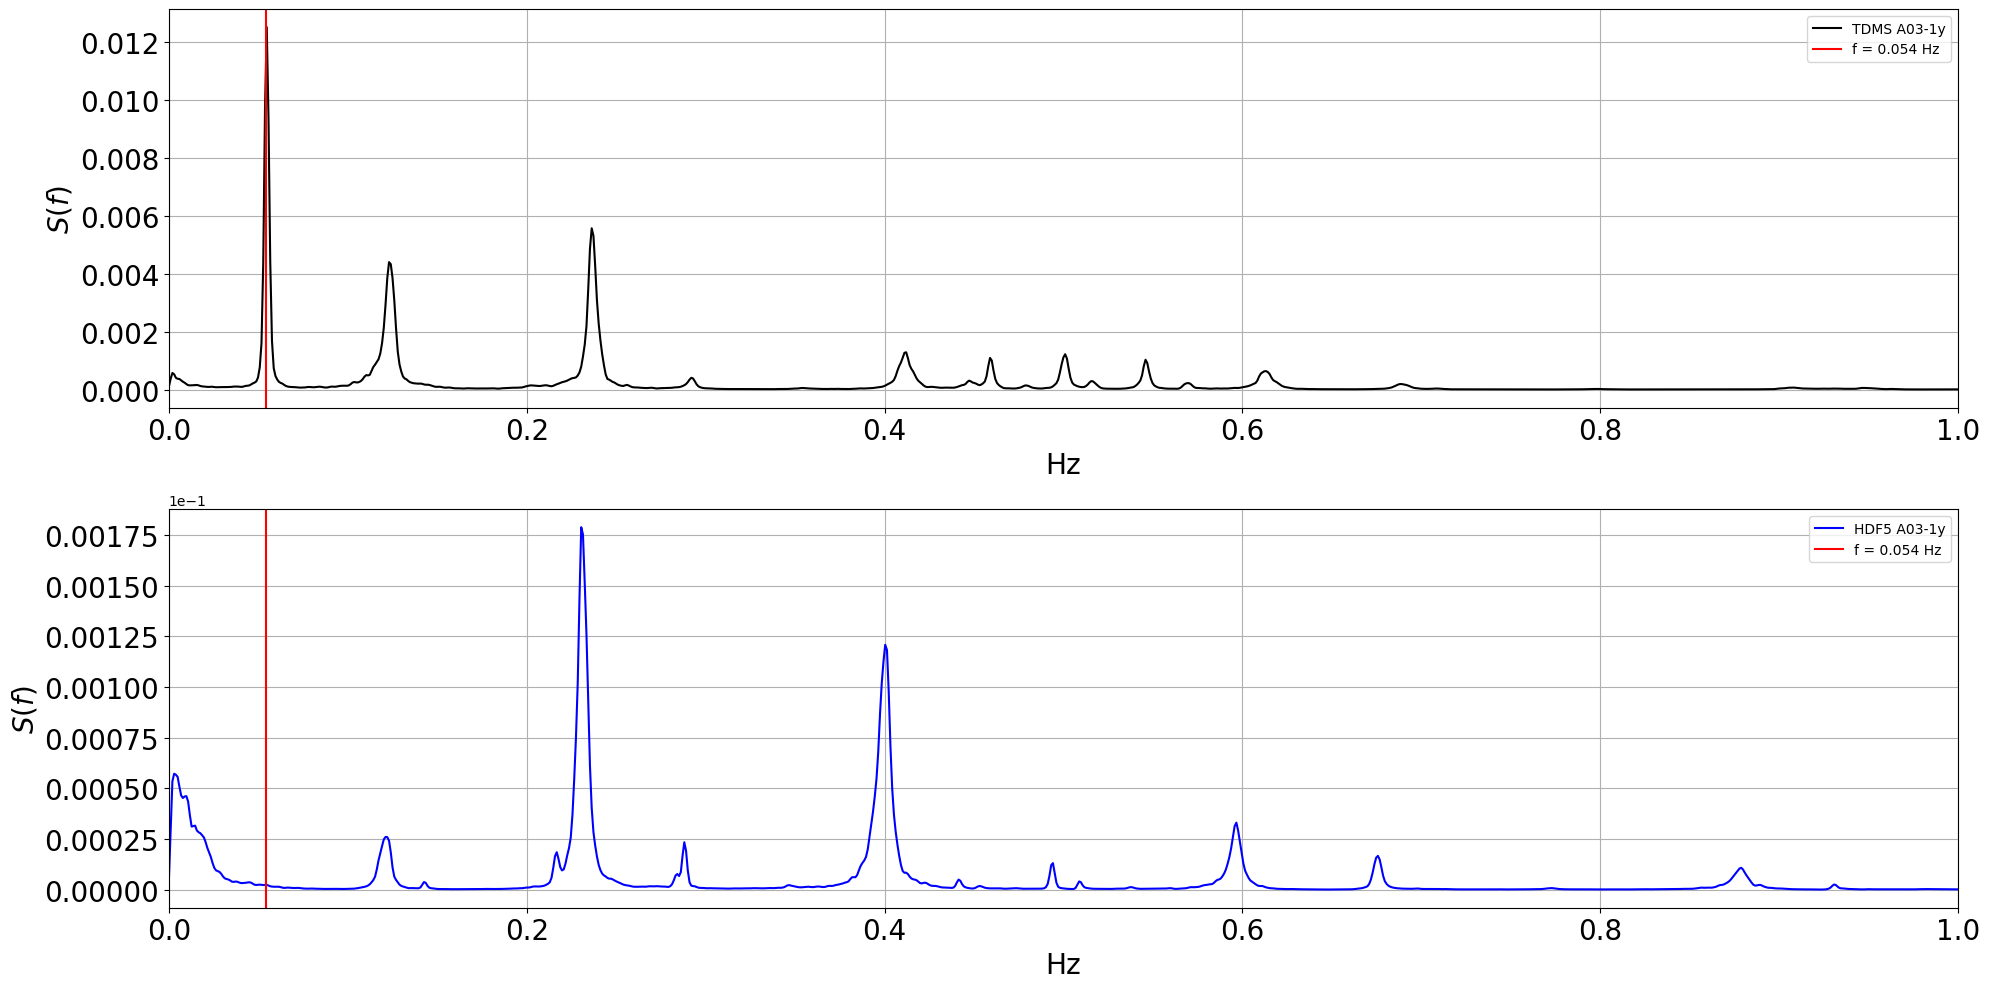

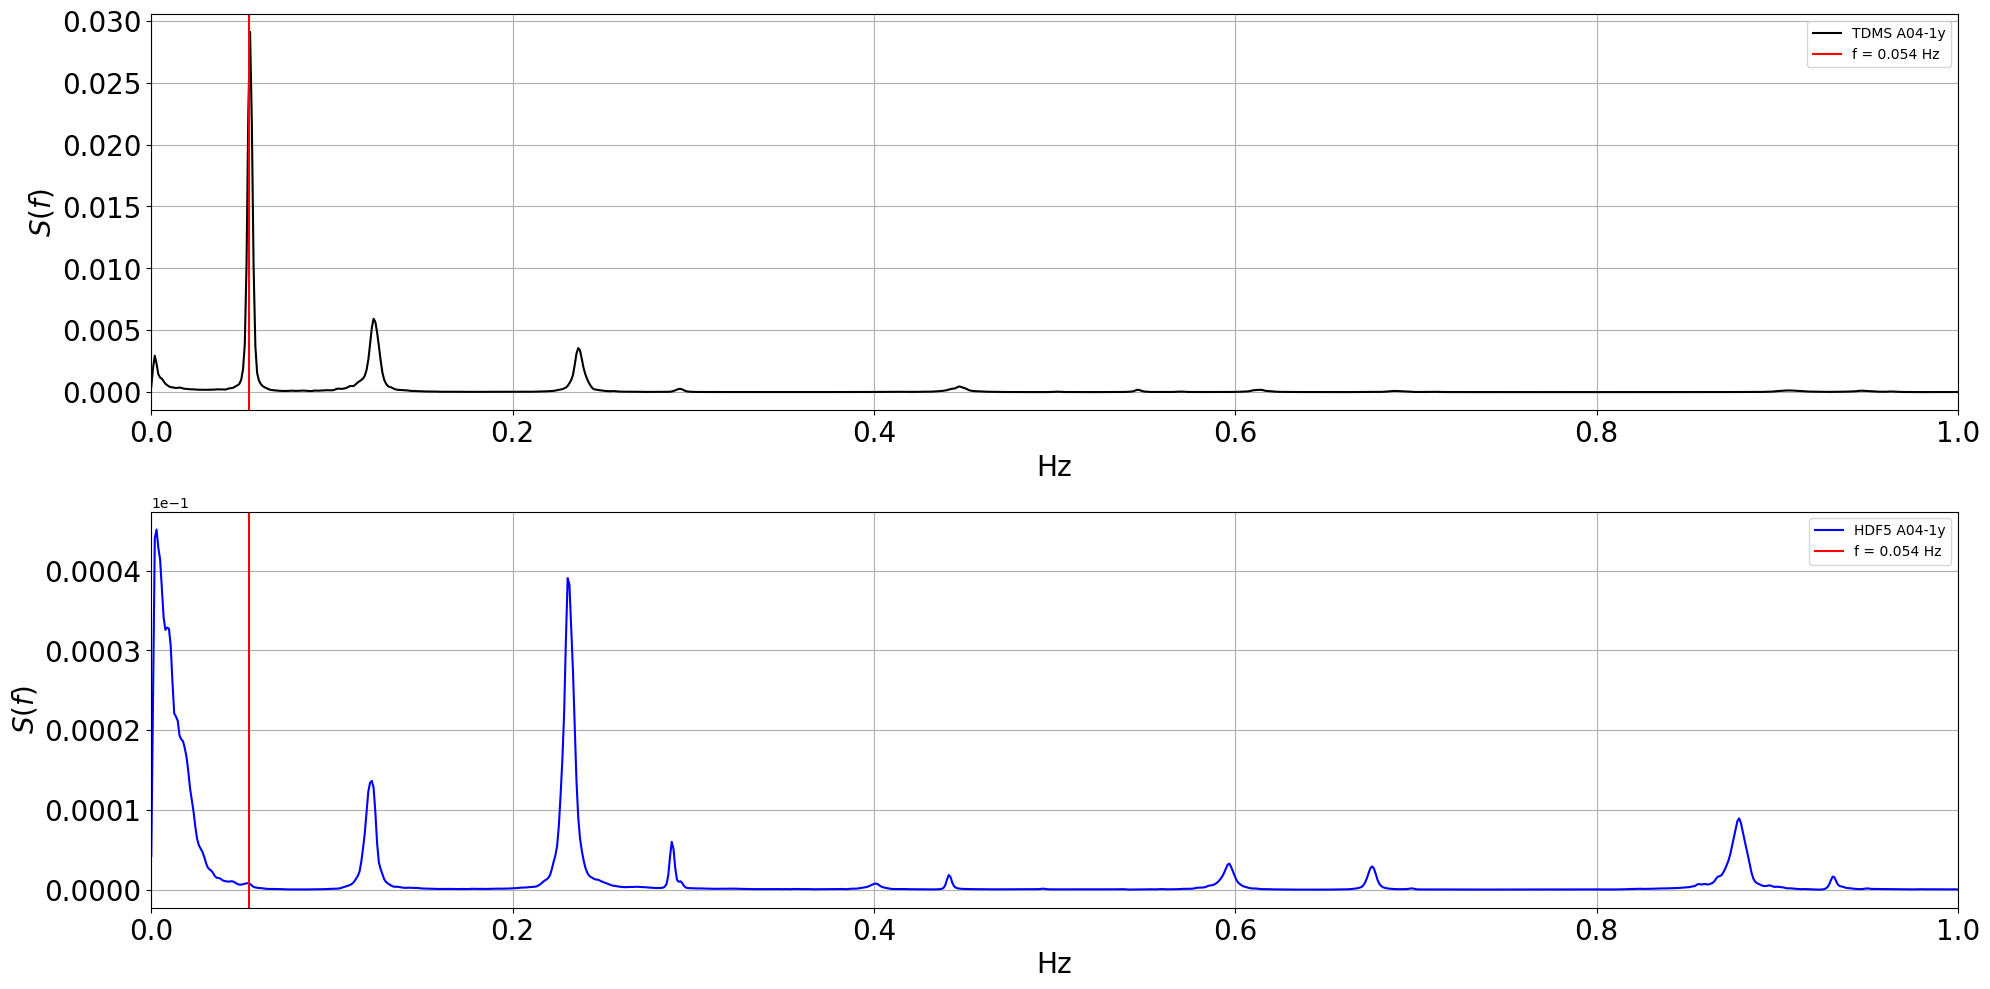

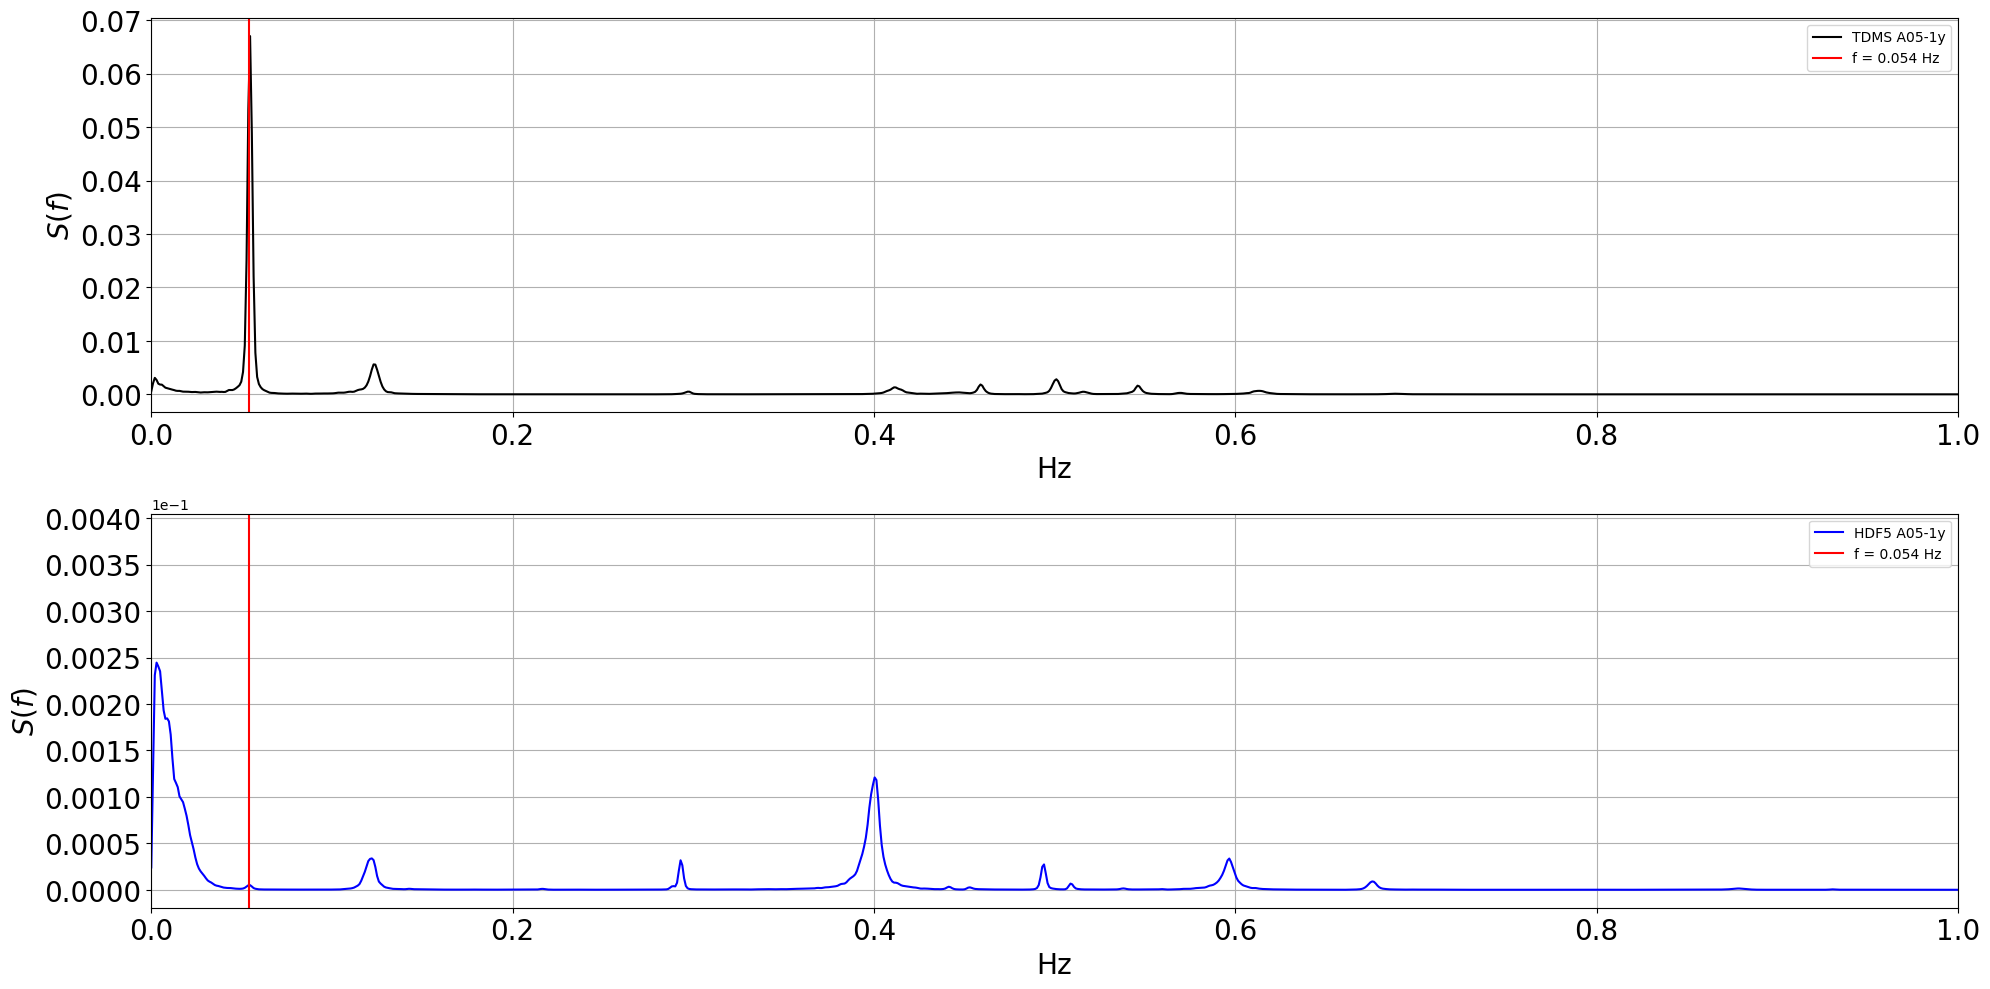

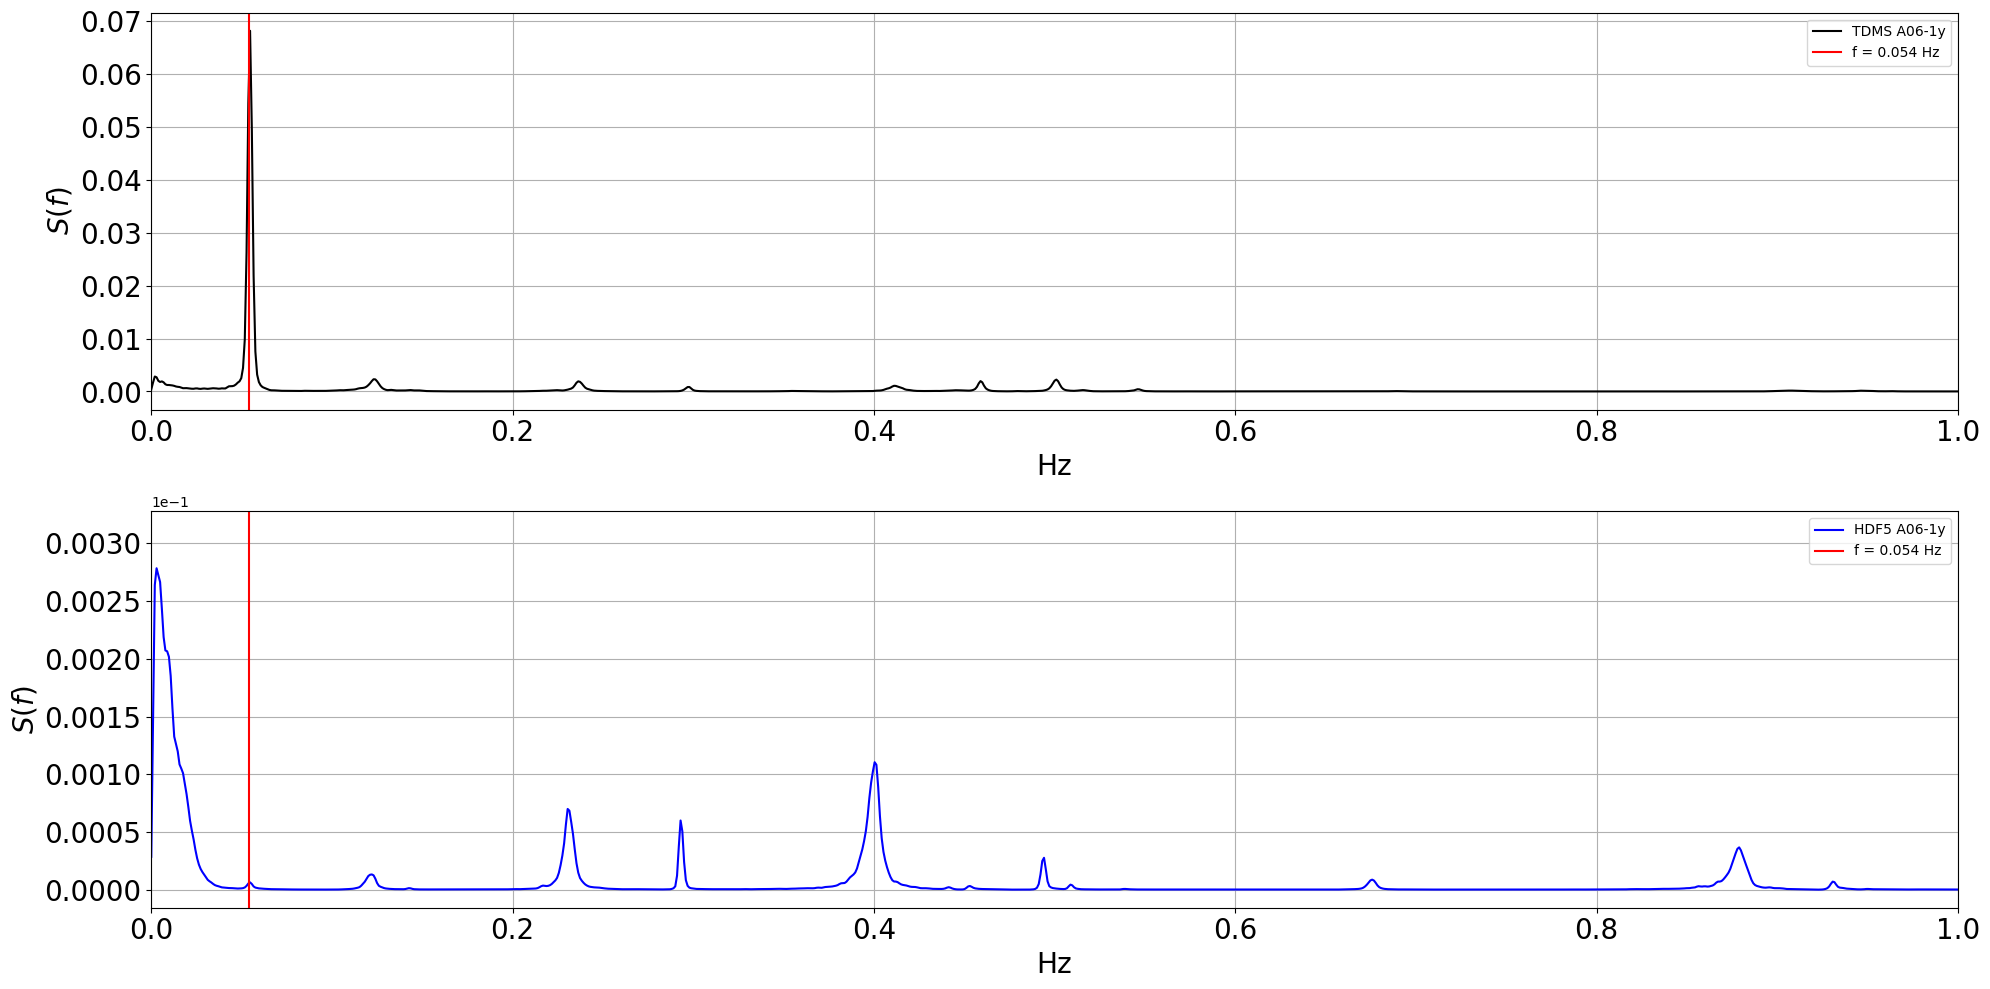

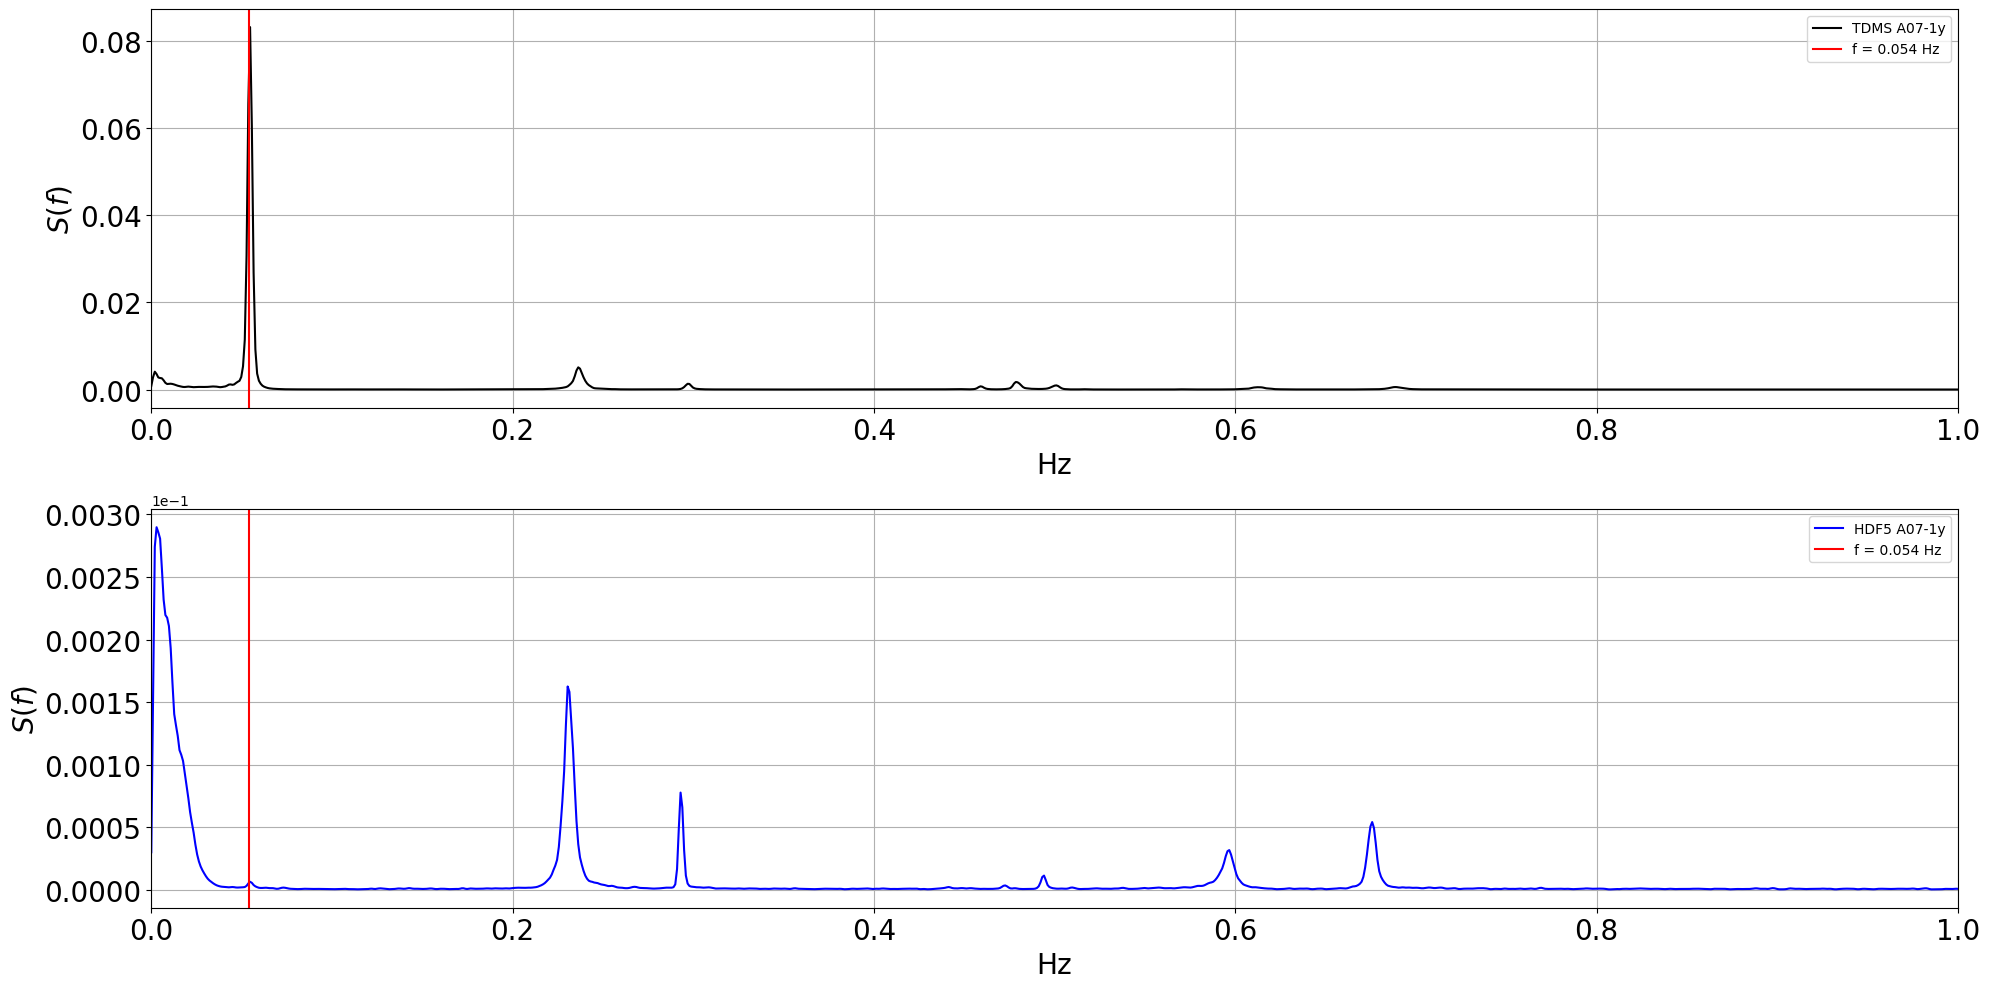

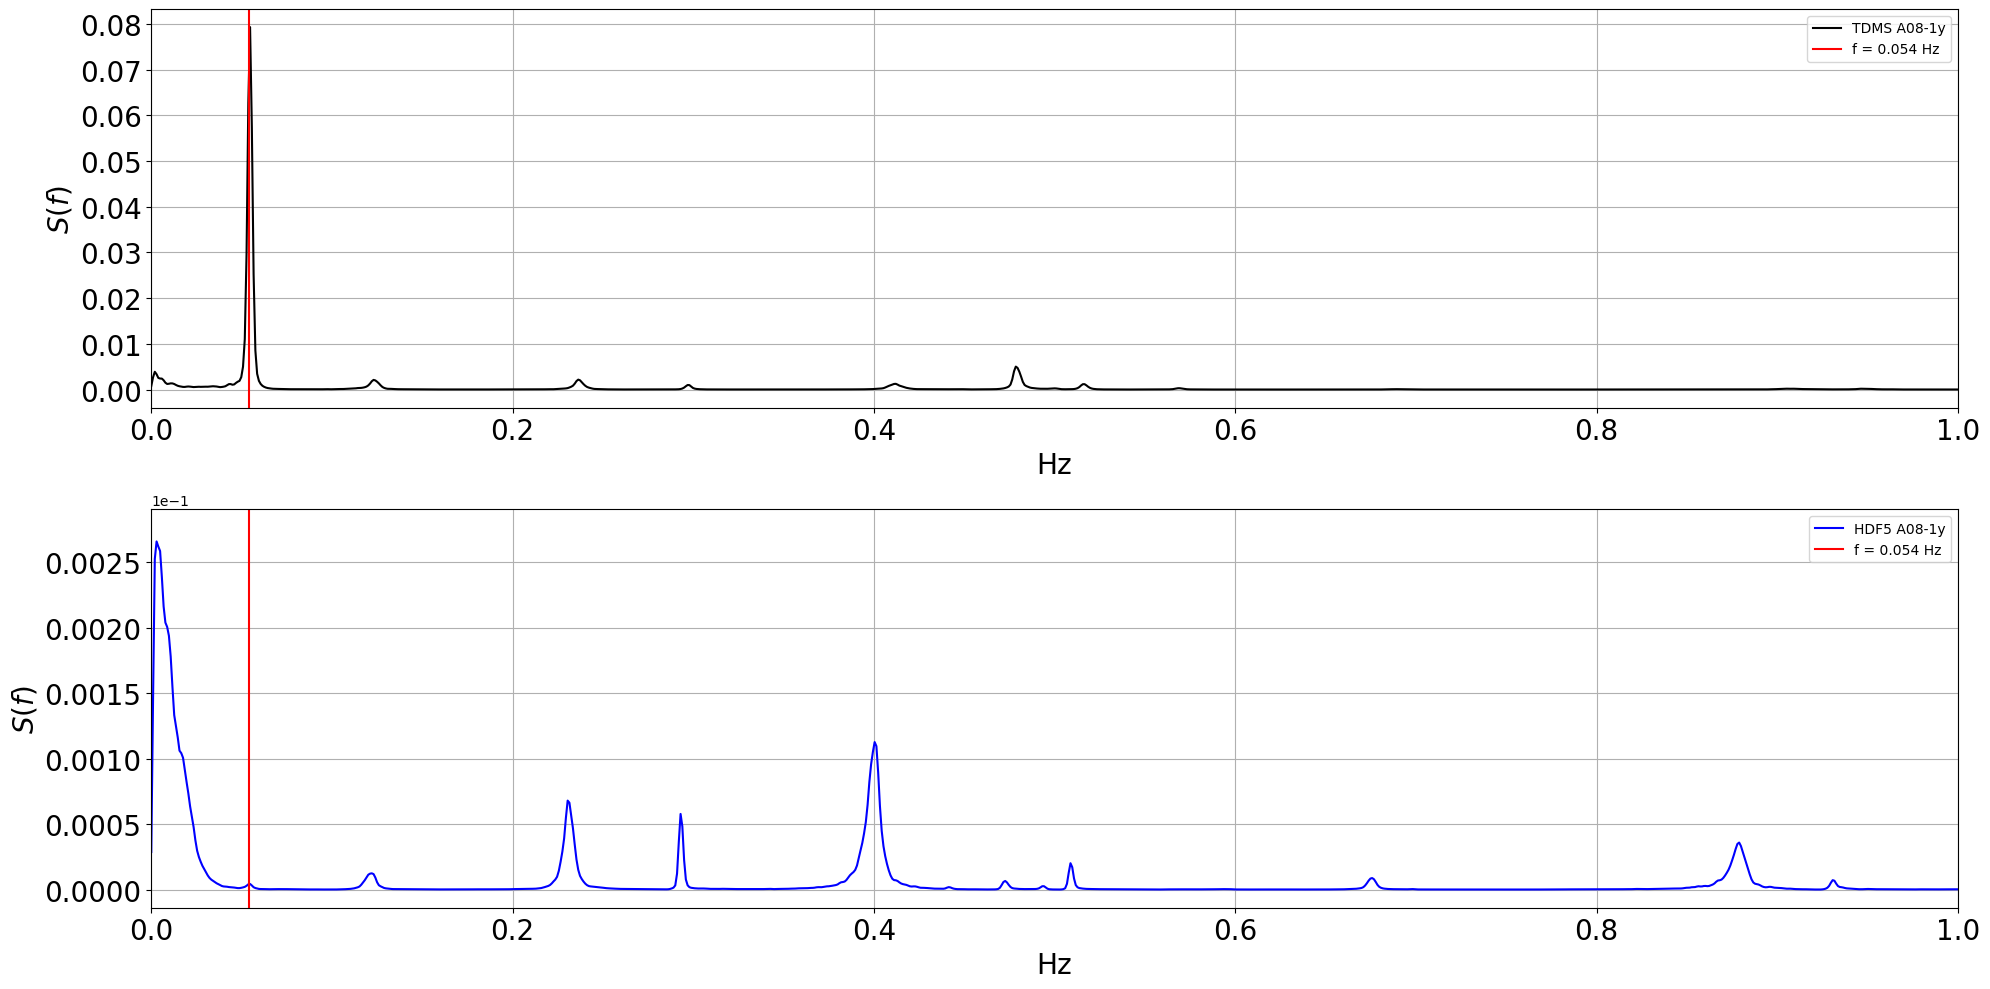

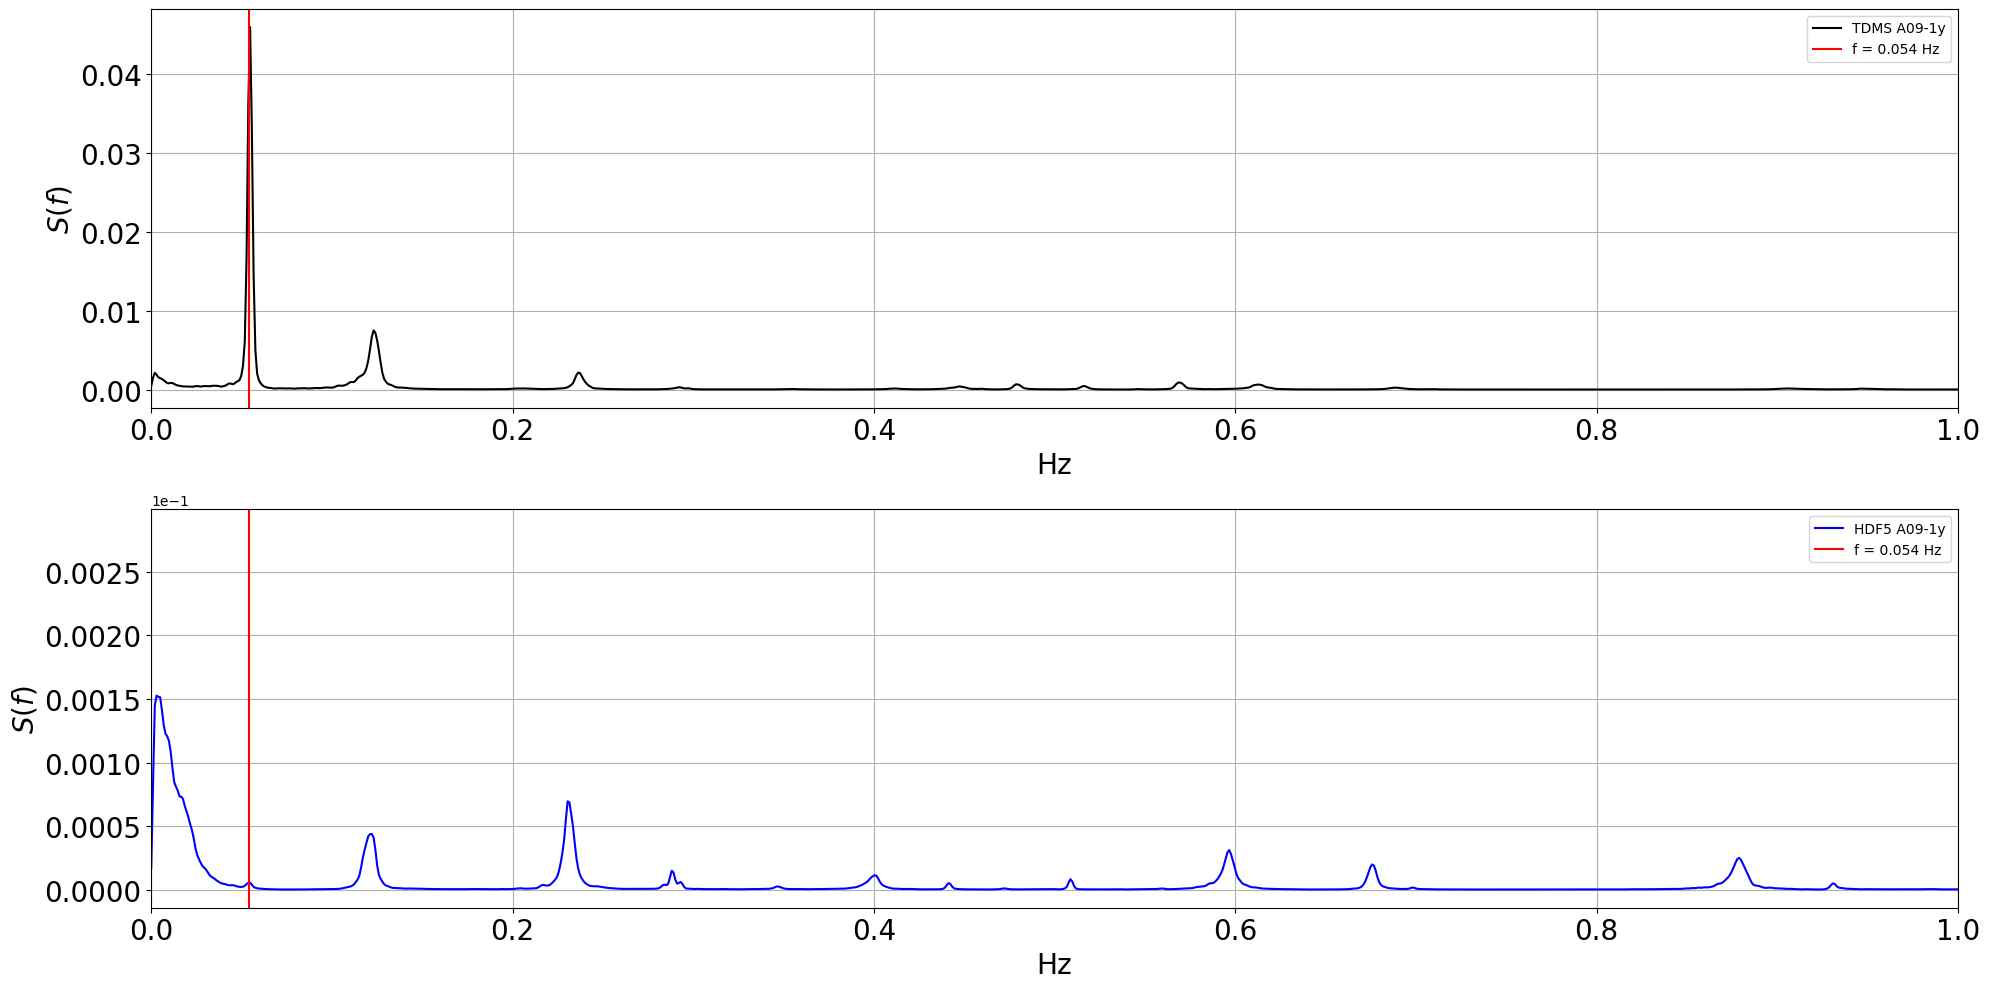

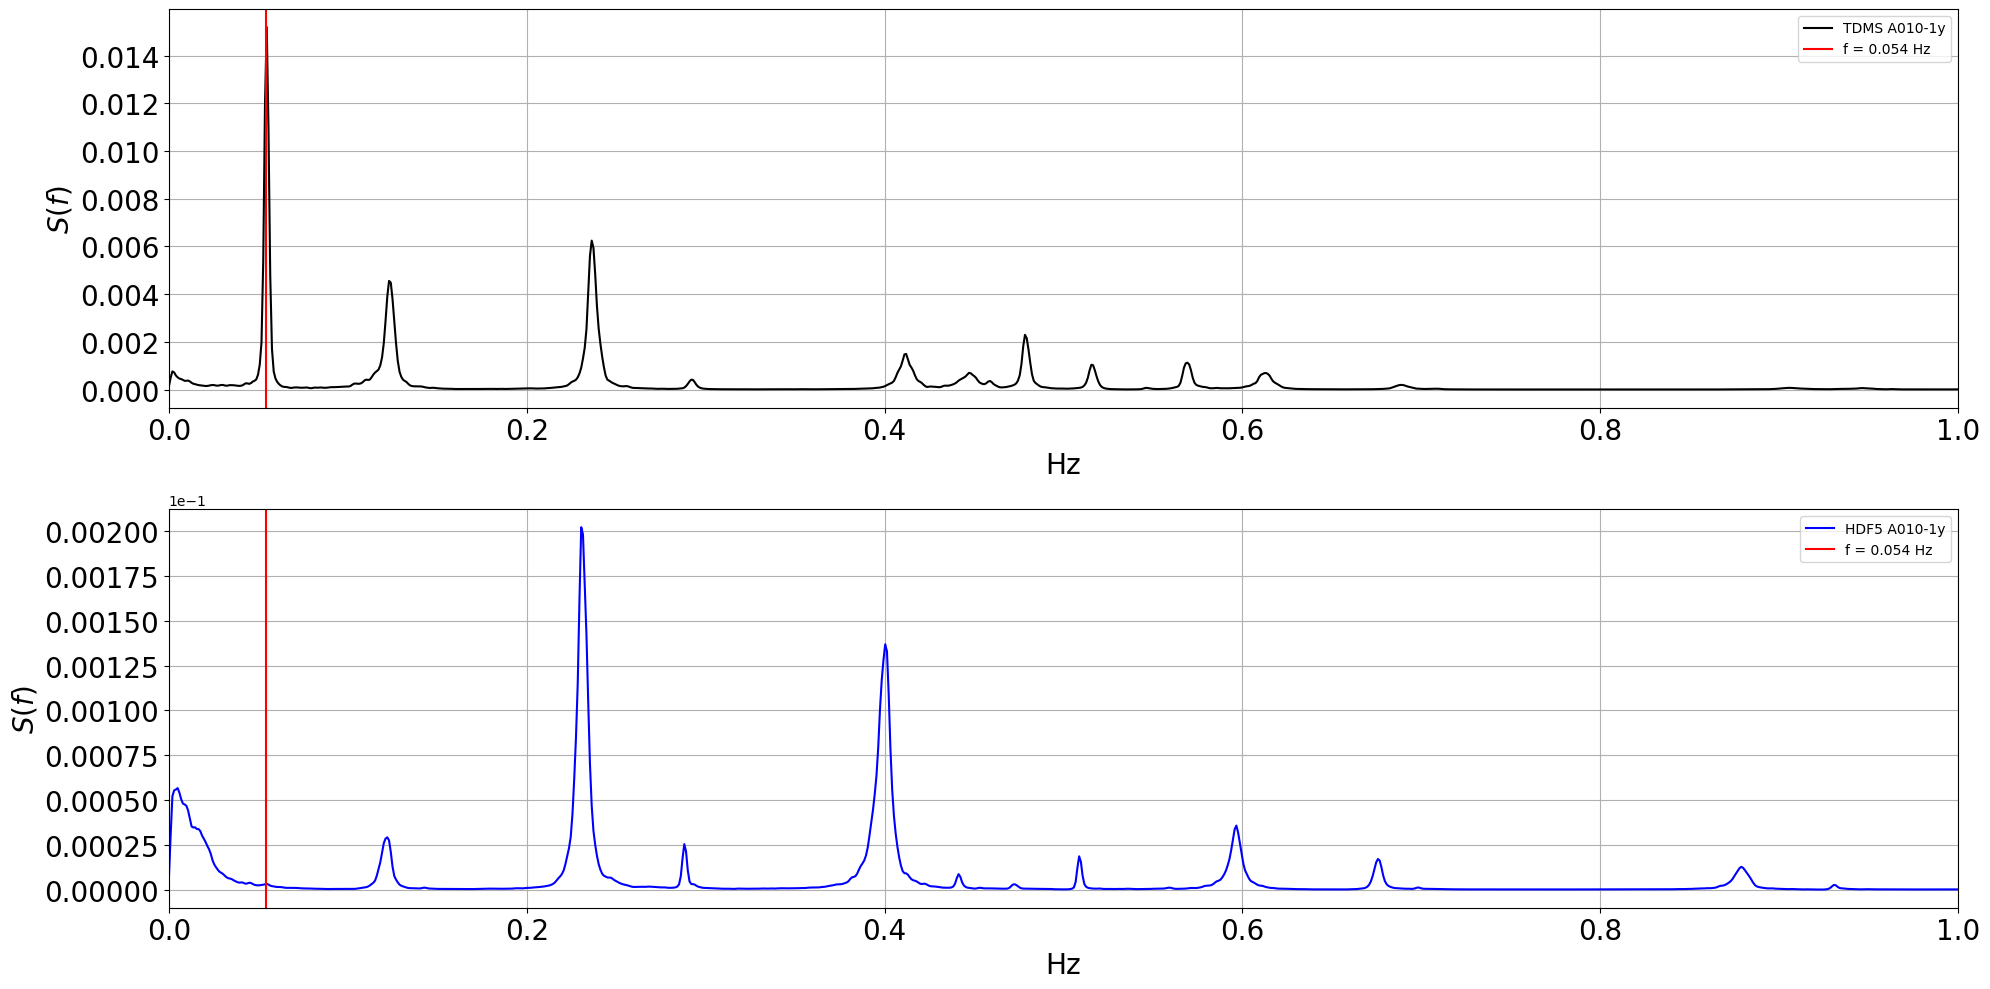

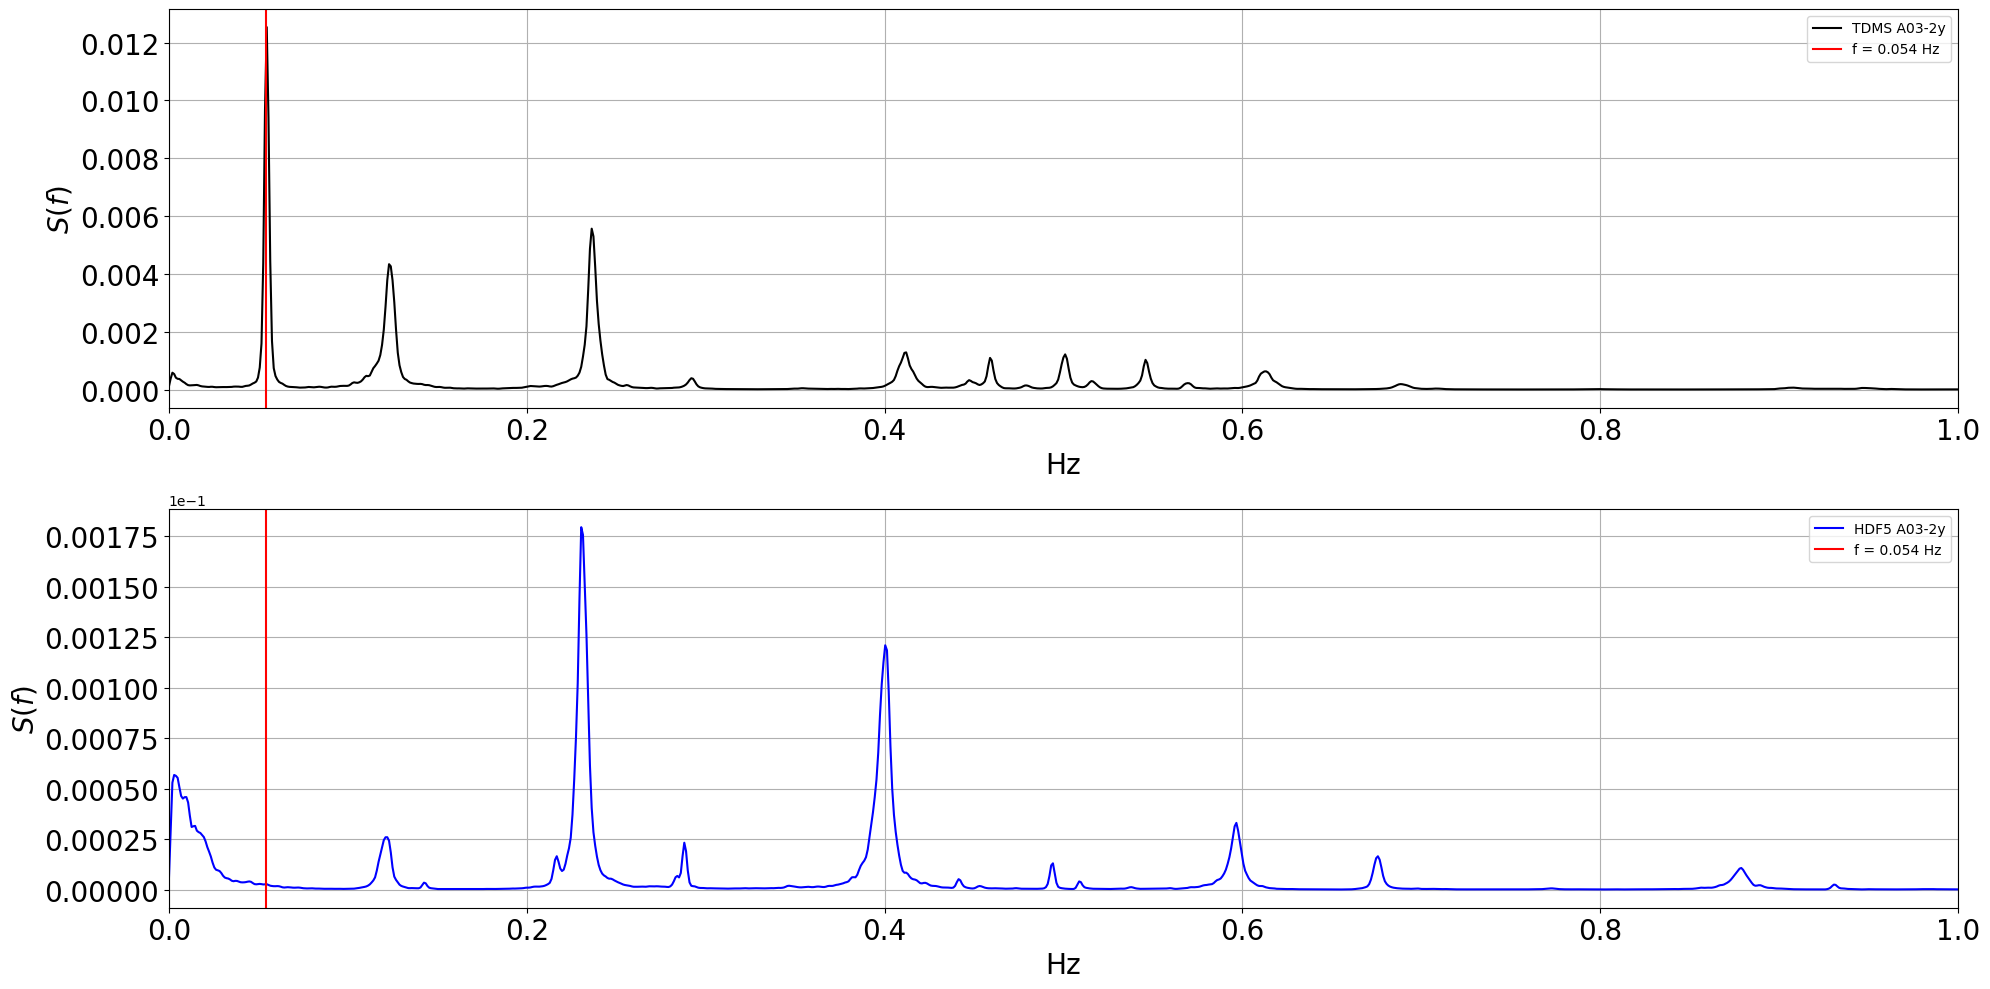

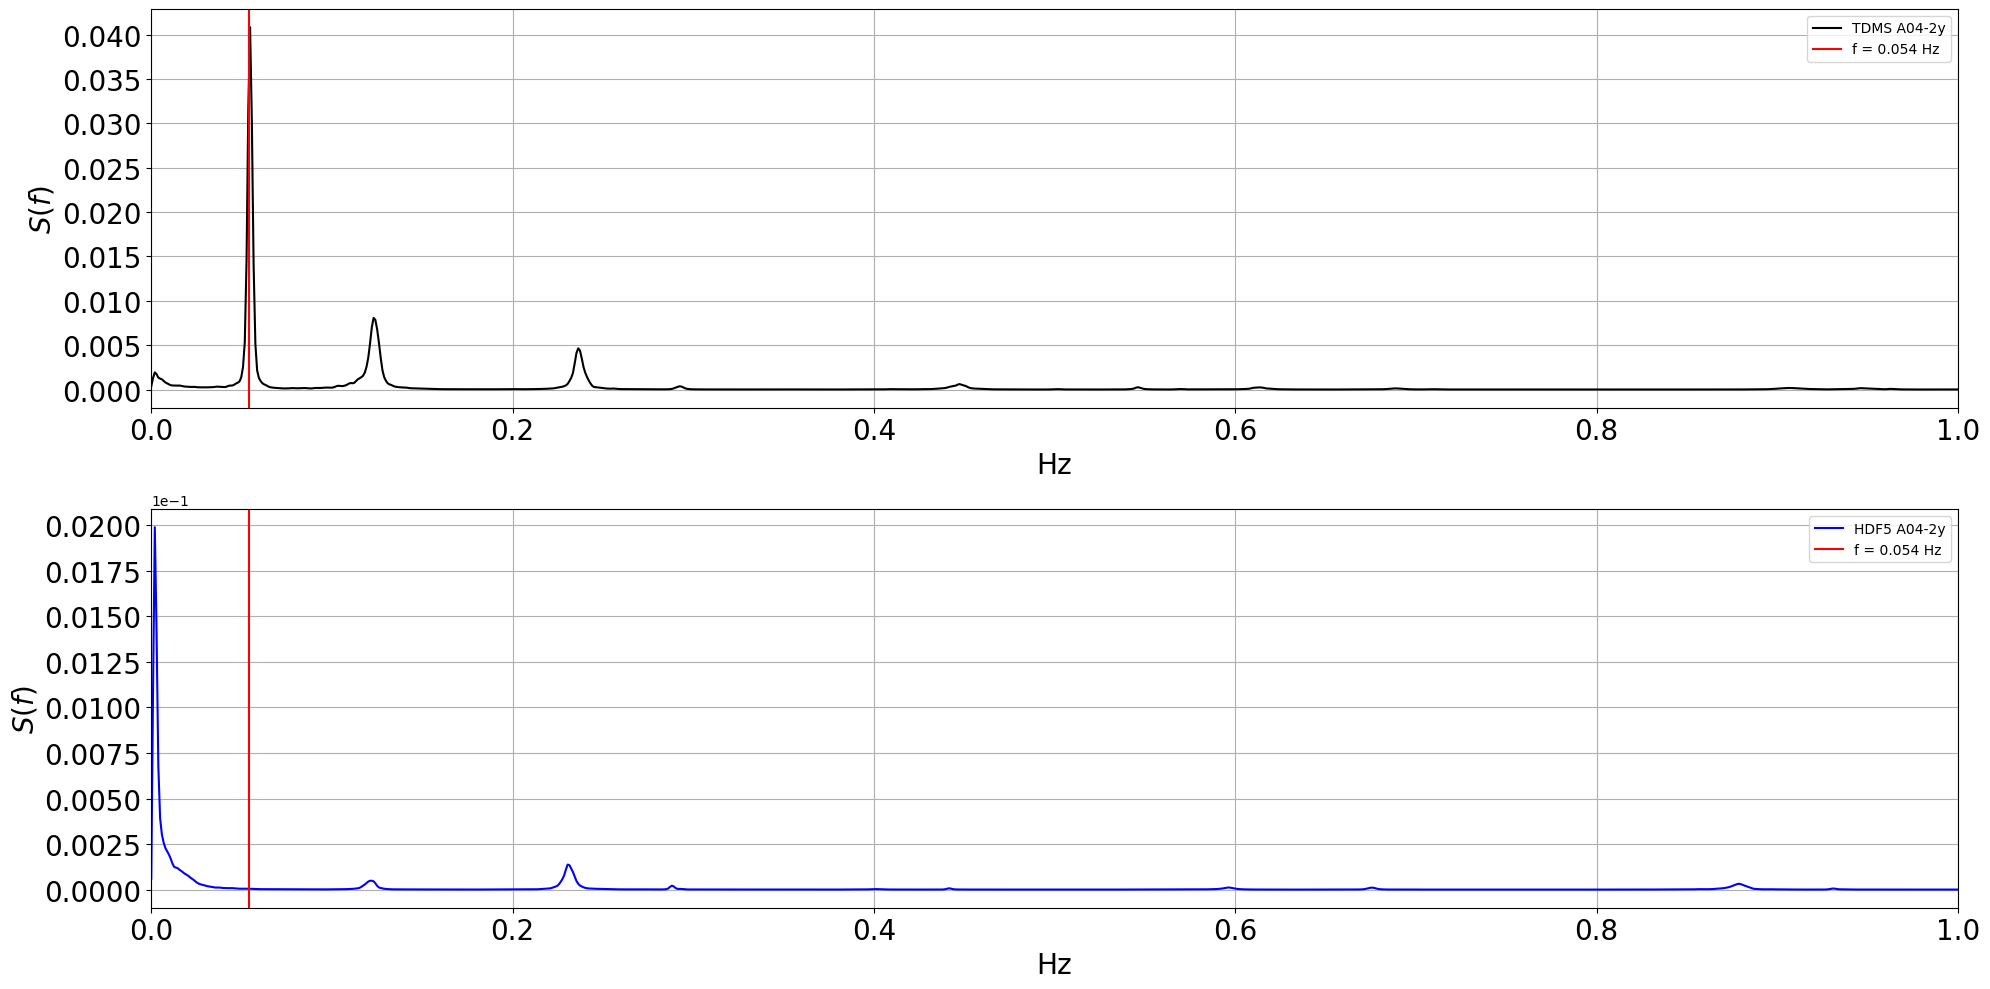

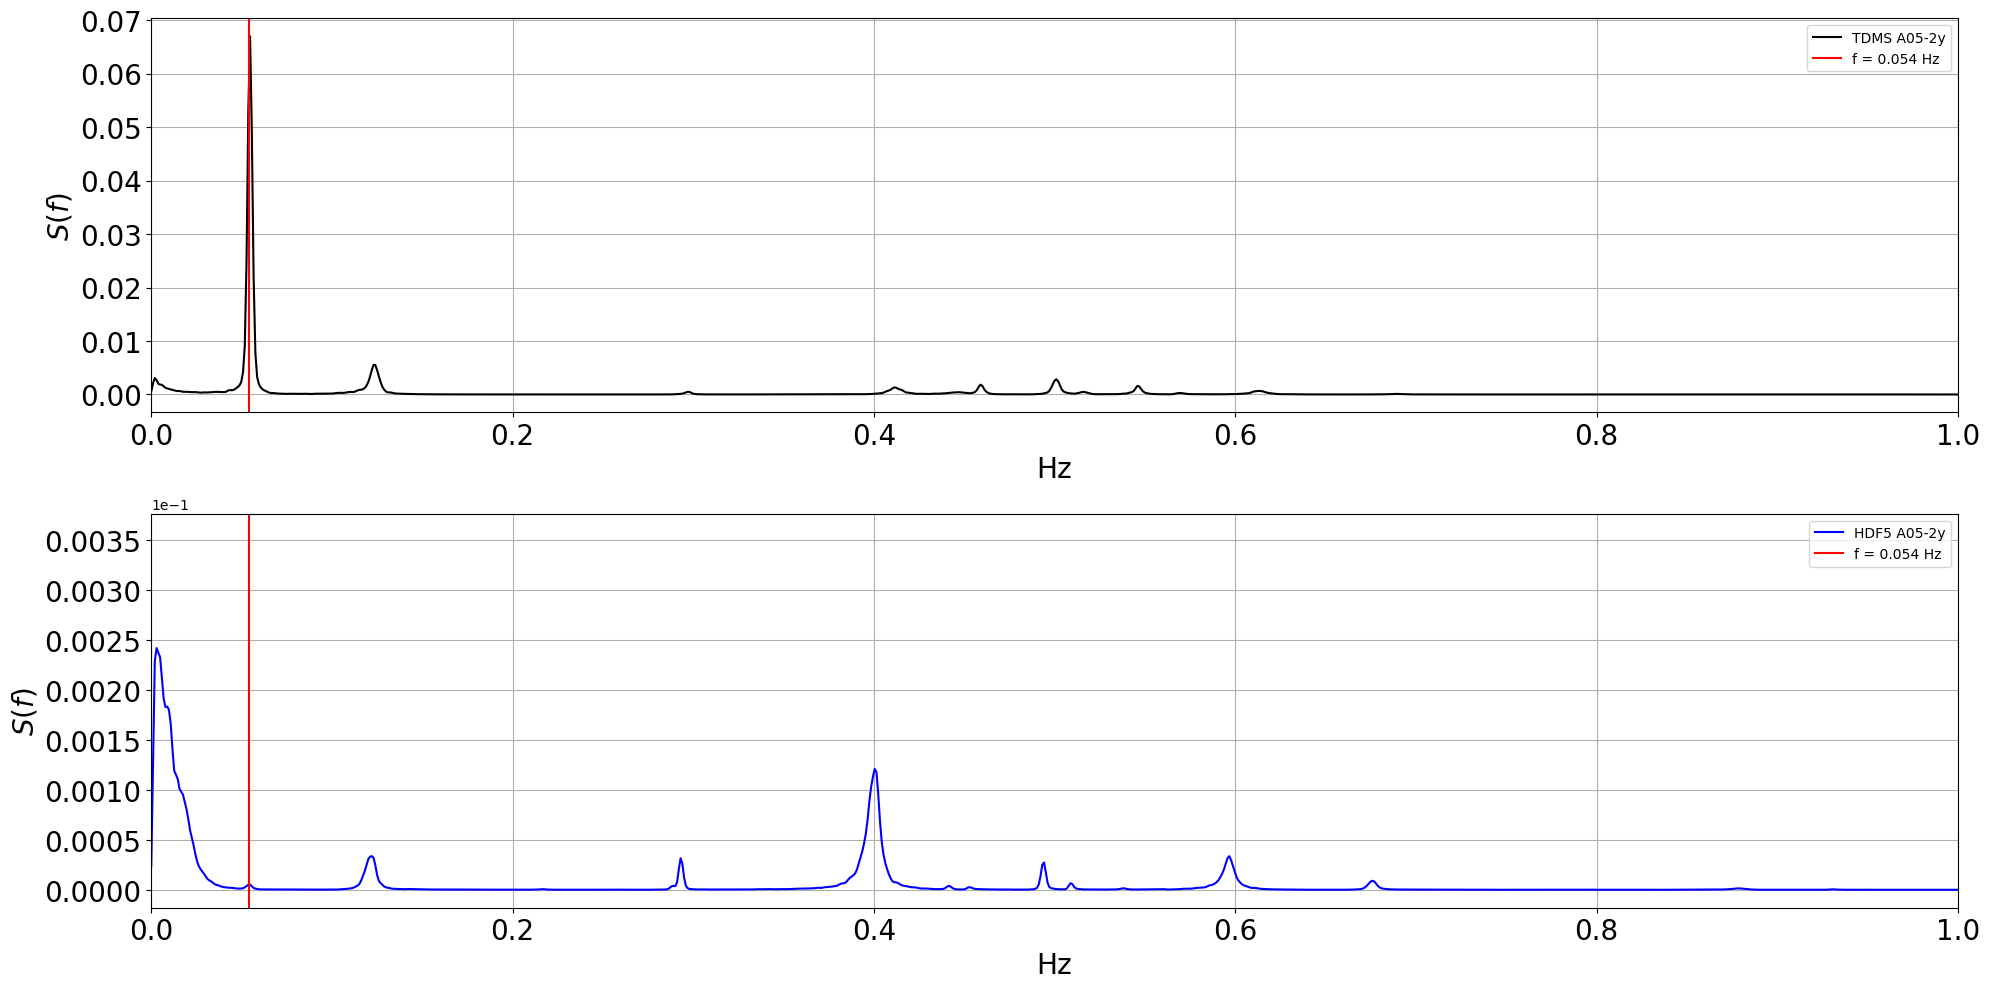

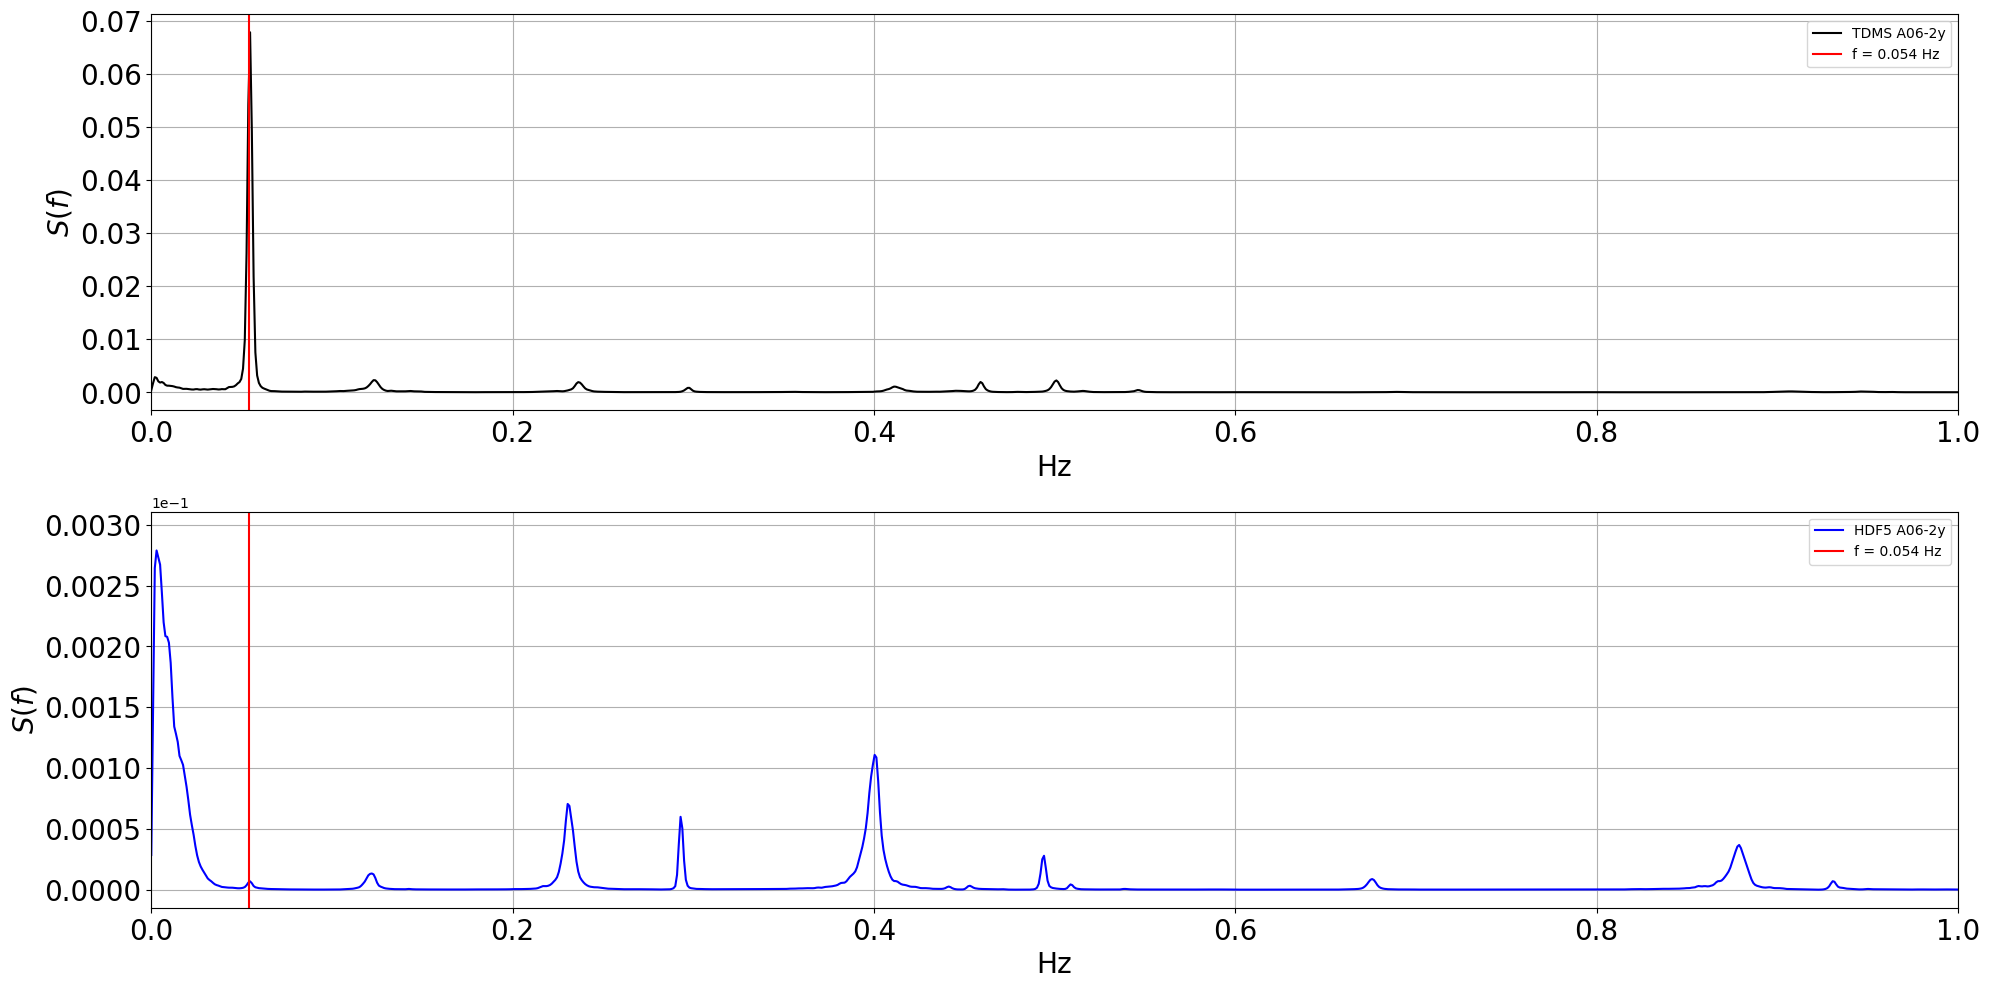

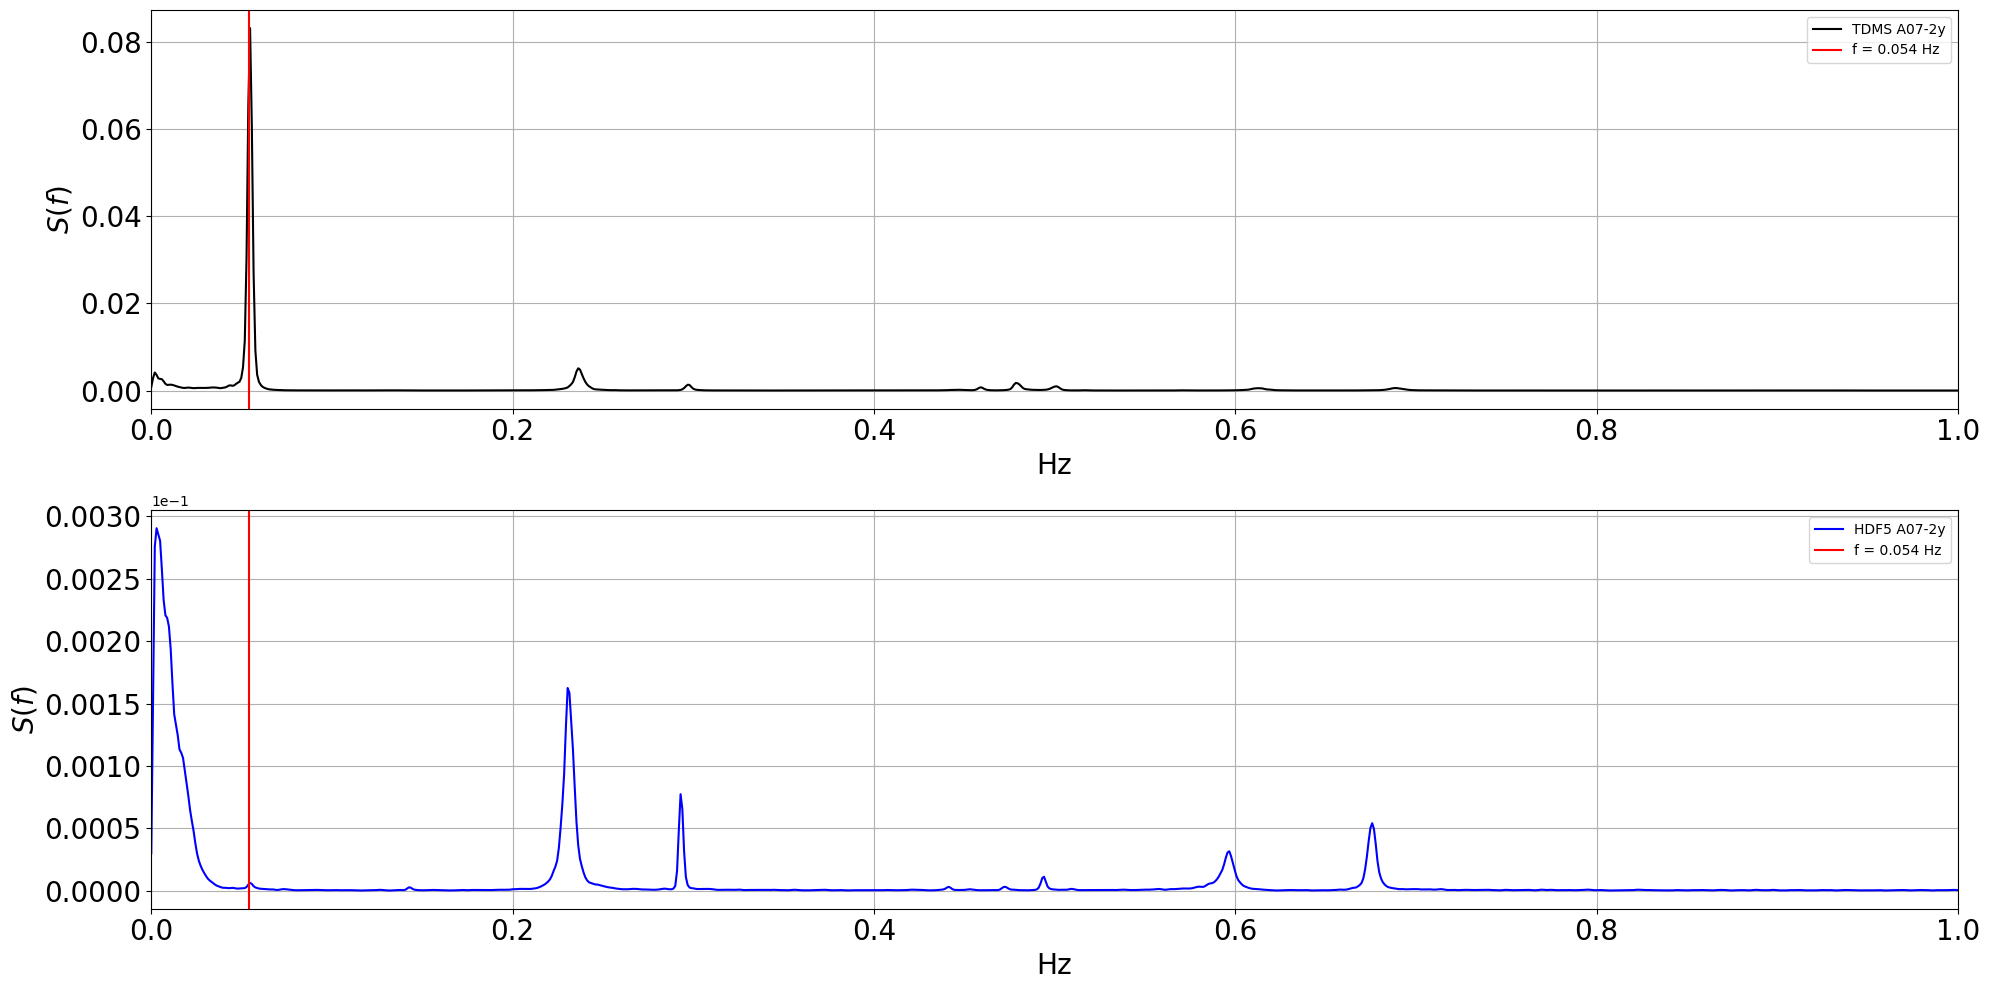

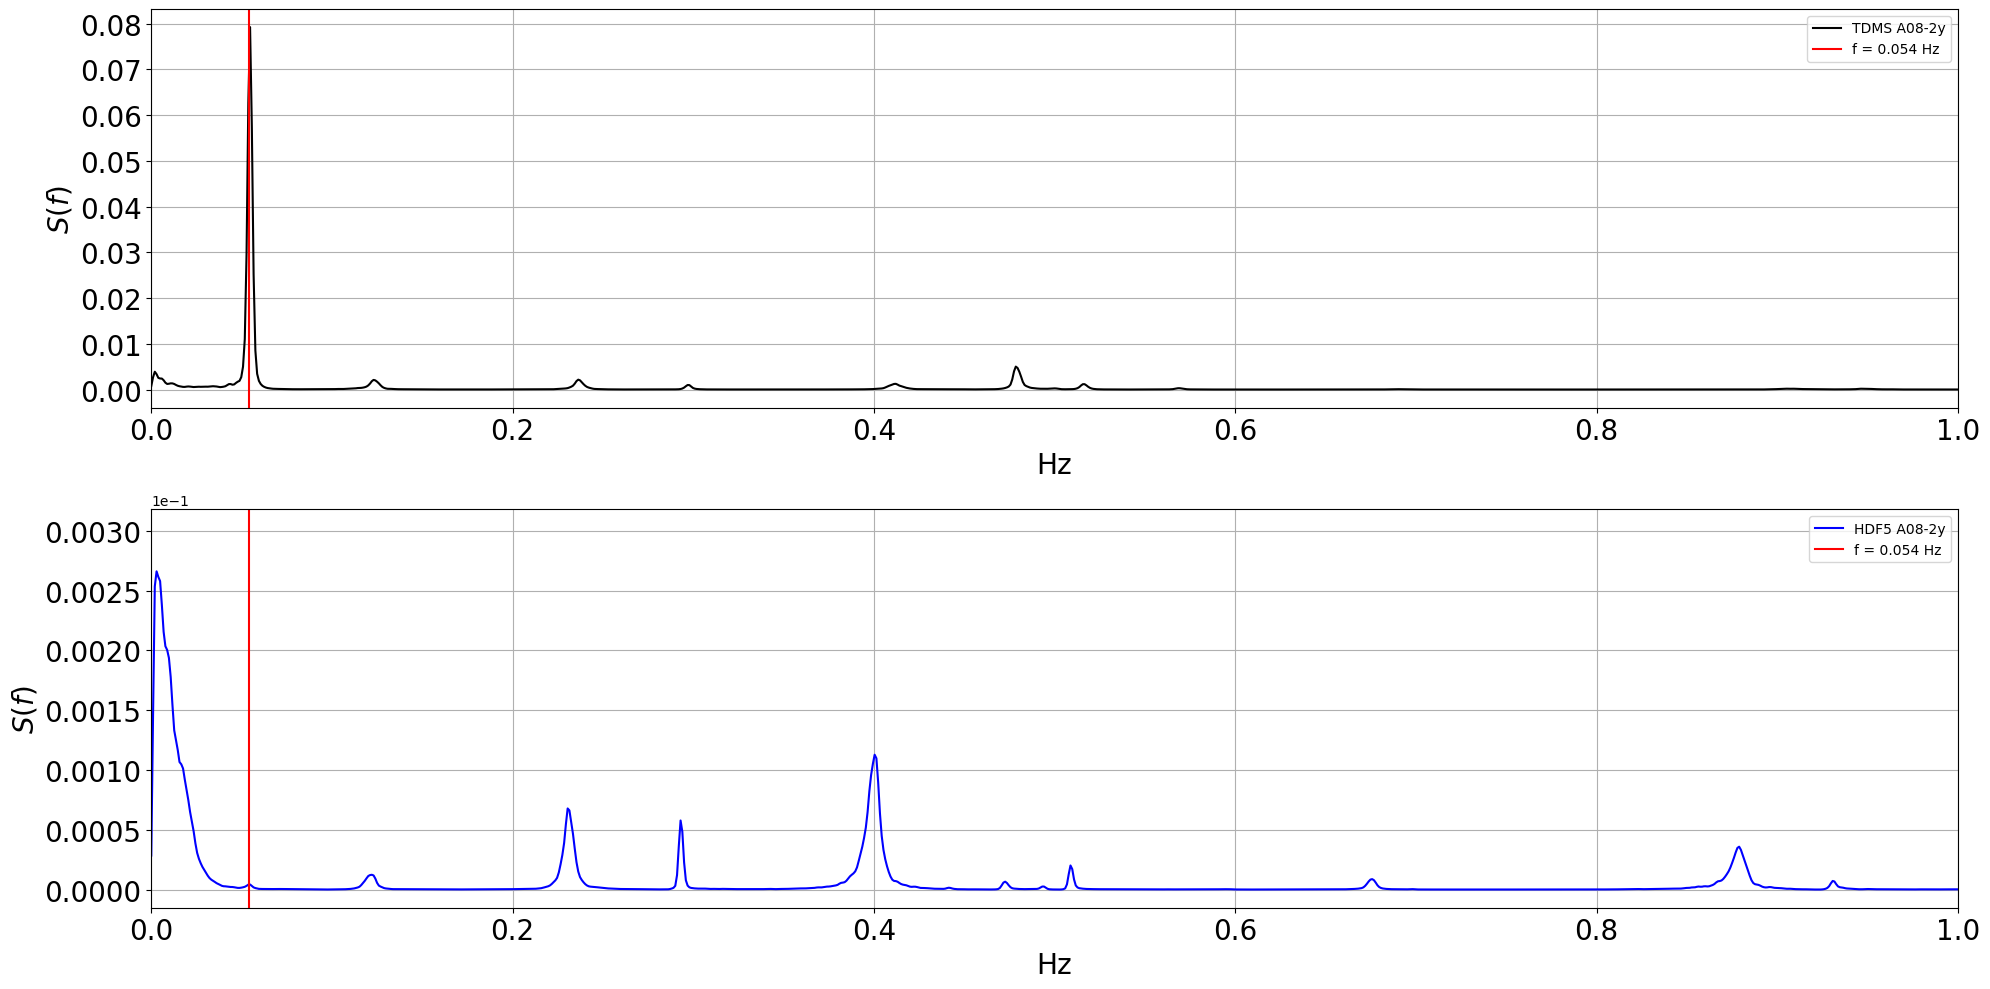

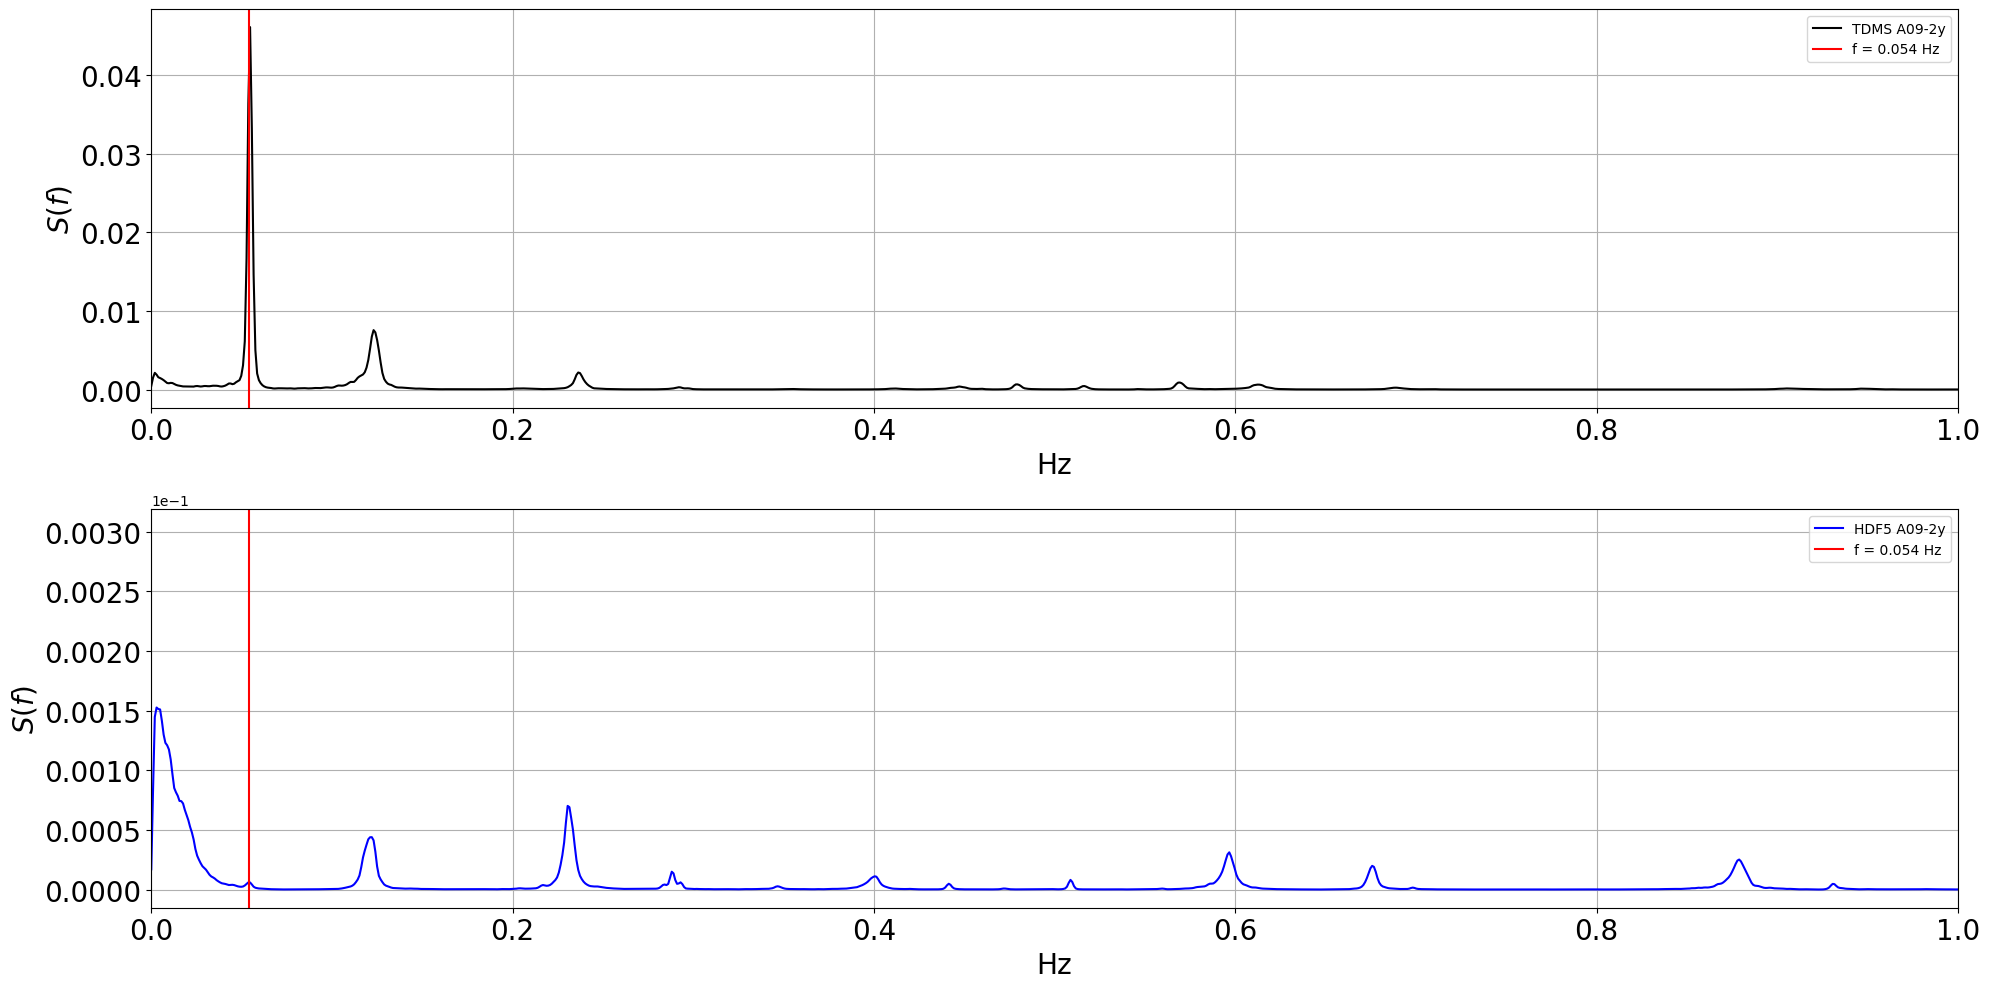

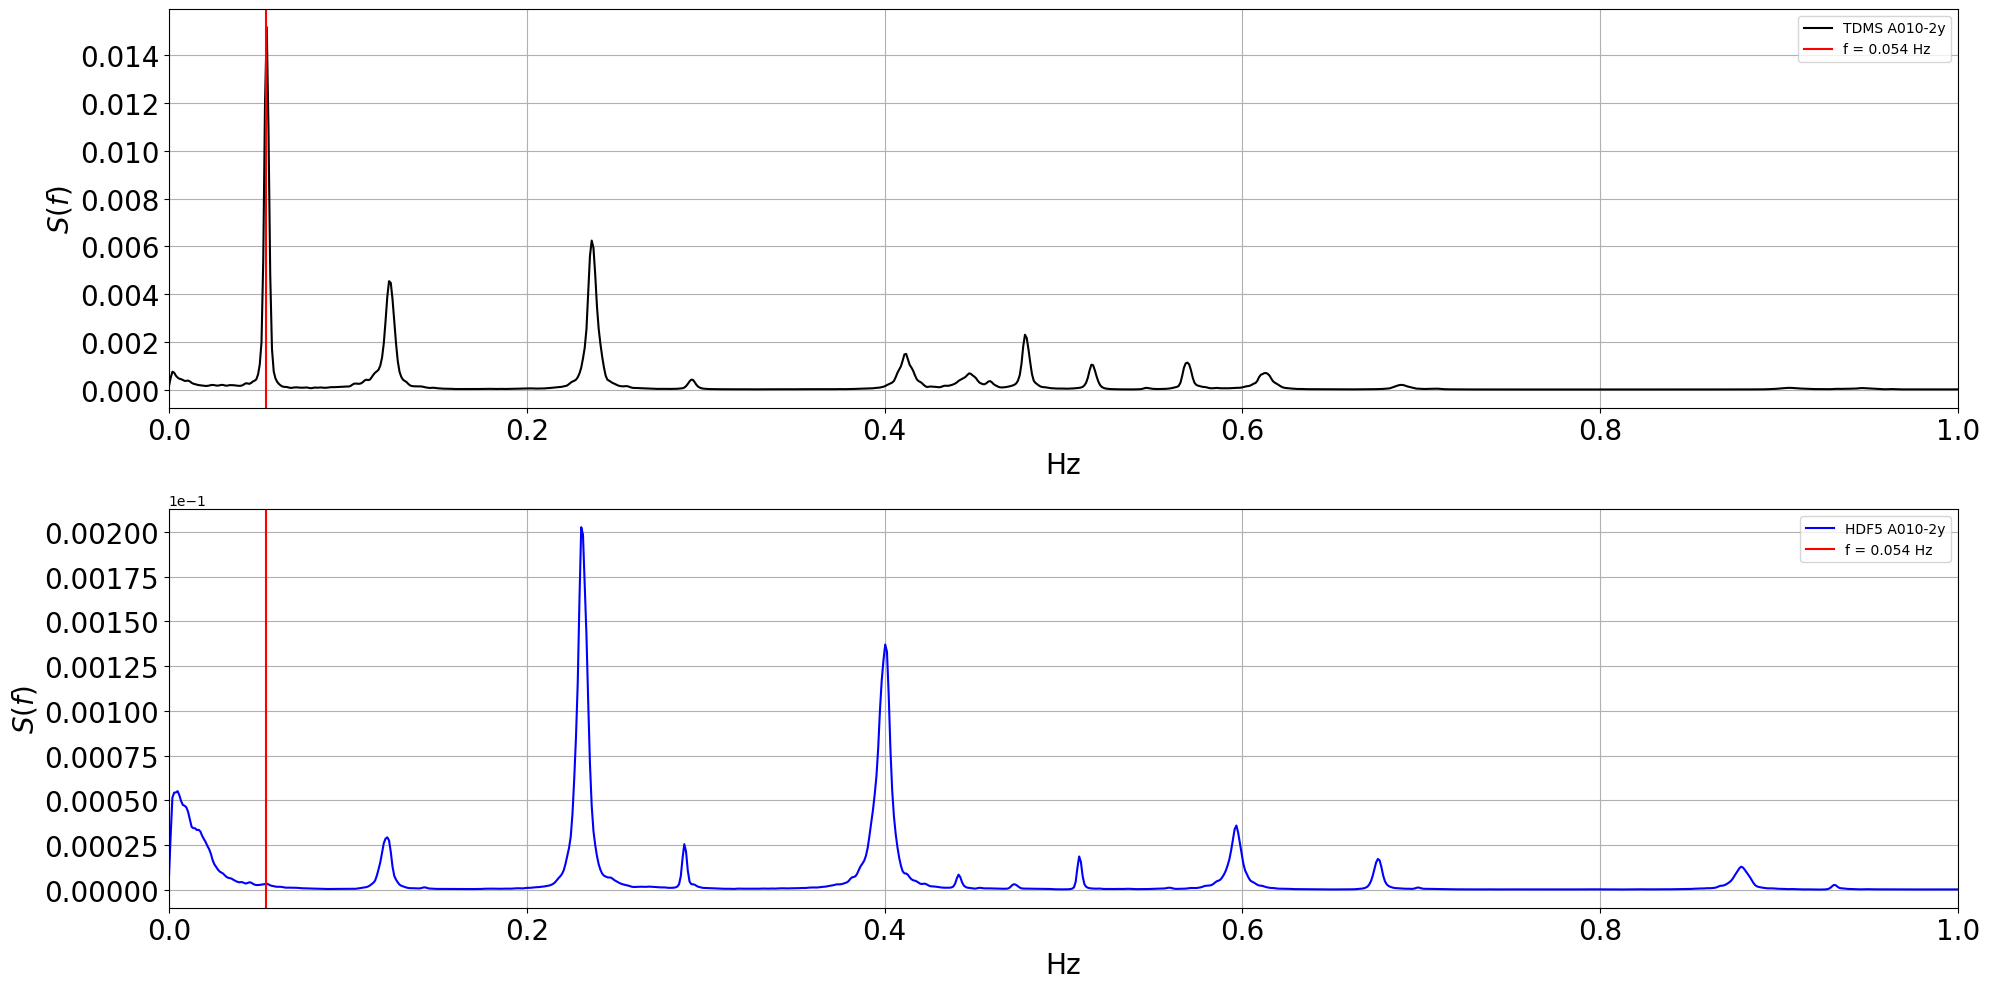

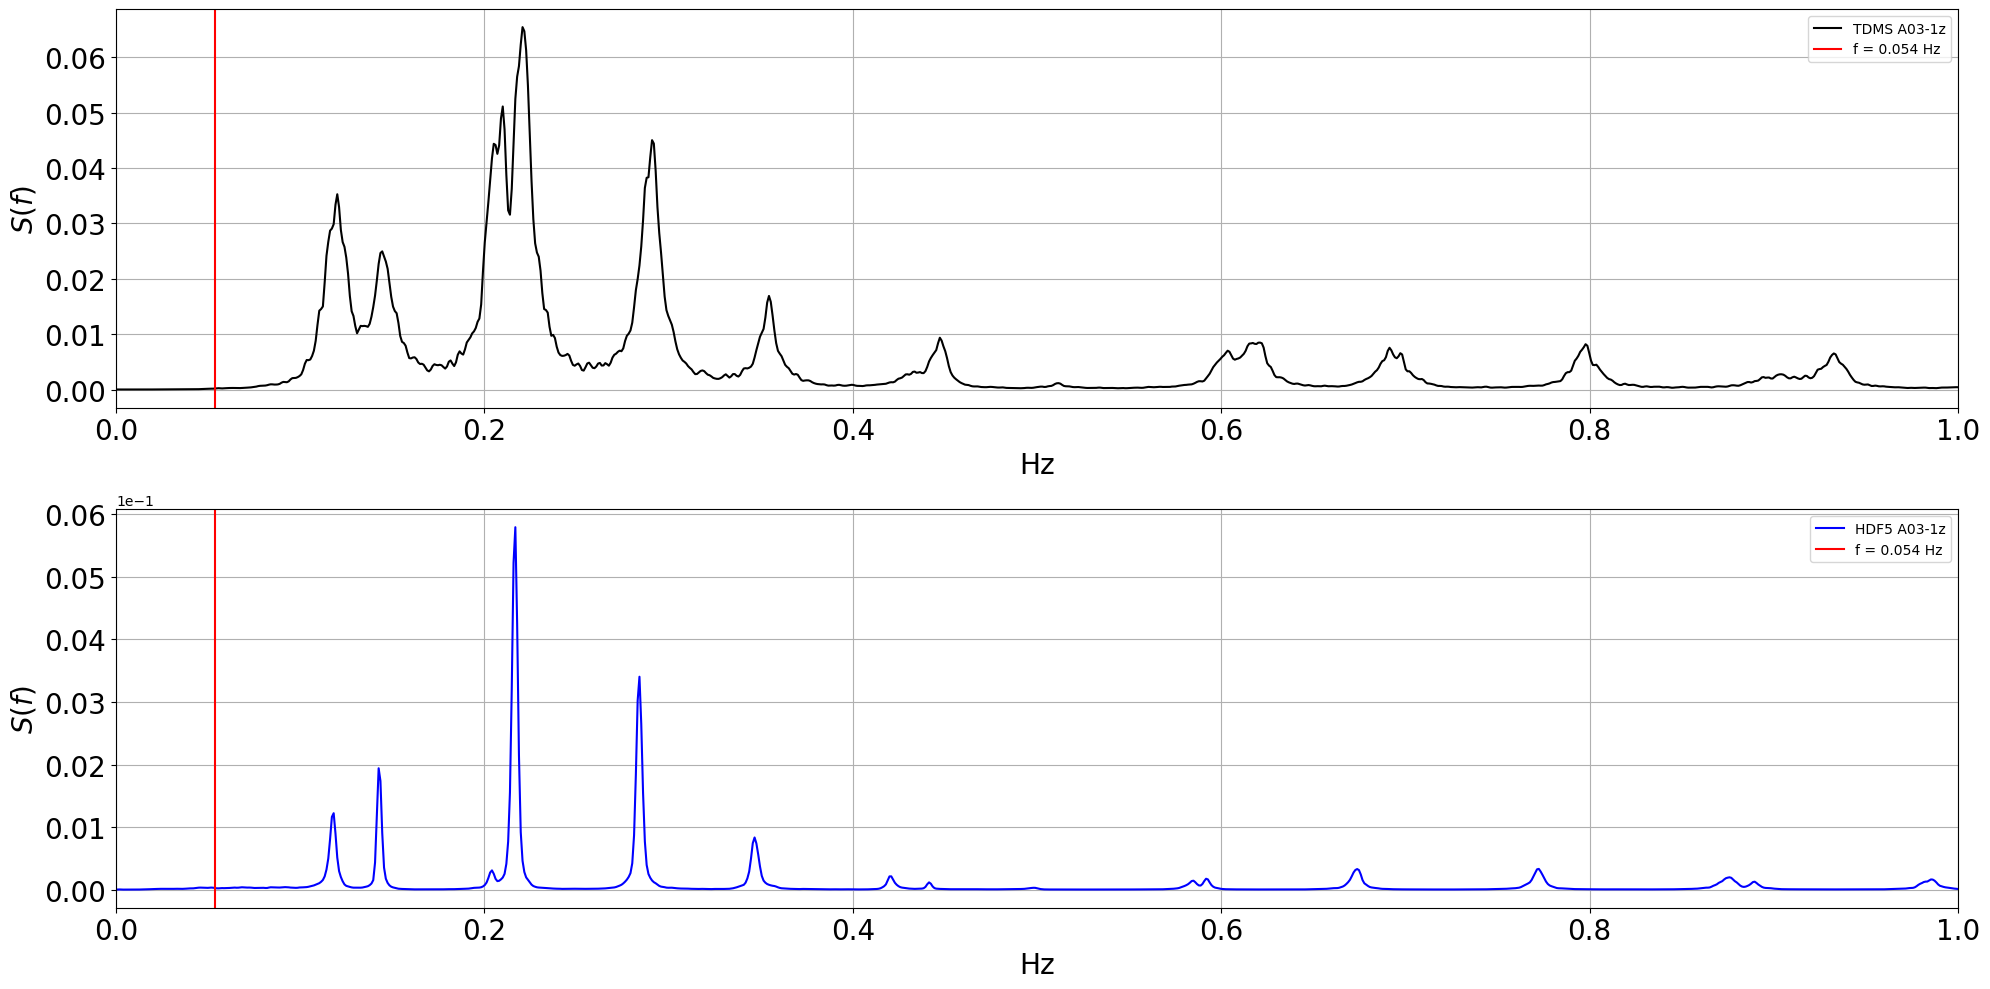

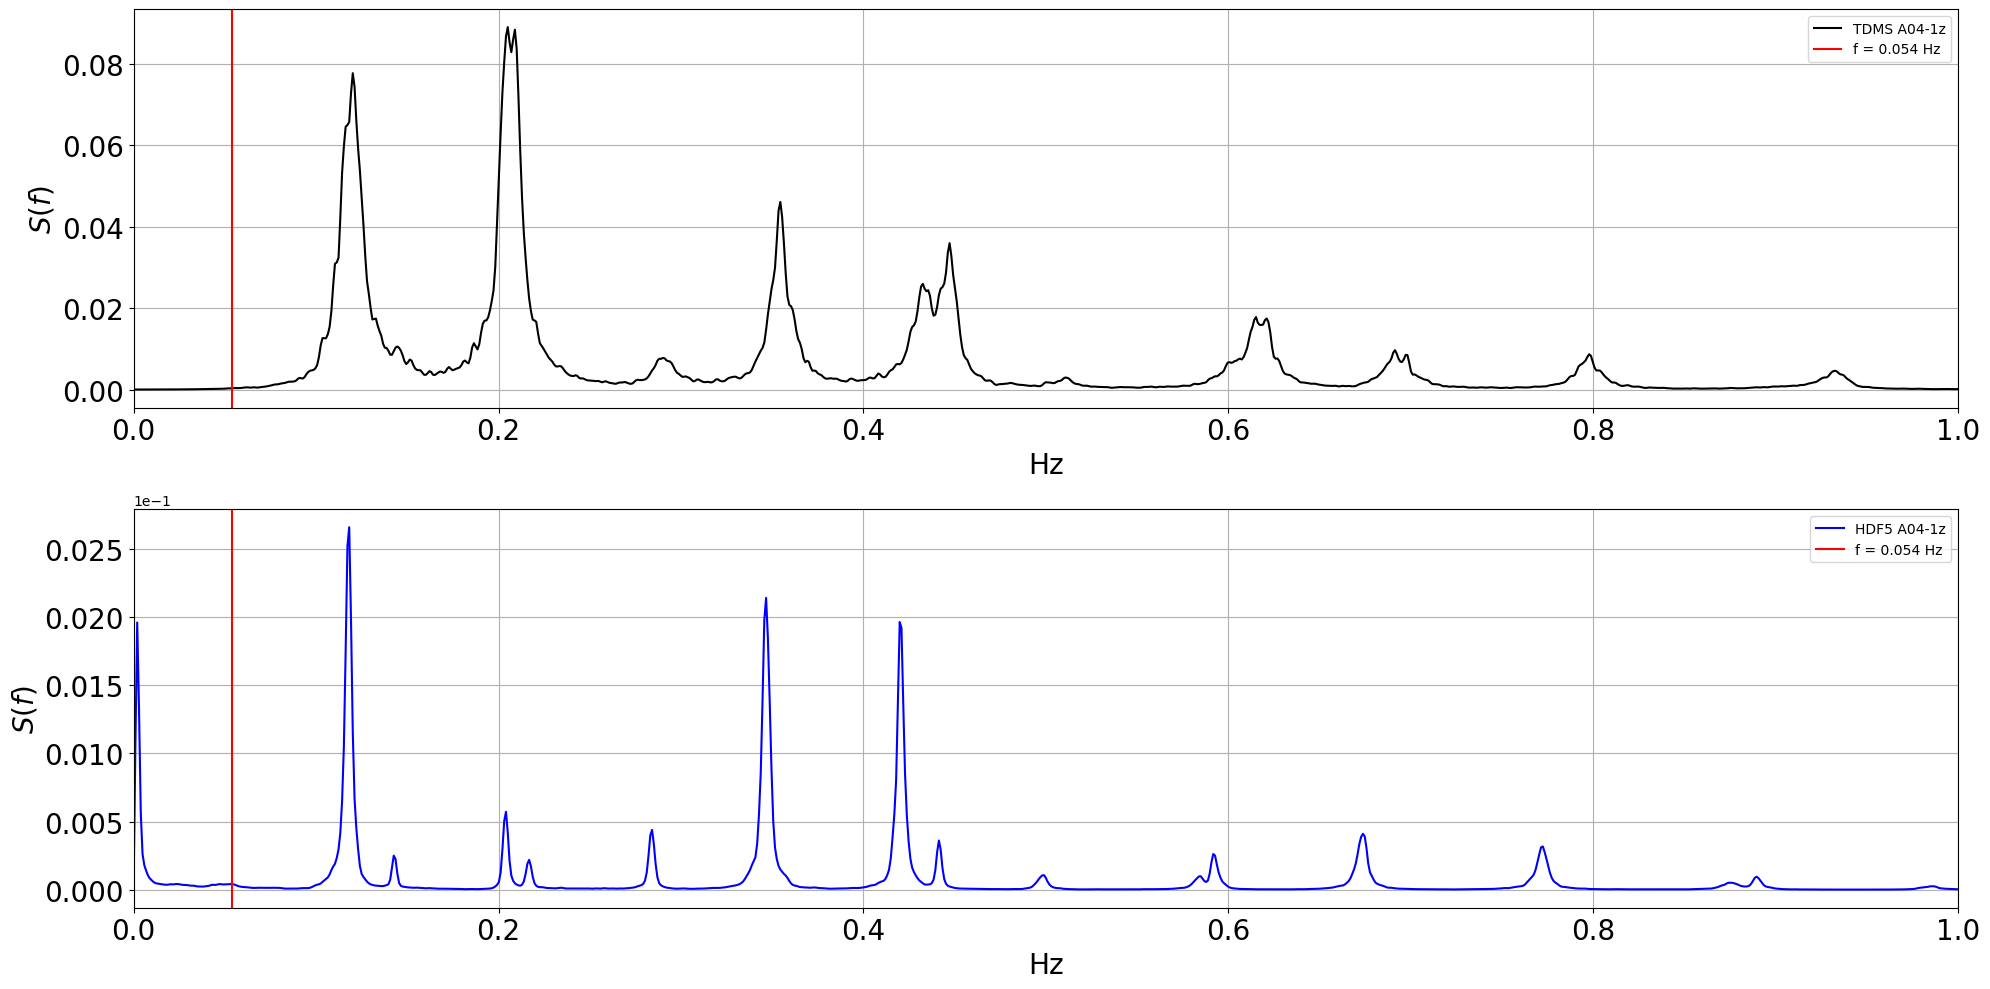

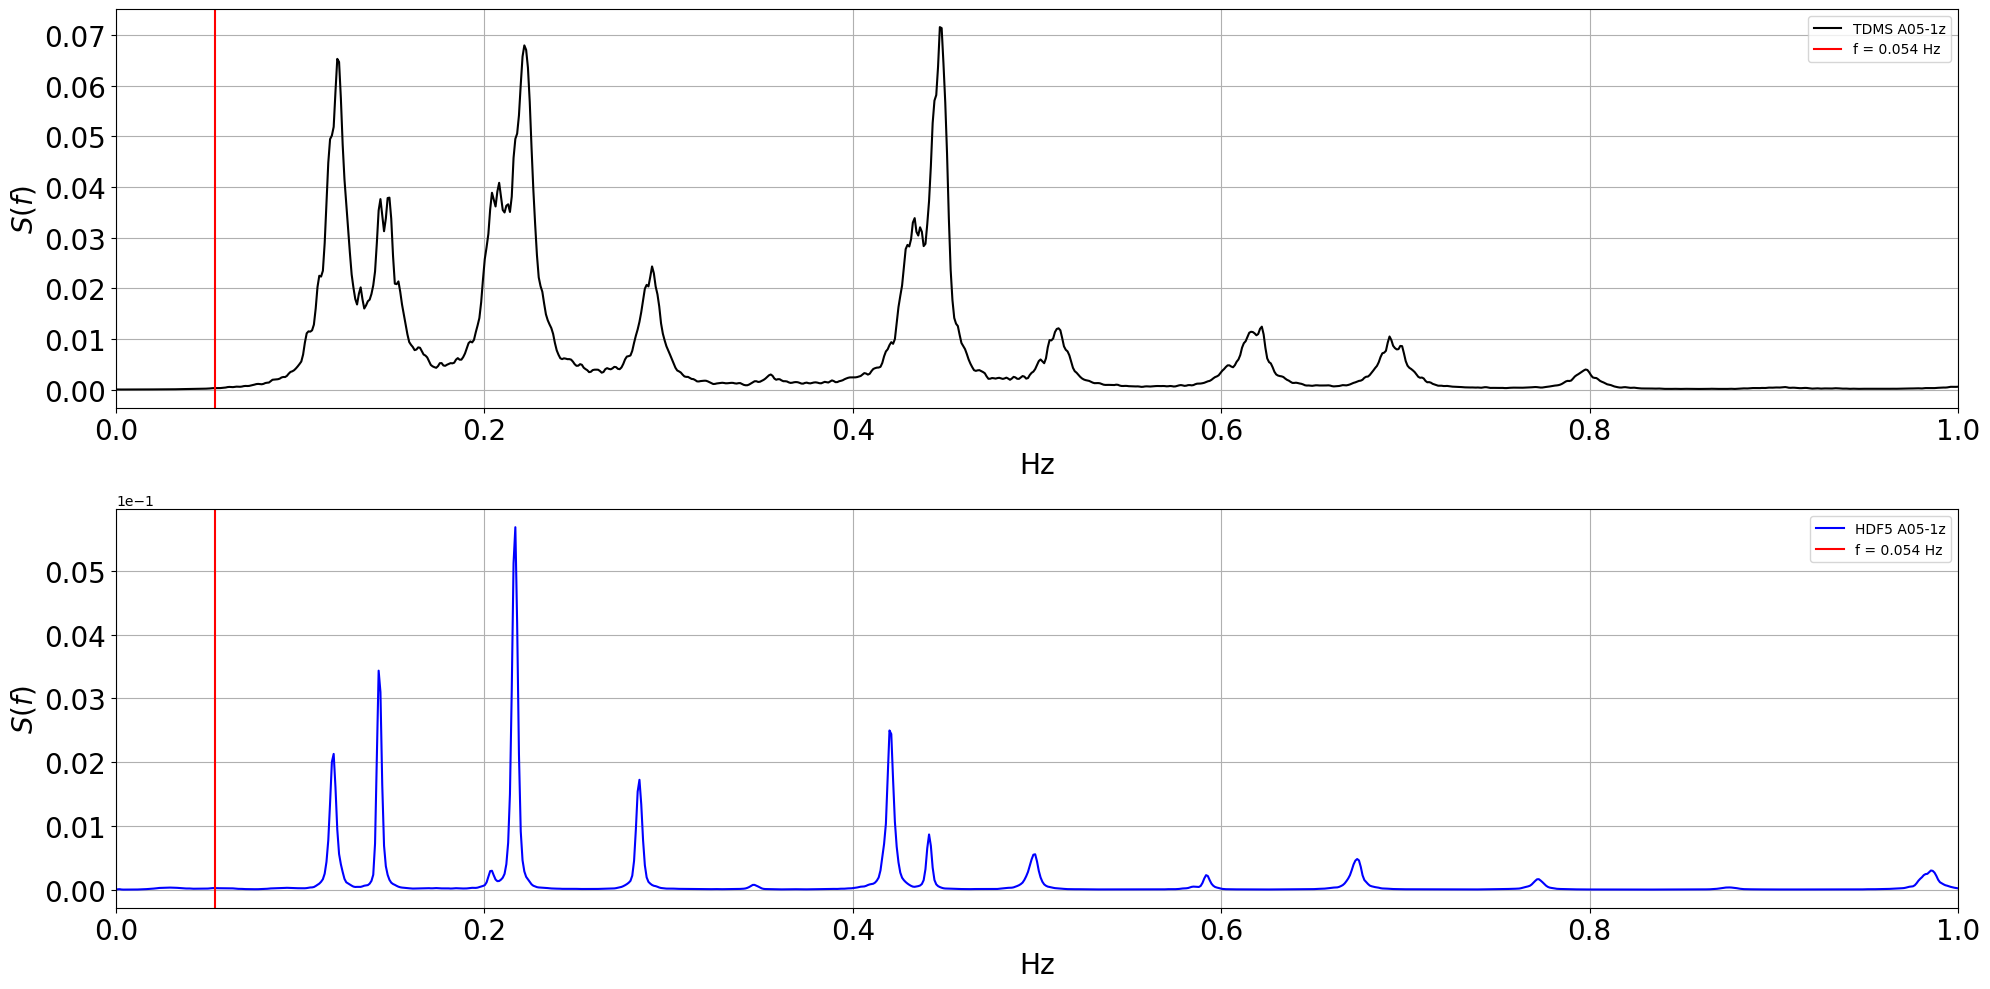

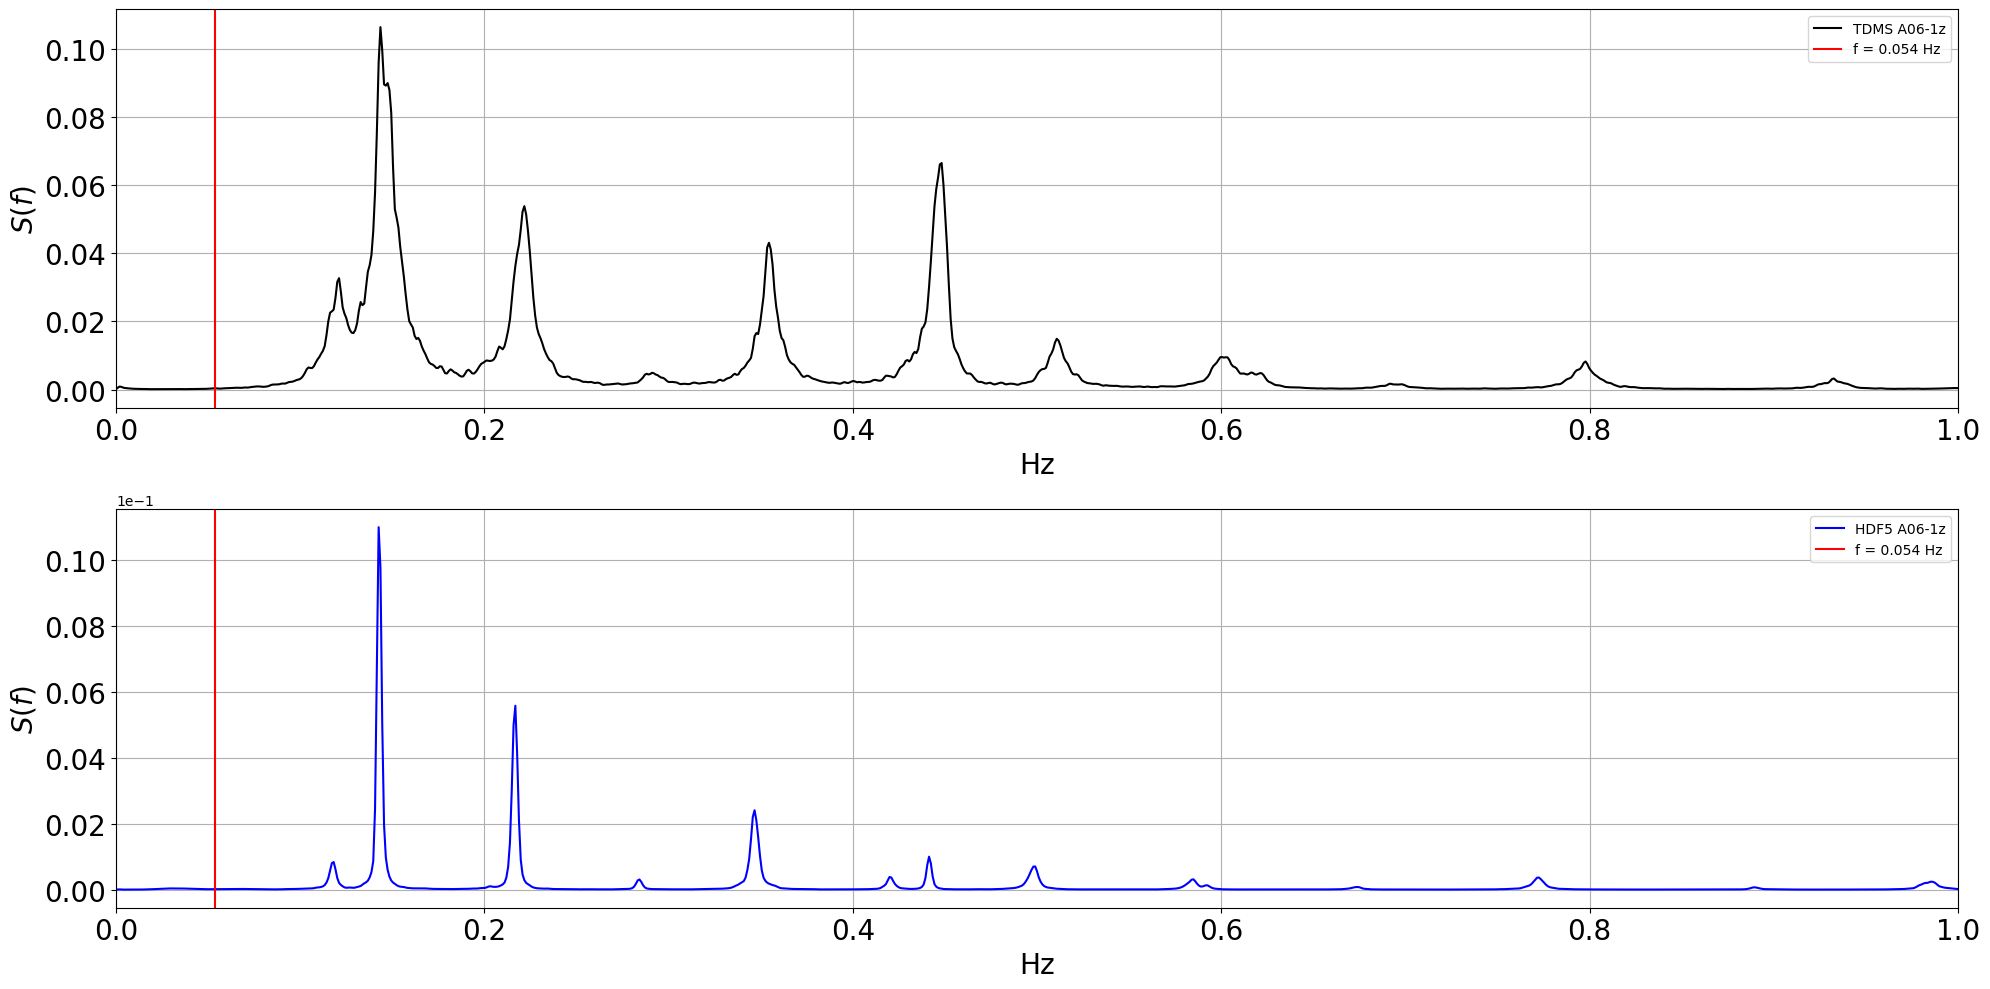

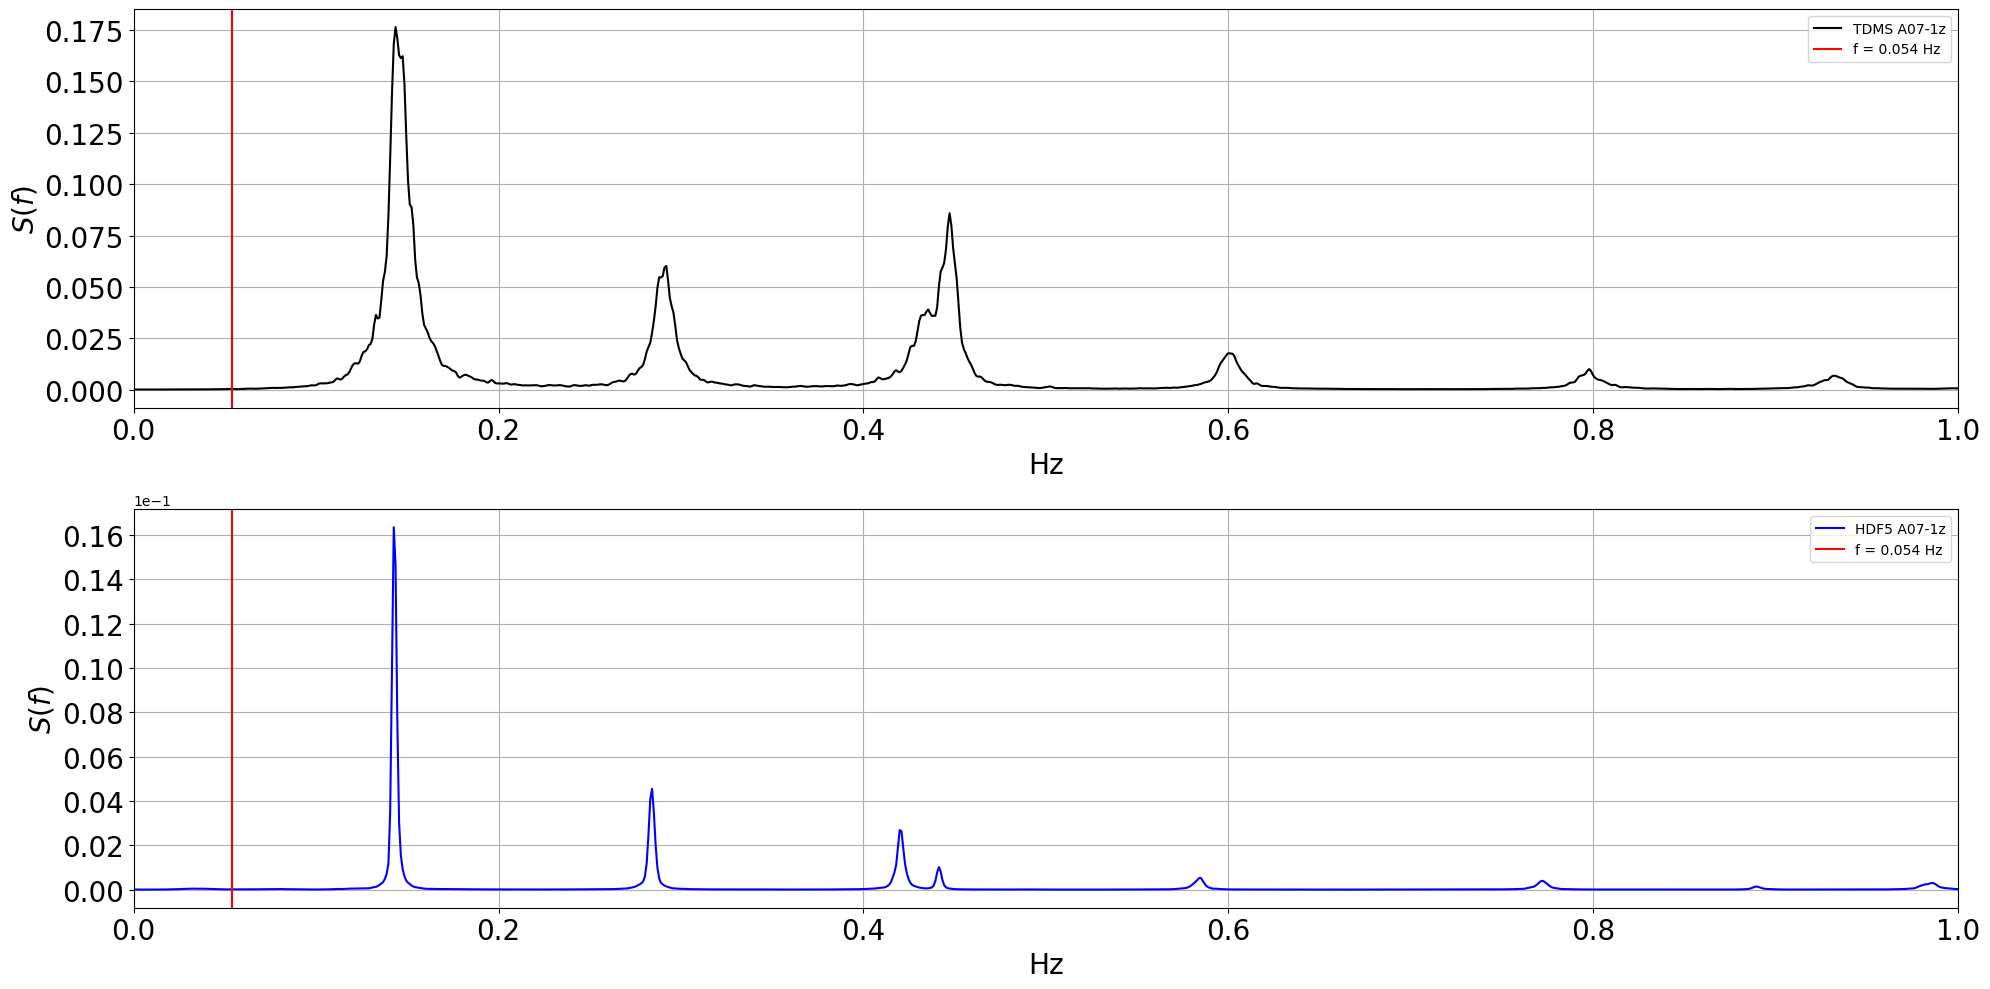

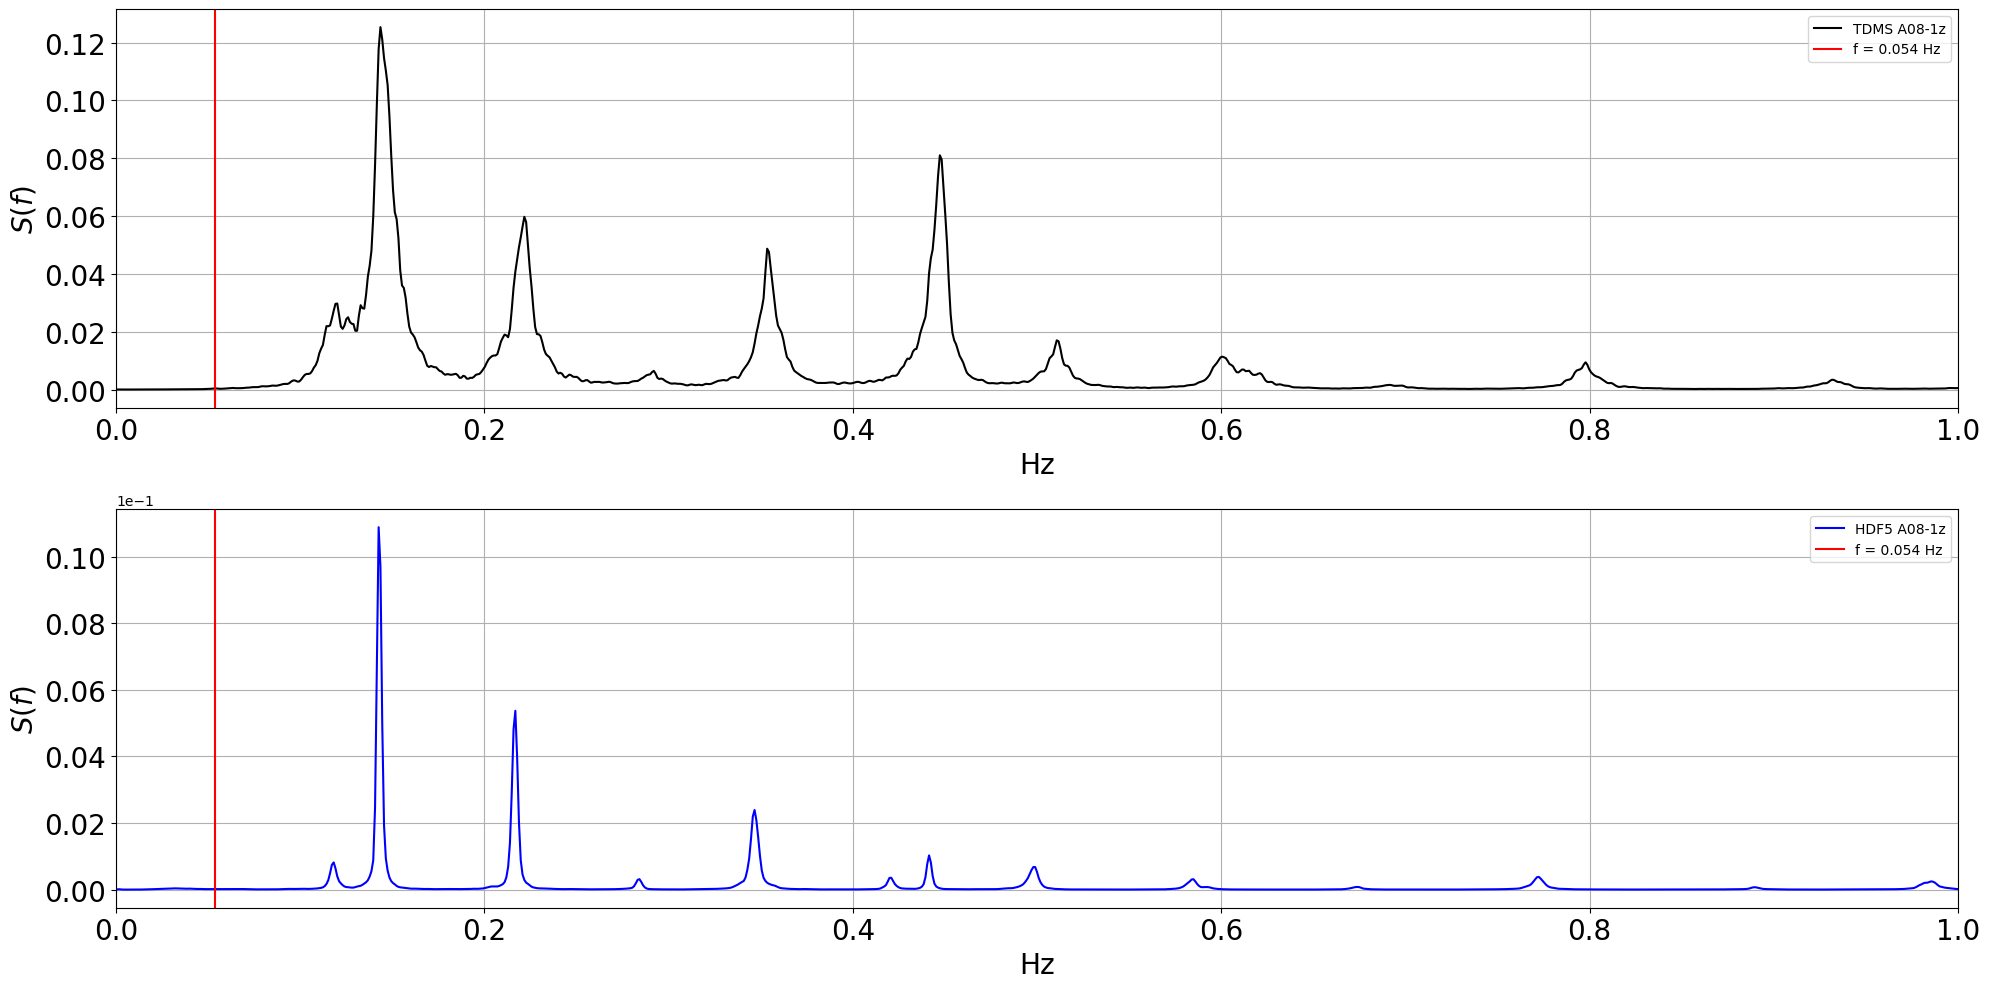

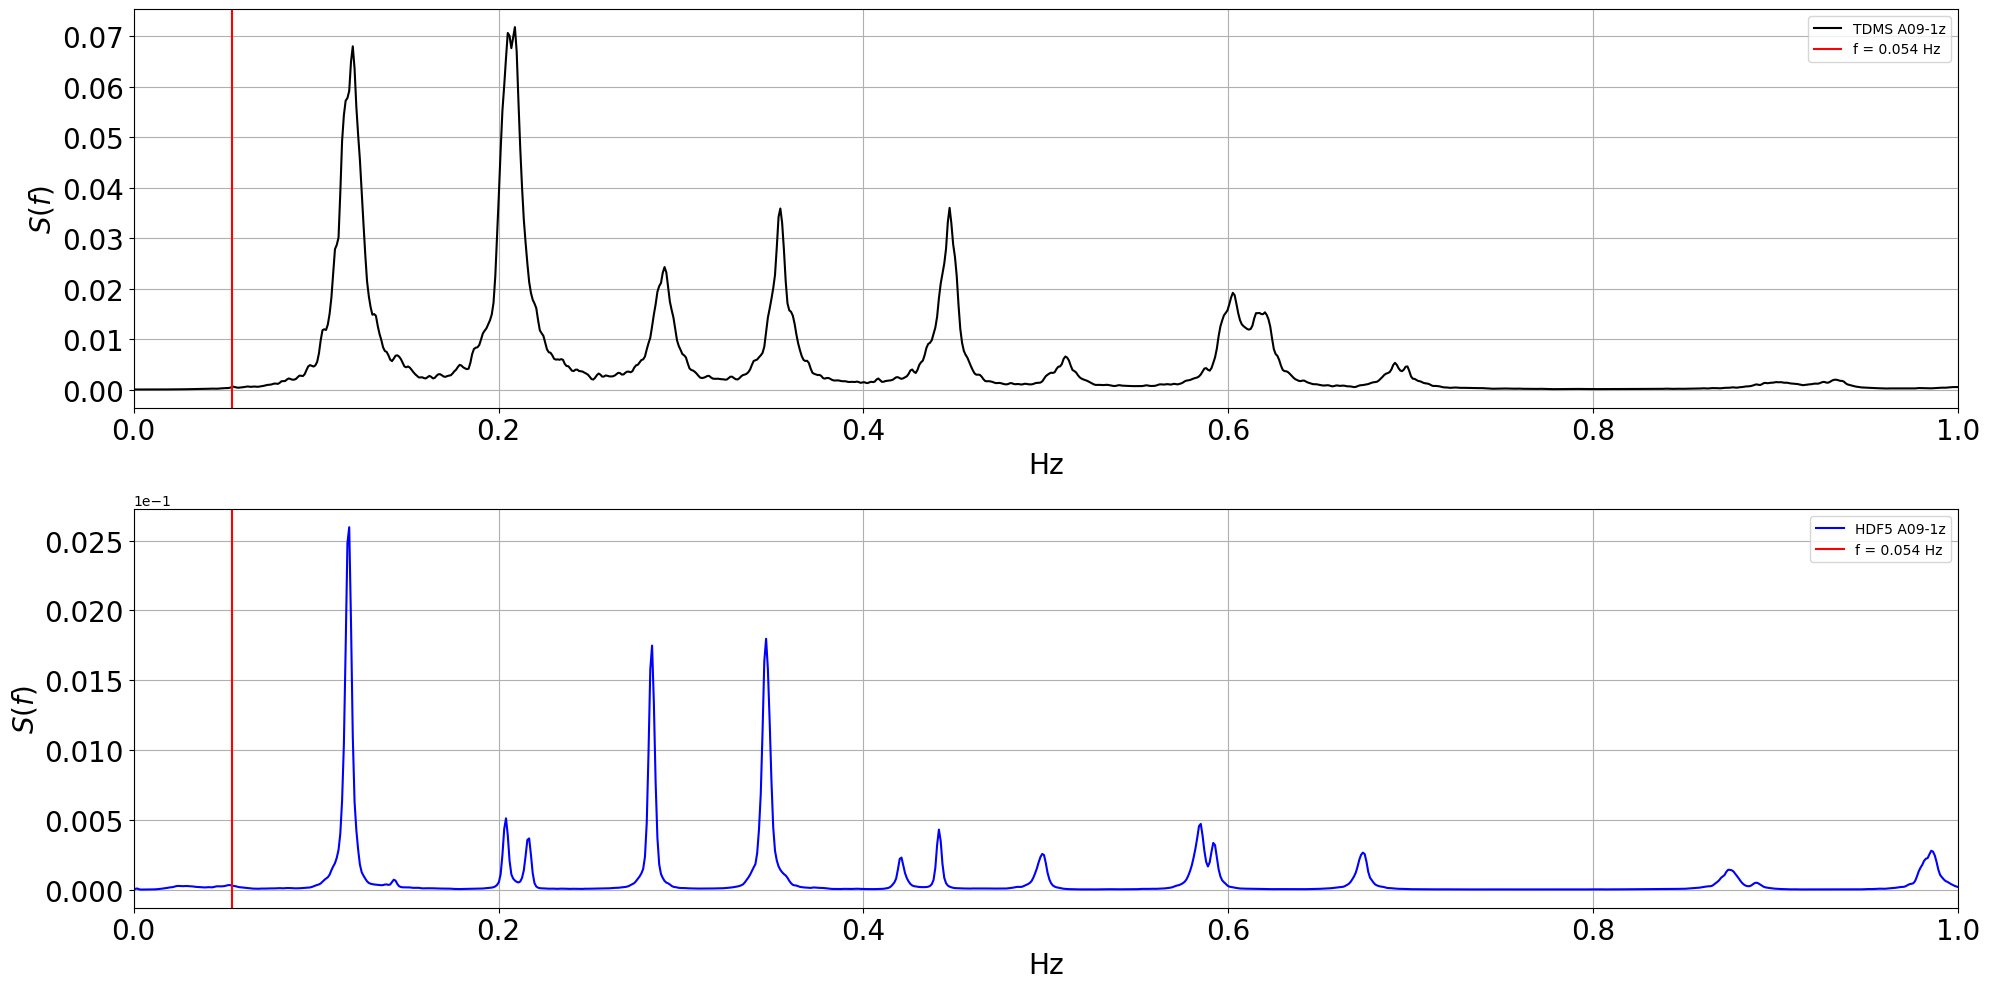

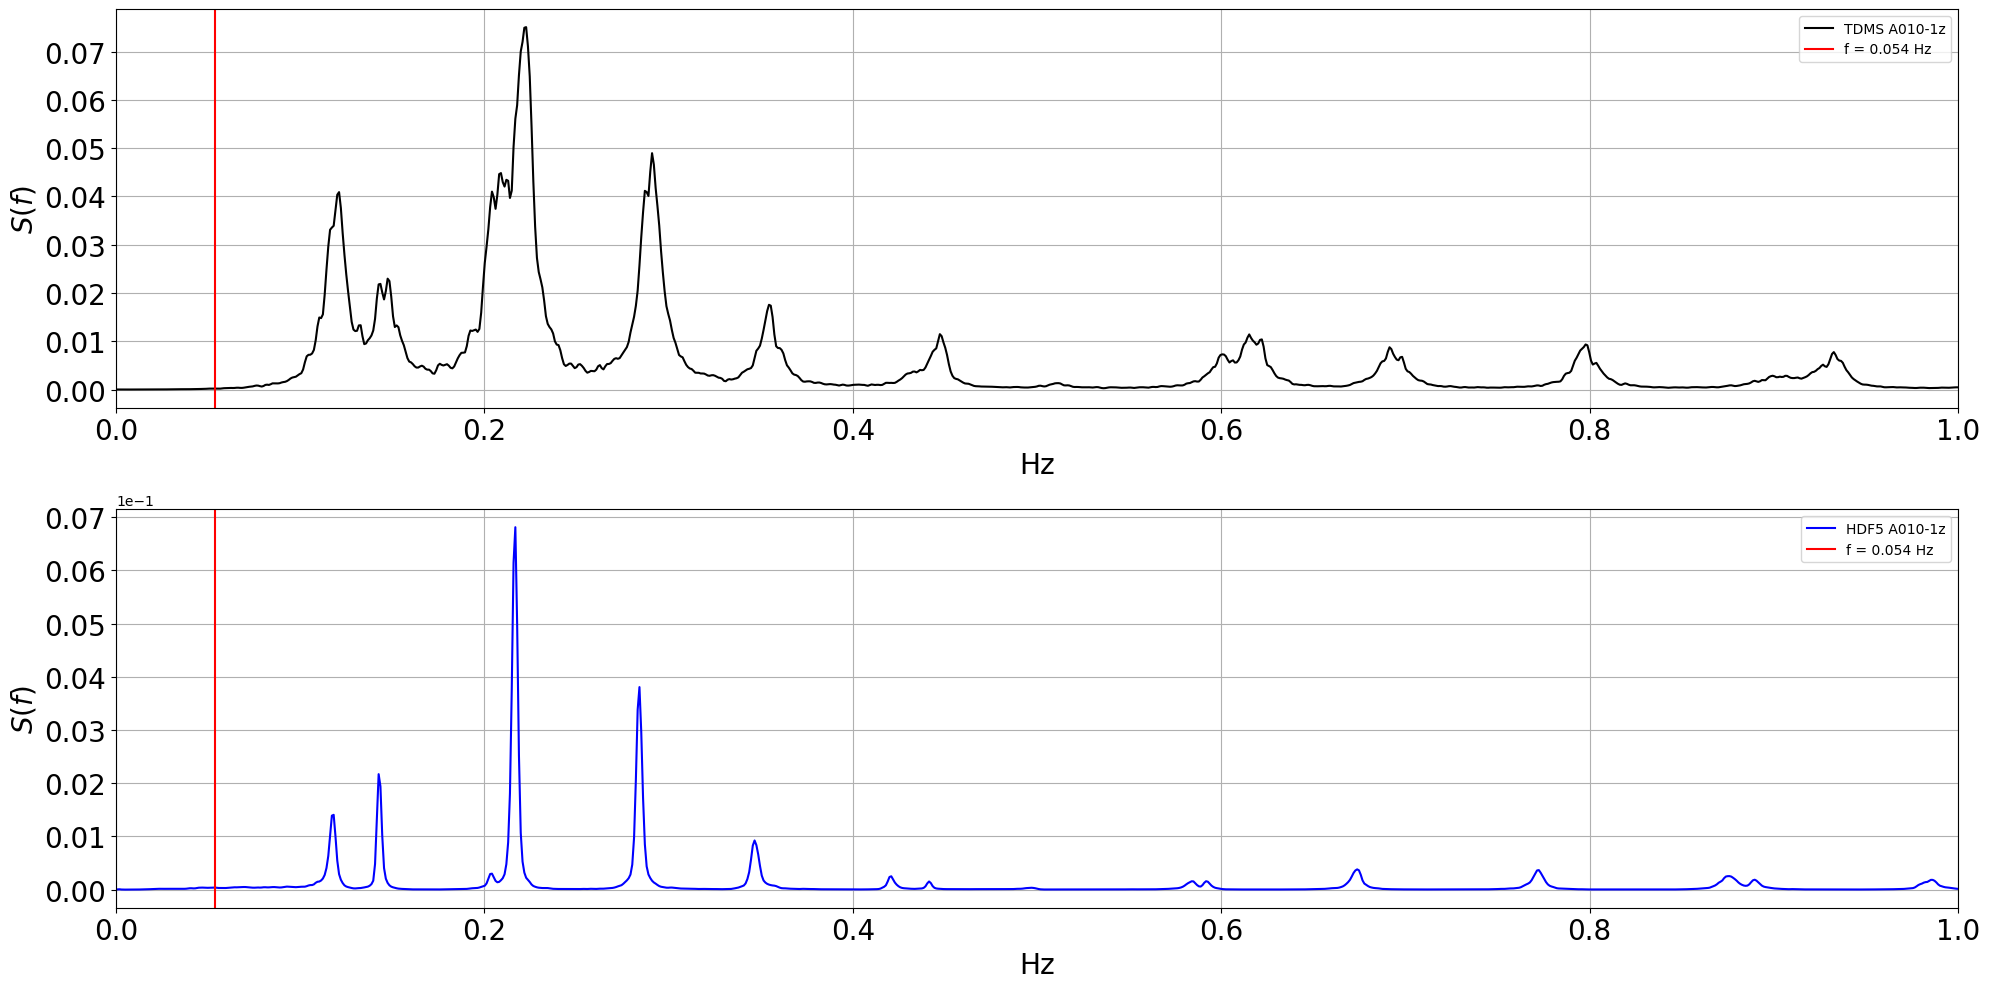

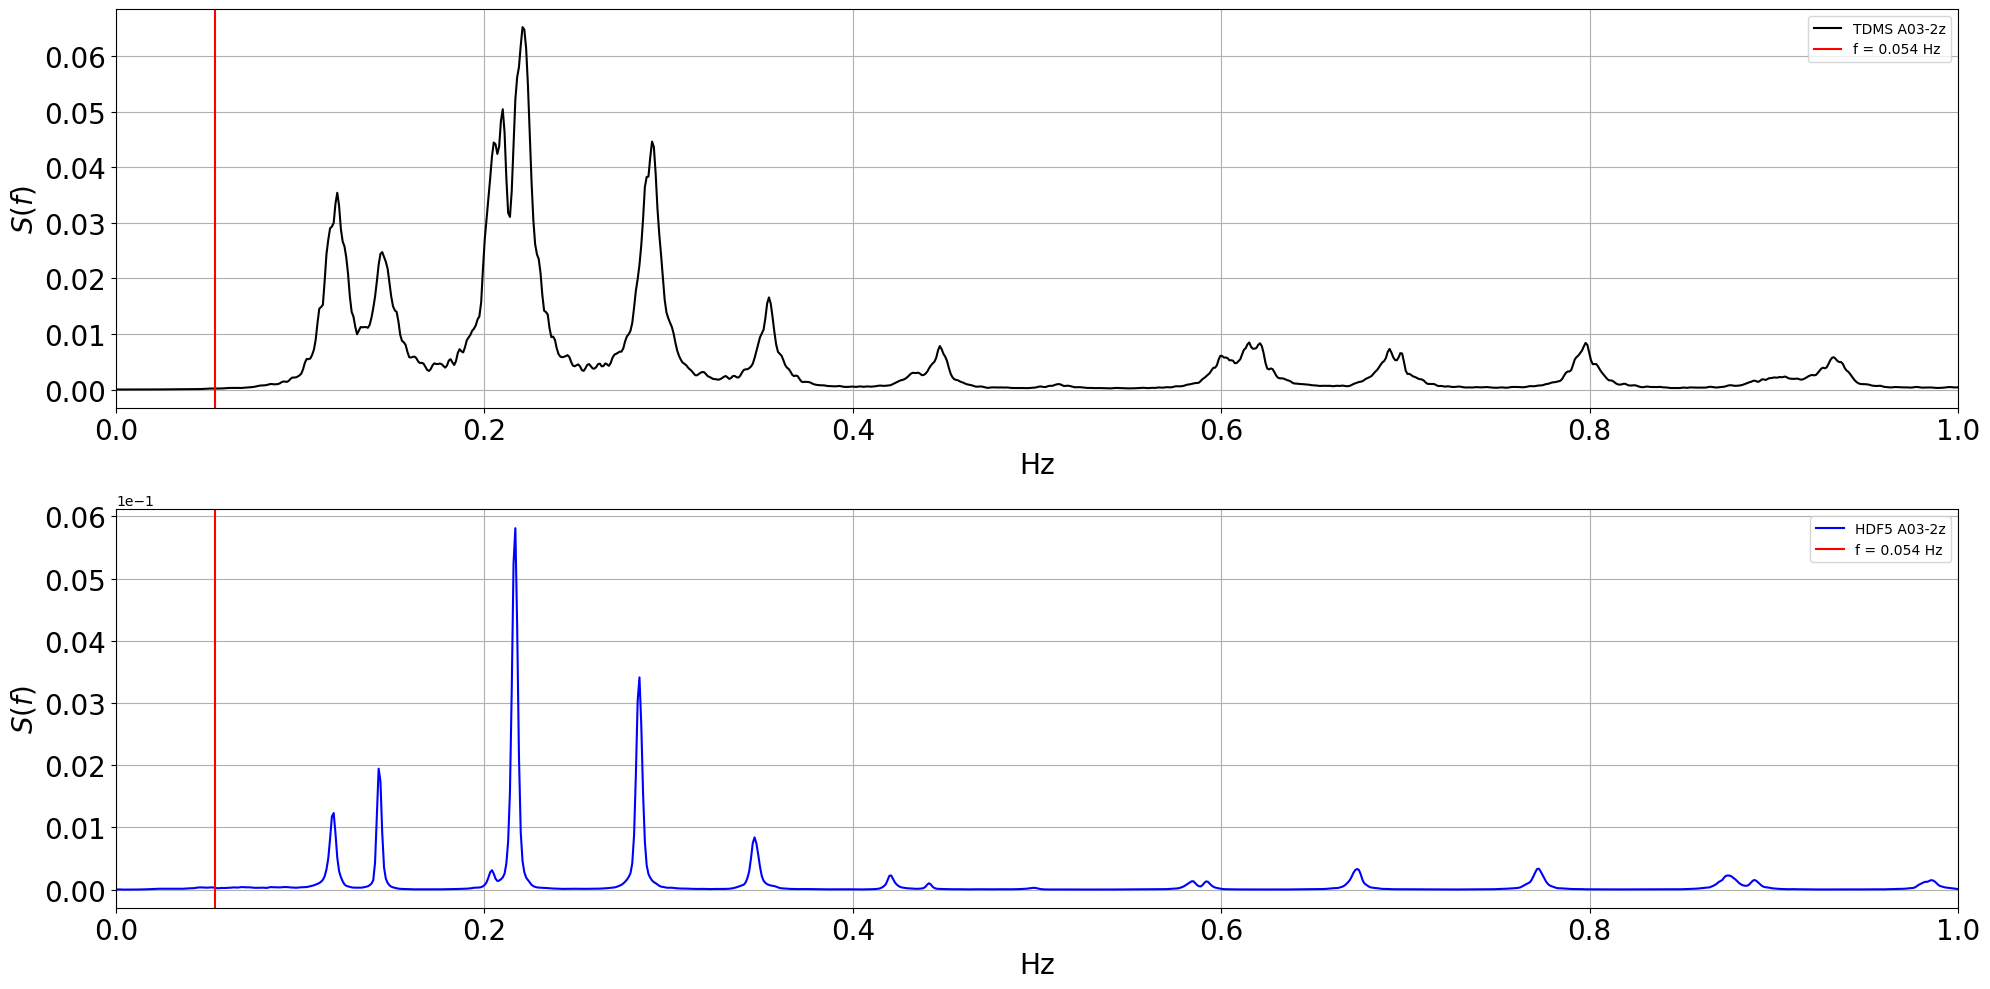

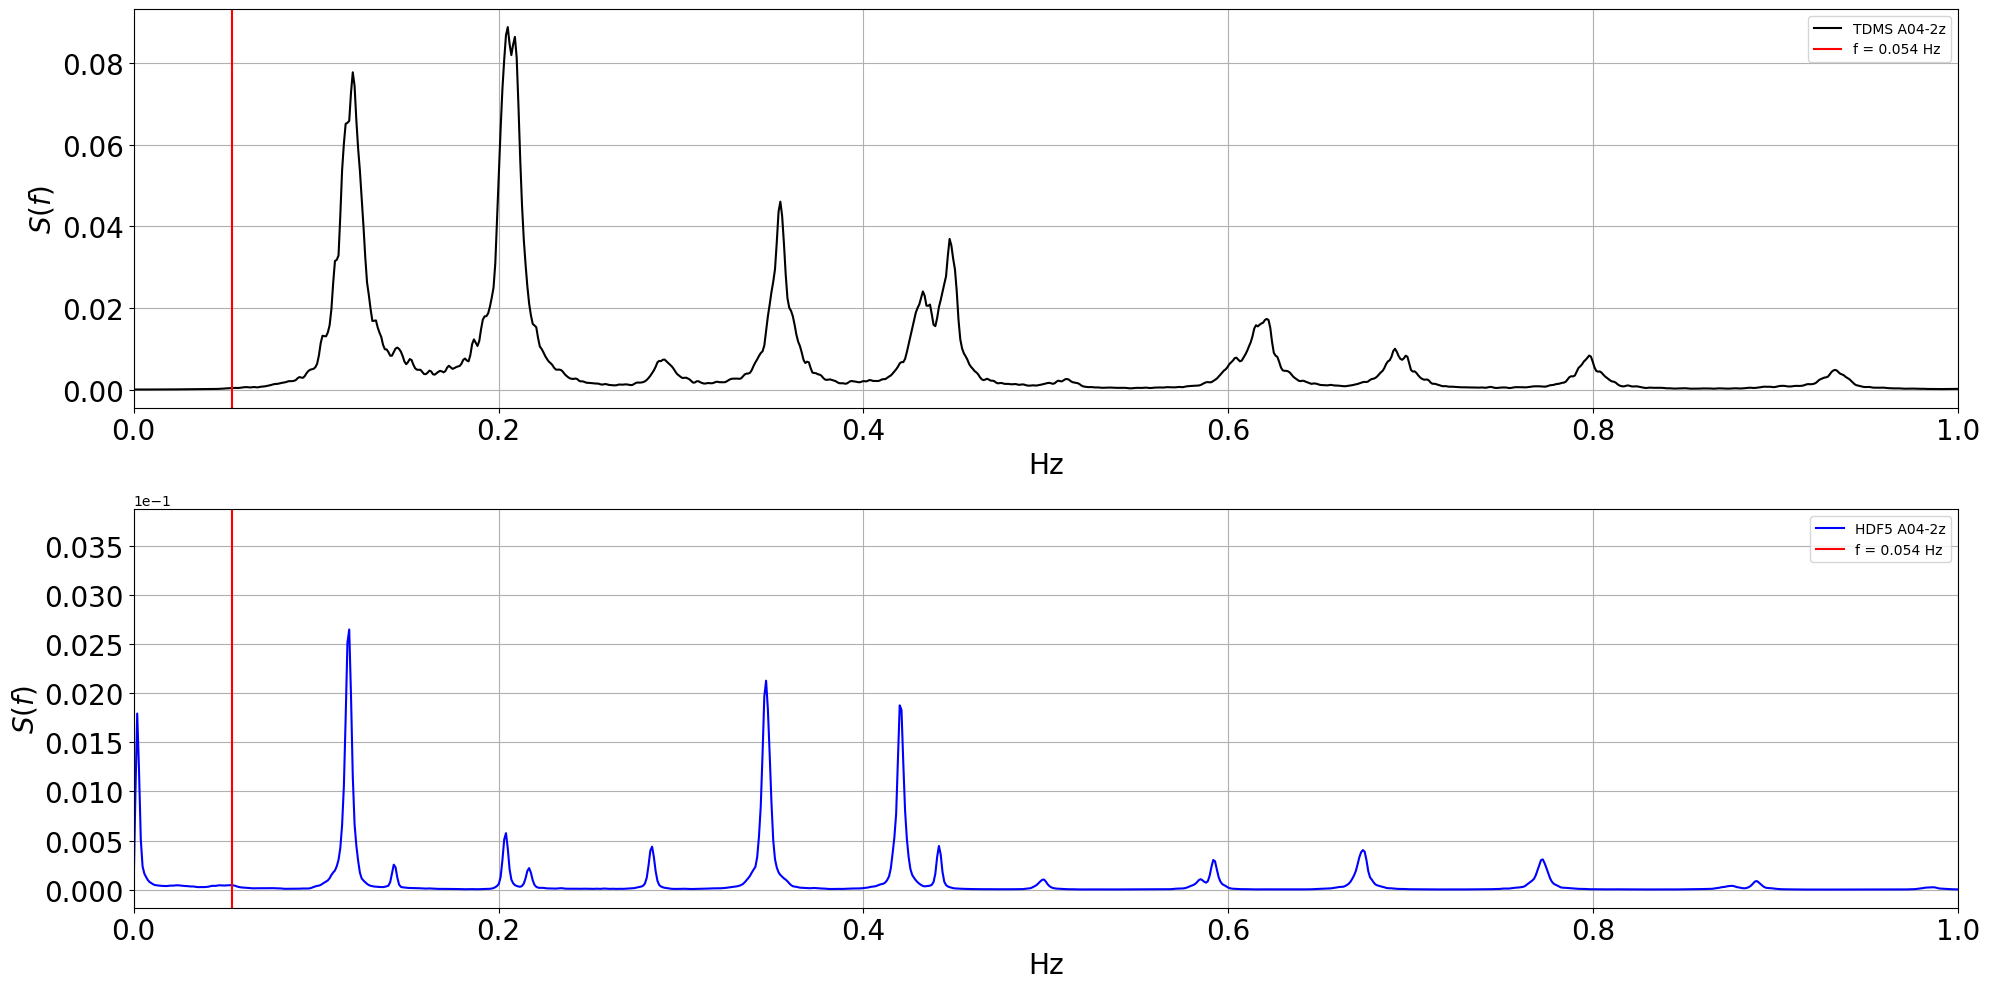

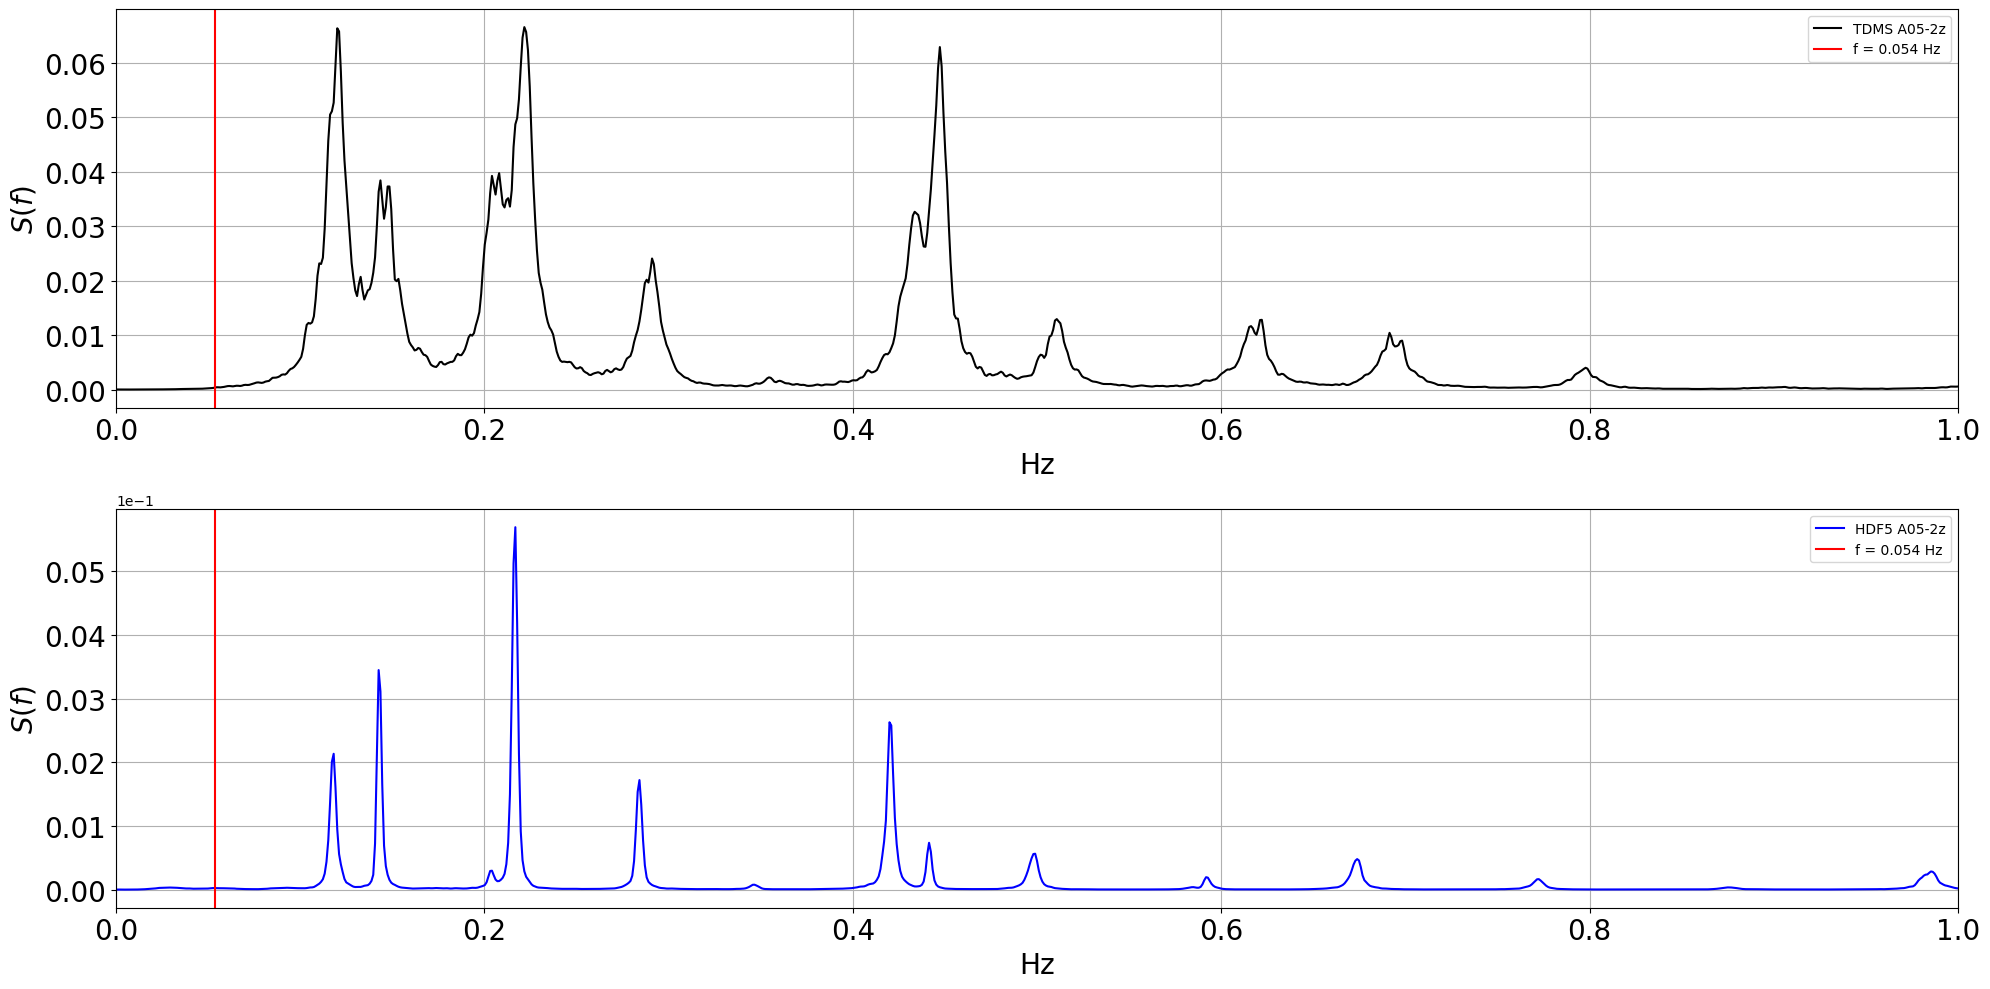

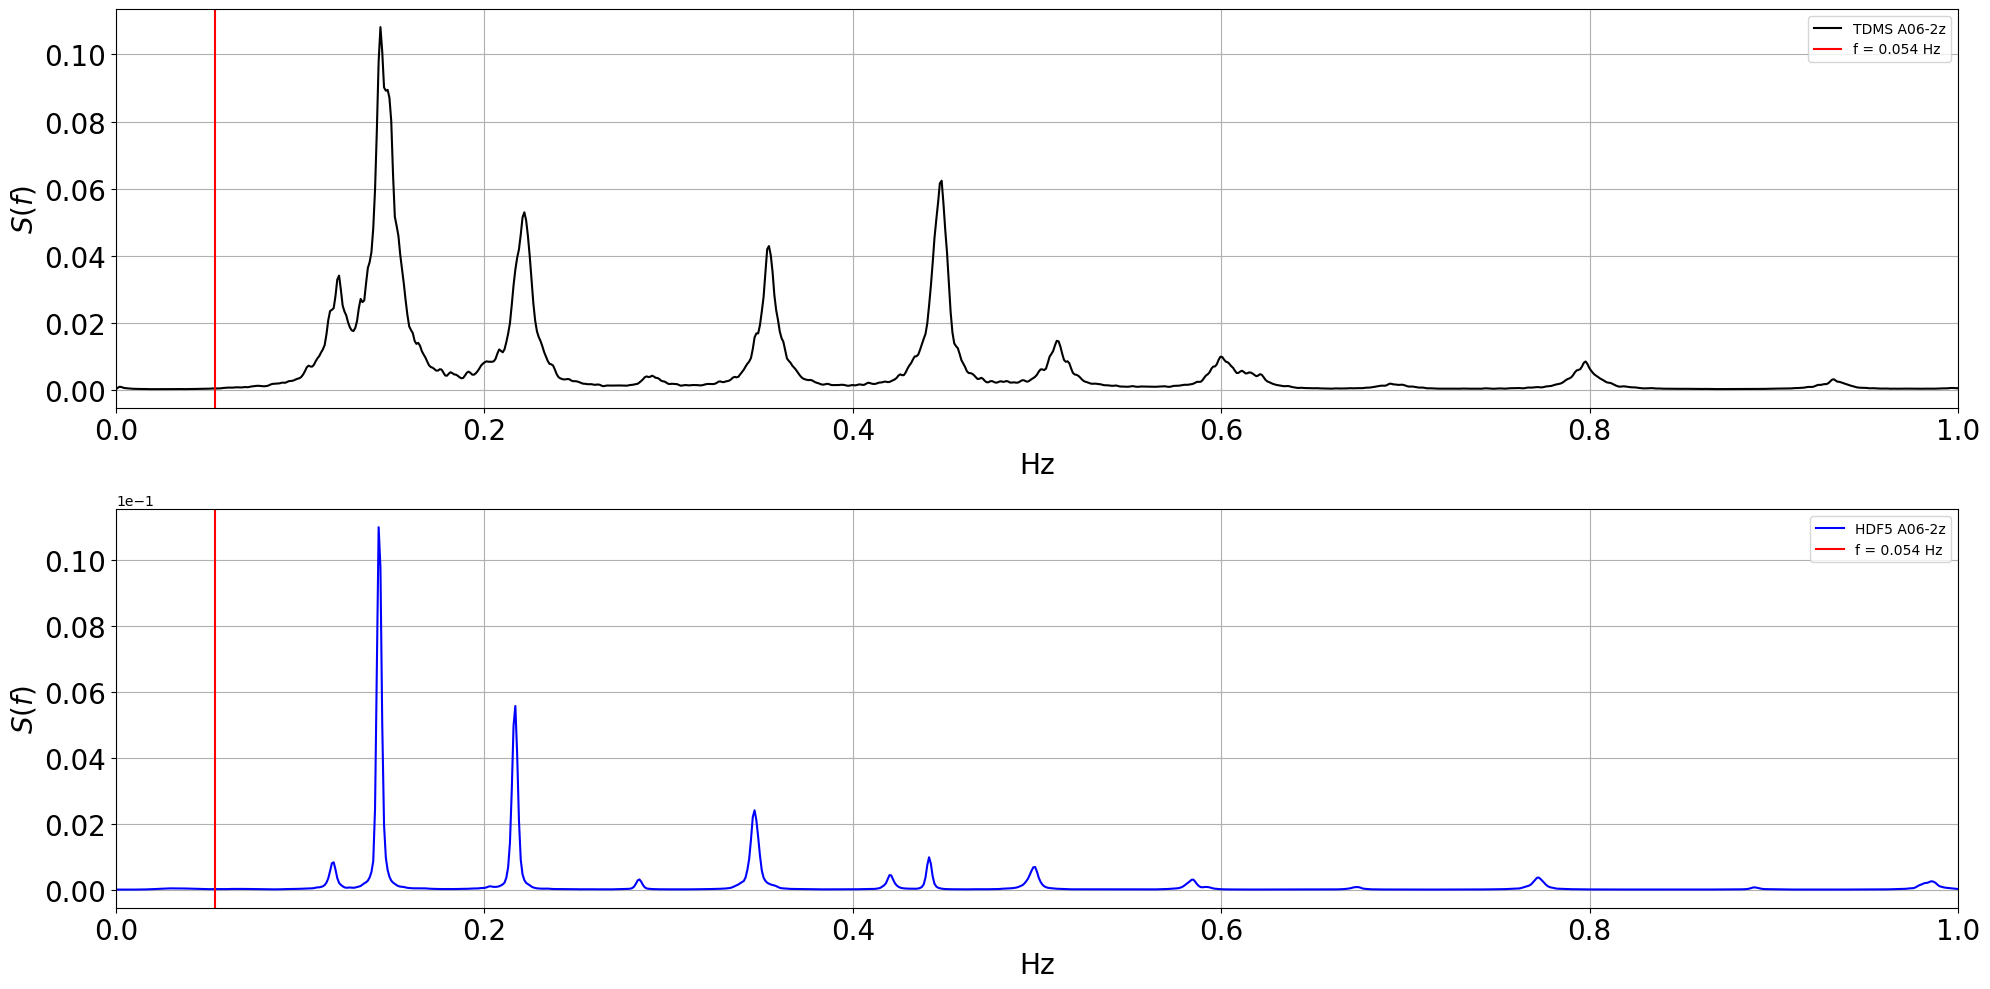

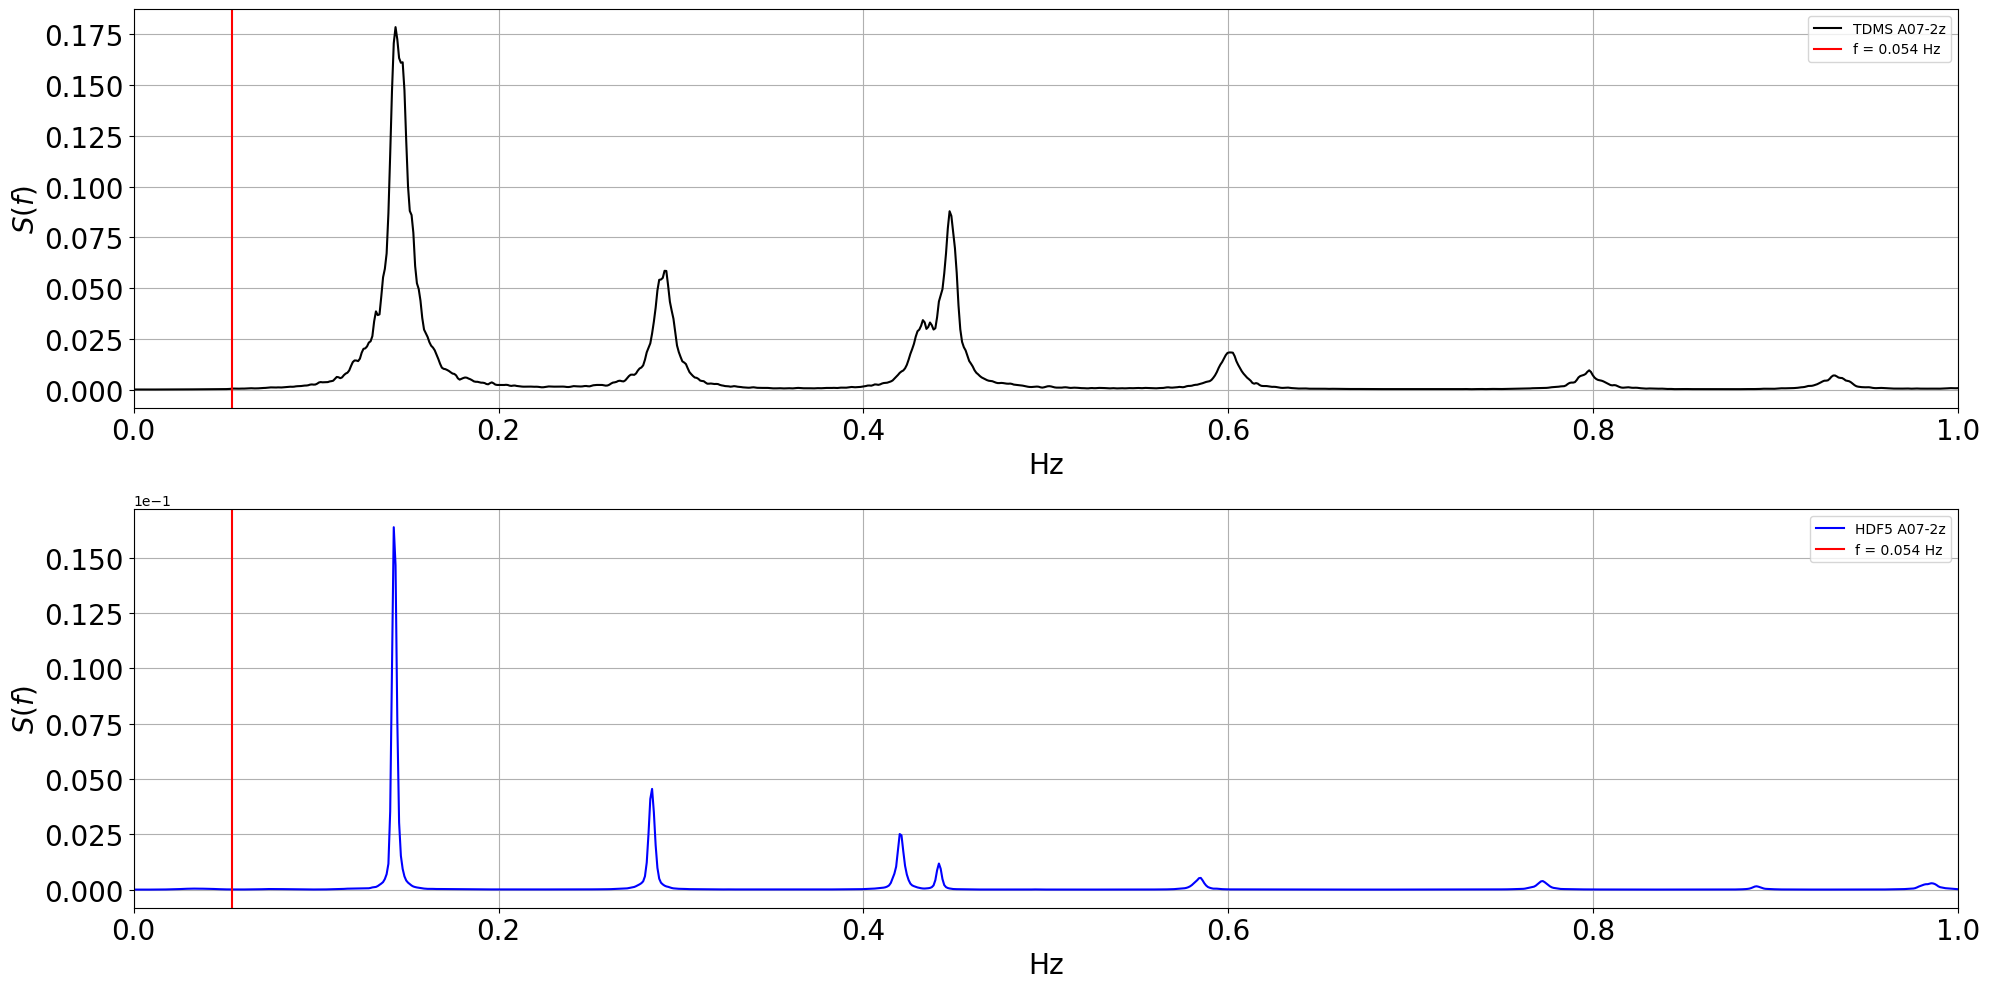

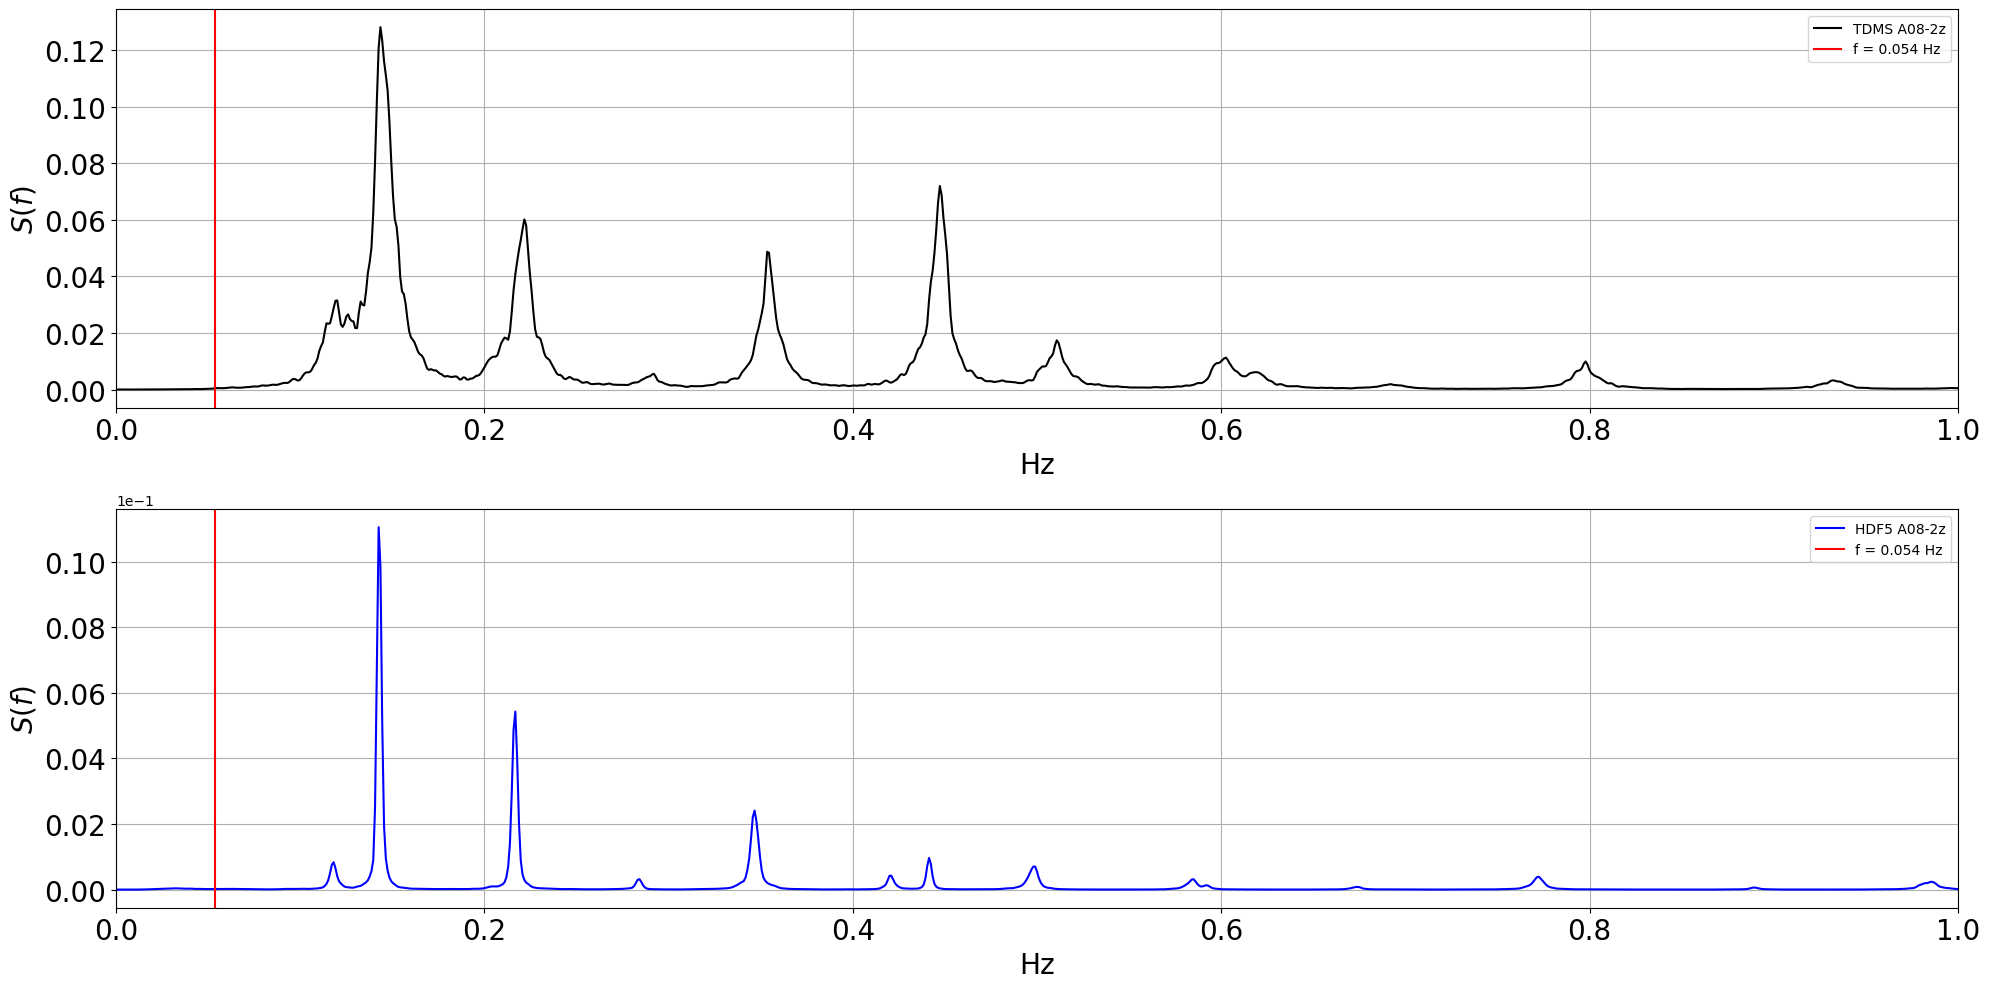

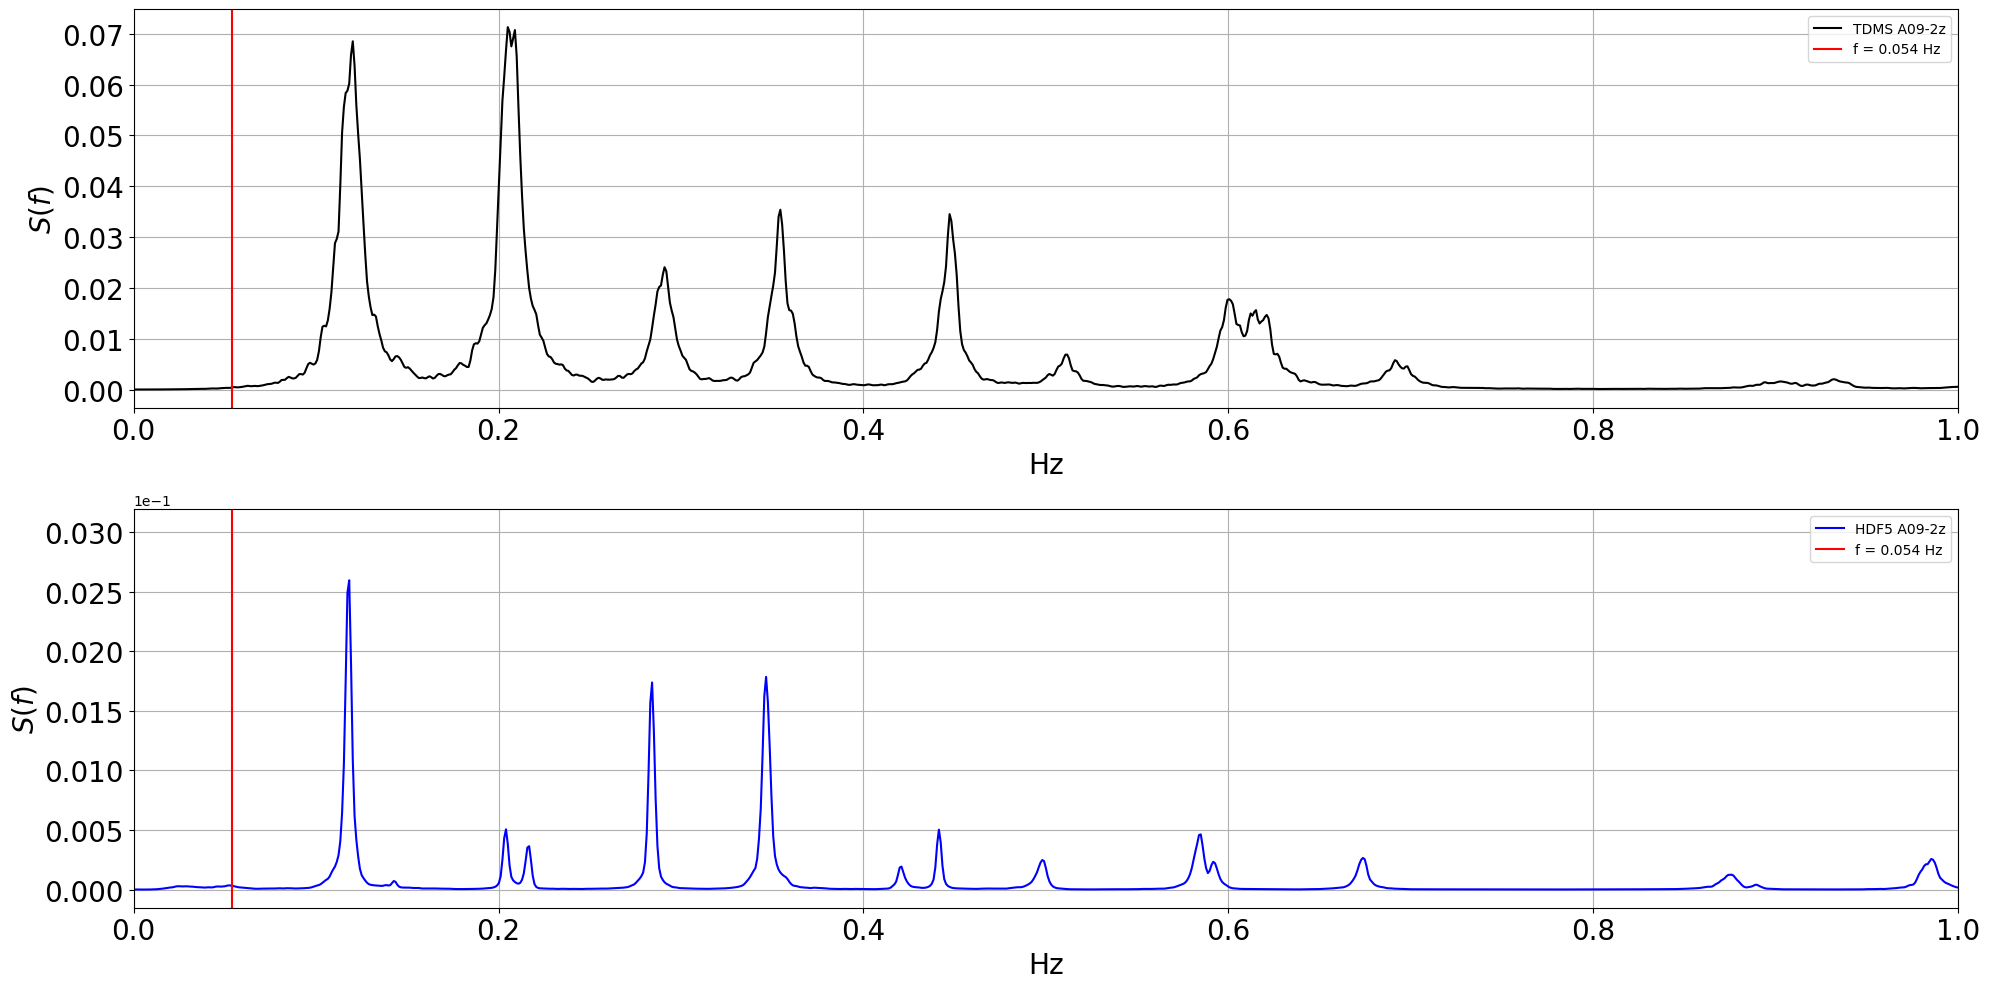

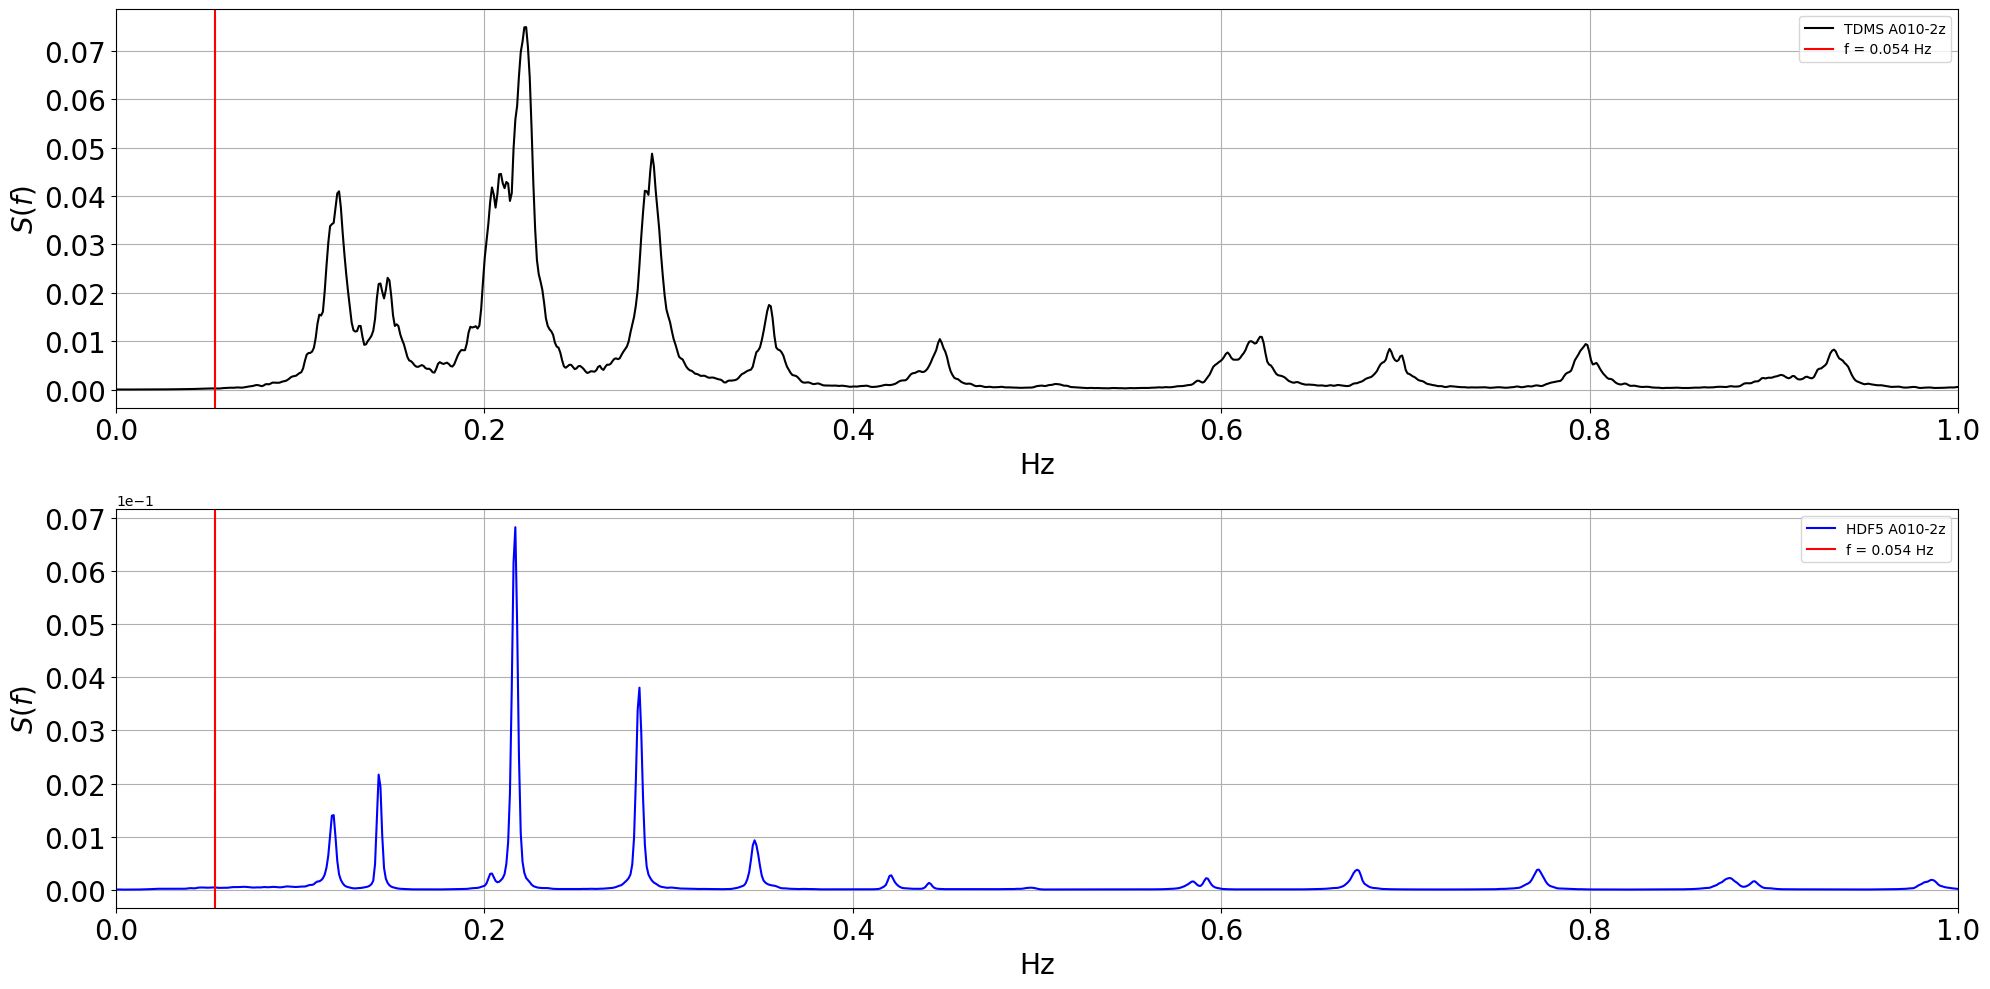

In [33]:
axis = ['x', 'y', 'z']
sensors = ['1', '2']
counter = 0

for ax in axis:
    for sensor in sensors:
        for i in range(len(loader_TDMS.anodes)):
            file = loader_TDMS.read_file(loader_TDMS.anodes[i])
            acc_tdms = loader_TDMS.load_acceleration(loader_TDMS.acc_names[i], file)
            print(acc_tdms.keys())
            acc_tdms = acc_tdms[sensor + ax]
            print("Length of TDMS vector = " + str(len(acc_tdms)))
            acc_hdf = acc_all[:, counter]
            print("Length of HDF vector = " + str(len(acc_hdf)))

            #create welch plot here
            f_size = 20
            fig, axs = plt.subplots(2,1, figsize=(20,10))

            Ndivisions = 50
            Nwindow = np.ceil(len(acc_tdms) / Ndivisions)  # Length of window/segment
            print(Nwindow)
            sampling_frequency = 64
            Nfft_pow2 = 2 ** (np.ceil(np.log2(Nwindow)))  # Next power of 2 for zero padding
            dt = 1 / sampling_frequency  # Time step

            # Call welch from scipy signal processing
            f, Sx_welch = signal.welch(acc_tdms, fs=1 / dt, window='hann', nperseg=Nwindow, noverlap=None, nfft=Nfft_pow2,
                                       detrend='constant', return_onesided=True, scaling='density', axis=- 1, average='mean')

            plt.sca(axs[0])
            plt.plot(f, Sx_welch, color='black', label="TDMS A0" + str(i+3) + "-"+ sensor + ax)
            plt.axvline(x = 0.054, color = 'r', label = 'f = 0.054 Hz')
            plt.xlim(0,1)
            #plt.ylim(0, max(orders))
            plt.xlabel('Hz', fontsize=f_size)
            plt.ylabel('$S(f)$', fontsize=f_size)
            plt.xticks(fontsize=f_size)
            plt.yticks(fontsize=f_size)
            plt.legend()
            plt.grid()

            Ndivisions = 50
            Nwindow = np.ceil(len(acc_hdf) / Ndivisions)  # Length of window/segment
            print(Nwindow)
            sampling_frequency = 16
            Nfft_pow2 = 2 ** (np.ceil(np.log2(Nwindow)))  # Next power of 2 for zero padding
            dt = 1 / sampling_frequency  # Time step

            # Call welch from scipy signal processing
            f, Sx_welch = signal.welch(acc_hdf, fs=1 / dt, window='hann', nperseg=Nwindow, noverlap=None, nfft=Nfft_pow2,
                                       detrend='constant', return_onesided=True, scaling='density', axis=- 1, average='mean')

            plt.sca(axs[1])
            plt.plot(f, Sx_welch, color='blue', label="HDF5 A0" + str(i+3) + "-" + sensor + ax)
            plt.axvline(x = 0.054, color = 'r', label = 'f = 0.054 Hz')
            plt.xlim(0,1)
            plt.xlabel('Hz', fontsize=f_size)
            plt.ylabel('$S(f)$', fontsize=f_size)
            plt.xticks(fontsize=f_size)
            plt.yticks(fontsize=f_size)
            plt.ticklabel_format(axis="y", style='sci', scilimits=(-1,-1))
            plt.legend()
            plt.grid()

            plt.tight_layout()
            plt.savefig("spectrum/welch_A0_"  + sensor + ax + "-" + str(i+3) + ".jpg")
            #plt.show()
            counter += 1


